<a href="https://colab.research.google.com/github/zehye/DATATHON_4/blob/main/%EB%B0%95%EC%A7%80%ED%98%9C/%EB%8D%B0%EC%9D%B4%ED%84%B0%ED%86%A4_4%ED%8C%80_shinhan_%EB%B0%95%EC%A7%80%ED%98%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.ticker import FuncFormatter
import matplotlib as mpl
import seaborn as sns
import matplotlib.patches as patches

pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

In [3]:
#한글 글씨 폰트 설치
%%capture
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fm.fontManager.addfont('/usr/share/fonts/truetype/nanum/NanumGothic.ttf')
plt.rcParams['font.family'] = 'NanumGothic'

mpl.rcParams['figure.autolayout'] = False

---

In [4]:
df = pd.read_csv("/content/shinhan_data_final.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86278 entries, 0 to 86277
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   가맹점구분번호              86278 non-null  object 
 1   가맹점주소                86278 non-null  object 
 2   가맹점명                 86278 non-null  object 
 3   브랜드구분코드              11725 non-null  object 
 4   가맹점_지역               86278 non-null  object 
 5   업종                   86278 non-null  object 
 6   상권                   86278 non-null  object 
 7   개설일                  86278 non-null  object 
 8   폐업일                  2334 non-null   object 
 9   위도                   86278 non-null  float64
 10  경도                   86278 non-null  float64
 11  기준년월                 86278 non-null  int64  
 12  운영개월수_구간             86278 non-null  int64  
 13  월매출_구간               86278 non-null  int64  
 14  월매출건수_구간             86278 non-null  int64  
 15  월고객수_구간              86278 non-null 

In [7]:
# 중분류 카테고리 매핑 딕셔너리
category_map = {
    # 한식 음식점업
    '한식-육류/고기': '한식 음식점업', '한식-찌개/전골': '한식 음식점업', '한식-국밥/설렁탕': '한식 음식점업',
    '한식-해물/생선': '한식 음식점업', '한식-국수/만두': '한식 음식점업', '한식-단품요리일반': '한식 음식점업',
    '백반/가정식': '한식 음식점업', '한식-감자탕': '한식 음식점업', '한식-냉면': '한식 음식점업', '한식-죽': '한식 음식점업',
    '한식-두부요리': '한식 음식점업', '기사식당': '한식 음식점업', '한정식': '한식 음식점업',

    #구내식당 및 뷔페
    '한식뷔페': '구내식당 및 뷔페', '구내식당/푸드코트': '구내식당 및 뷔페',

    # 중식/일식/양식/세계음식
    '중식당': '중식 음식점업', '중식-훠궈/마라탕': '중식 음식점업', '중식-딤섬/중식만두': '중식 음식점업',
    '일식당': '일식 음식점업', '일식-덮밥/돈가스': '일식 음식점업', '일식-초밥/롤': '일식 음식점업',
    '일식-우동/소바/라면': '일식 음식점업', '일식-참치회': '일식 음식점업','꼬치구이': '일식 음식점업',
    '일식-샤브샤브': '일식 음식점업', '양식': '서양식 음식점업', '스테이크': '서양식 음식점업',
    '동남아/인도음식': '동남아시아 음식점업', '기타세계요리': '기타 외국식 음식점업',

    # 기타 간이 음식점업
    '햄버거': '기타 간이 음식점업', '피자': '기타 간이 음식점업', '치킨': '기타 간이 음식점업',
    '샌드위치/토스트': '기타 간이 음식점업', '도시락': '기타 간이 음식점업',
    '포장마차': '기타 간이 음식점업', '분식': '기타 간이 음식점업',
    '떡/한과': '기타 간이 음식점업', '떡/한과 제조': '기타 간이 음식점업','아이스크림/빙수': '기타 간이 음식점업',
    '와플/크로플': '기타 간이 음식점업', '마카롱': '기타 간이 음식점업', '베이커리': '기타 간이 음식점업',
    '도너츠': '기타 간이 음식점업', '탕후루' : '기타 간이 음식점업',

    # 식료품 소매업
    '반찬': '식료품 소매업', '축산물': '식료품 소매업', '식품 제조': '식료품 소매업', '식료품': '식료품 소매업',
    '미곡상': '식료품 소매업', '농산물': '식료품 소매업', '청과물': '식료품 소매업', '수산물': '식료품 소매업',
    '인삼제품': '식료품 소매업', '건어물': '식료품 소매업', '건강식품': '식료품 소매업',
    '유제품': '식료품 소매업', '건강원': '식료품 소매업',

    # 카페/디저트
    '커피전문점': '비알코올 음료점업', '카페': '비알코올 음료점업', '테마카페': '비알코올 음료점업',
    '테이크아웃커피': '비알코올 음료점업', '주스': '비알코올 음료점업', '차': '비알코올 음료점업',

    # 주점/유흥
    '호프/맥주': '주점업', '룸살롱/단란주점': '주점업', '일반 유흥주점': '주점업',
    '민속주점': '주점업', '요리주점': '주점업', '이자카야': '주점업',
    '와인바': '주점업',

    # 논의 필요 (음료 소매업 또는 주점업)
   '와인샵': '음료 소매업', '주류': '음료 소매업',

    # 기타 소매업
   '담배': '담배 소매업'

}

df["업종중분류"] = df["업종"].map(category_map).fillna("기타")
print(df["업종중분류"].value_counts())

업종중분류
한식 음식점업        30178
기타 간이 음식점업     14004
식료품 소매업        13273
비알코올 음료점업      10939
주점업             6111
일식 음식점업         4235
서양식 음식점업        3385
중식 음식점업         2255
동남아시아 음식점업       663
음료 소매업           423
구내식당 및 뷔페        375
담배 소매업           234
기타 외국식 음식점업      203
Name: count, dtype: int64


In [8]:
# 배달 여부 구분
df['배달여부'] = df['배달매출비율'].apply(
    lambda x: '비배달매장' if x == -999999.9 else '배달매장'
)

In [ ]:
df

## 배달매출금액 비율이 높고 객단가가 낮은 가맹점은 특히 취소율에 민감하다

### 취소율 컬럼이 배달취소가 아닌 전체 카드 취소 컬럼이기에, 가설 변경 필요

- 운영형태와 매출성과 관점: 배달매출비율이 높을수록 12개월 업종대비 평균매출비율이 높다
- 폐업률: 배달 매출 비율이 높은 가맹점은 동일업종 대비 폐업비중이 낮을 것이다
- 상권유형에 따른 배달매출비율 차이: 주거지역 중심 상권일수록 배달매출 비율이 높다.
- 고객특성: 3~40대 여성비중이 높은 가맹점은 배달매출 비율이 높다
- 신규/재방문: 배달매출비율이 높은 가맹점은 재방문 비중이 낮고, 신규고객 비중이 높을 것이다
- 객단가: 배달매출비율이 높은 가맹점은 객단가가 낮을것이다
- 배달매출비율이 높은 가맹점은 월매출건수 대비 매출 효율이 다를것이다
- 운영기간: 오래된 가맹점일수록 배달매출 비율이 낮다

In [10]:
df['배달매출비율'].value_counts()

,count
배달매출비율,
-999999.9,57096
0.0,3760
100.0,418
1.1,156
1.6,143
...,...
61.7,3
63.1,3
99.9,2


### 배달을 하고 있지 않은 가게가 너무 많음

따라서 배달을 하고 있지 않은 애들에 관련된 가설도 확인해봐야할 필요 있음

- 배달로 전환된 비율이 있는지 확인 -> 24개월동안 안한애들도 있겠지만, 배달을 시작한 애들 -> 전환한 변화된 수치가 있는지?
- 배달이 많은 업종과 그렇지 않은 업종 별 차이
- 배달을 안하는 애들의 이유 -> 성동구에서 하지 않은 이유? 상권&업종 / 이외의 특성을 찾아보기

### 1. 배달로 전환된 비율이 있는지 확인 -> 24개월동안 안한애들도 있겠지만, 배달을 시작한 애들 -> 전환 후 변화된 수치가 있는지?



In [11]:
import numpy as np
import pandas as pd

# 배달매출비율 > -999999.9인 애들 nan으로 처리한 컬럼 추가
df['배달매출비율_clean'] = df['배달매출비율'].replace(-999999.9, np.nan)

# 기준년월 정렬
df_sorted = df.sort_values(['가맹점구분번호', '기준년월_dt'])

# 가맹점별 배달 패턴 분류 함수
def classify_delivery_pattern(x):
    vals = x['배달매출비율_clean'].values

    # 배달 한 적 없음
    if np.isnan(vals).all():
        return "never_delivered"
    # 데이터 상에서 처음부터 계속 배달한 애들
    elif not np.isnan(vals).any():
        return "always_delivered"
    else:  # Nan과 숫자가 섞인 애들

        # vals 위치가 nan인지에 따라 true/false 값 반환 -> nan이면 false, 아니면 true
        # argmax: true가 처음 나오는 인덱스 반환 = nan 아닌 애 반환
        # 즉, 처음으로 배달을 시작한 값이 등장한 위치(인덱스) 반환한다는 의미!
        first_valid = np.argmax(~np.isnan(vals))

        # first_valid=0이면 처음부터 배달한 애들임 그니까 >0 인 애들로 구분 & 당연히 true값이어야함(not np.isnan으로 확인)
        if first_valid > 0 and not np.isnan(vals[first_valid]):
            return "started_delivery"
        else:
            # 여기서 else는 배달했다가 중간에 안했다가 다시 배달한 애들이 있는지 확인 가능
            return "mixed_pattern"

# 적용
delivery_patterns = df_sorted.groupby('가맹점구분번호').apply(classify_delivery_pattern).value_counts()
print(delivery_patterns)


never_delivered     2541
always_delivered     954
started_delivery     450
mixed_pattern        227
Name: count, dtype: int64


/tmp/ipython-input-900062313.py:35: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  delivery_patterns = df_sorted.groupby('가맹점구분번호').apply(classify_delivery_pattern).value_counts()


In [12]:
# 전체 행 기준 (월별 관측치)
print("배달 데이터가 있는 행 개수:", df['배달매출비율_clean'].count())

# 고유 가맹점 수
print("고유 가맹점 수:", df['가맹점구분번호'].nunique())

# 배달패턴 분포 확인
delivery_patterns = df.groupby('가맹점구분번호').apply(classify_delivery_pattern).value_counts()
print("\n가맹점 배달 패턴 분포:\n", delivery_patterns)
print("\n배달패턴 분포 합계:", delivery_patterns.sum())

배달 데이터가 있는 행 개수: 29182
고유 가맹점 수: 4172

가맹점 배달 패턴 분포:
 never_delivered     2541
always_delivered     954
started_delivery     450
mixed_pattern        227
Name: count, dtype: int64

배달패턴 분포 합계: 4172


/tmp/ipython-input-659932312.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  delivery_patterns = df.groupby('가맹점구분번호').apply(classify_delivery_pattern).value_counts()


- never_delivered(배달 안하는애):     2541
- always_delivered(배달 하던애):     954
- started_delivery(기간 중 배달 시작한애):     450
- mixed_pattern(배달 하다가 안하다가 반복하는애):        227

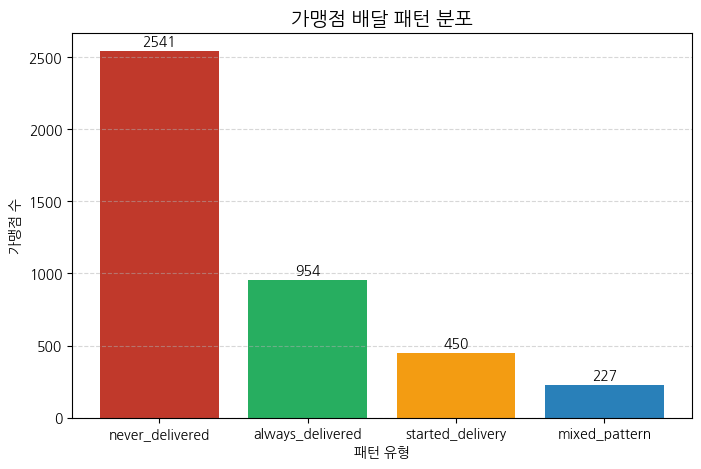

In [13]:
pattern_counts = delivery_patterns.to_dict()

plt.figure(figsize=(8,5))
bars = plt.bar(pattern_counts.keys(),
               pattern_counts.values(),
               color=['#c0392b','#27ae60','#f39c12','#2980b9'])

plt.title("가맹점 배달 패턴 분포", fontsize=14)
plt.xlabel("패턴 유형")
plt.ylabel("가맹점 수")
plt.grid(axis='y', linestyle='--', alpha=0.5)

# 각 막대 위에 수치 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2,
             yval + 20,
             f'{int(yval)}',
             ha='center', va='bottom', fontsize=10)

plt.show()

### started_delivery > 배달 안했다가 시작한 애들

In [14]:
# started_delivery 가맹점 목록 추출
started_ids = df.groupby('가맹점구분번호').apply(classify_delivery_pattern)
started_ids = started_ids[started_ids == 'started_delivery'].index

# 그 중 일부 예시 출력
sample_id = started_ids[0]
df[df['가맹점구분번호'] == sample_id][['가맹점구분번호', '기준년월_dt', '배달매출비율_clean']]

/tmp/ipython-input-4188095240.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  started_ids = df.groupby('가맹점구분번호').apply(classify_delivery_pattern)


,가맹점구분번호,기준년월_dt,배달매출비율_clean
0,000F03E44A,2023-01-01,NaN
1,000F03E44A,2023-02-01,NaN
2,000F03E44A,2023-03-01,NaN
3,000F03E44A,2023-04-01,NaN
4,000F03E44A,2023-05-01,NaN
5,000F03E44A,2023-06-01,NaN
6,000F03E44A,2023-07-01,NaN
7,000F03E44A,2023-08-01,NaN
8,000F03E44A,2023-09-01,NaN
9,000F03E44A,2023-10-01,NaN


### mixed_pattern > 배달 했다가 안했다가 하는 애들

In [15]:
# mixed_pattern 가맹점 목록 추출
mixed_ids = df.groupby('가맹점구분번호').apply(classify_delivery_pattern)
mixed_ids = mixed_ids[mixed_ids == 'mixed_pattern'].index

# 그 중 일부 예시 출력
sample_id = mixed_ids[0]
df[df['가맹점구분번호'] == sample_id][['가맹점구분번호', '기준년월_dt', '배달매출비율_clean']]

/tmp/ipython-input-3292723418.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  mixed_ids = df.groupby('가맹점구분번호').apply(classify_delivery_pattern)


,가맹점구분번호,기준년월_dt,배달매출비율_clean
439,012A64A73B,2023-01-01,2.6
440,012A64A73B,2023-02-01,1.6
441,012A64A73B,2023-03-01,0.0
442,012A64A73B,2023-04-01,0.0
443,012A64A73B,2023-05-01,0.0
444,012A64A73B,2023-06-01,0.0
445,012A64A73B,2023-07-01,0.0
446,012A64A73B,2023-08-01,0.0
447,012A64A73B,2023-09-01,0.0
448,012A64A73B,2023-10-01,0.0


### 기간 중 배달 시작한 가게의 매출 변화 확인

- 매출 지표는 '12개월_업종대비_평균매출_비율' 사용하여
- 배달 도입 전 3개월 vs 도입 후 3개월/6개월의 매출 평균 비교

/tmp/ipython-input-3832510056.py:44: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(pre_post_change)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


배달 도입 전후 매출 변화 분석 (450개 가맹점)
전  평균: 67.490
후  평균: 125.962
차이 (후-전): 58.472


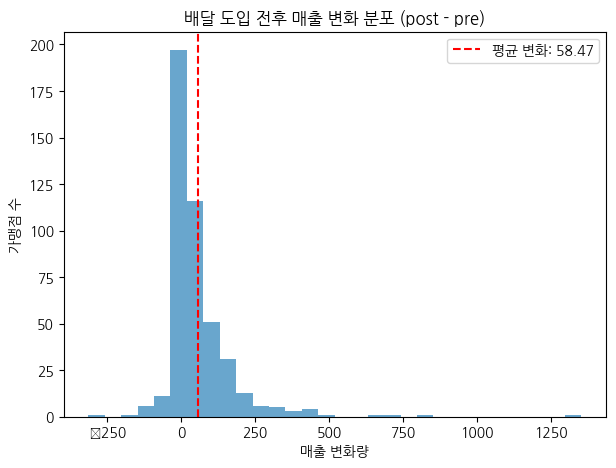

In [16]:
# 기간 내 배달을 시작한 애들만 필터링 > 가맹점구분번호 기준으로
# started_df: 배달을 도입하게 된 행만 남음
started_df = df_sorted[df_sorted['가맹점구분번호'].isin(started_ids)]

def pre_post_change(g, window=6):
    vals = g['배달매출비율_clean'].values
    metric = g['12개월_업종대비_평균매출_비율'].values
    # print('vals: ', vals)
    # print('metric: ',metric)

    # 배달을 했으면 true, 안했으면 false
    is_valid = ~np.isnan(vals)
    if not is_valid.any():
        return None

    # 배달 처음 시작한 월의 인덱스 가져오기
    first_valid_idx = np.argmax(is_valid)
    # print(first_valid_idx)

    # pre_idx => index=5&window=3 -> pre=[2,3,4]
    # post_idx => post=[5,6,7]
    pre_idx = np.arange(max(0, first_valid_idx - window), first_valid_idx)
    post_idx = np.arange(first_valid_idx, min(len(vals), first_valid_idx + window))

    # 매출배열에서 전후 인덱스 가져오고 Nan 제거
    pre_vals = metric[pre_idx][~pd.isna(metric[pre_idx])]
    post_vals = metric[post_idx][~pd.isna(metric[post_idx])]

    # 전/후 아무 데이터 없으면 None
    if len(pre_vals) == 0 or len(post_vals) == 0:
        return None

    # 전후 평균 차이 Serise로 반환 > diff
    return pd.Series({
        'pre_mean': np.mean(pre_vals),
        'post_mean': np.mean(post_vals),
        'diff': np.mean(post_vals) - np.mean(pre_vals)
    })

# 가맹점 단위로 started_df 그룹화함
# 전후 평균과 diff가 담긴 Series 반환 -> None 제거하고 실제 전후 비교 가능한 애들만 남김
started_summary = (
    started_df.groupby('가맹점구분번호')
    .apply(pre_post_change)
    .dropna()
)

print(f"배달 도입 전후 매출 변화 분석 ({len(started_summary)}개 가맹점)")
print(f"전  평균: {started_summary['pre_mean'].mean():.3f}")
print(f"후  평균: {started_summary['post_mean'].mean():.3f}")
print(f"차이 (후-전): {started_summary['diff'].mean():.3f}")

# 시각화
plt.figure(figsize=(7,5))
plt.hist(started_summary['diff'], bins=30, color="#2980b9", alpha=0.7)
plt.axvline(started_summary['diff'].mean(), color='red', linestyle='--', label=f"평균 변화: {started_summary['diff'].mean():.2f}")
plt.title("배달 도입 전후 매출 변화 분포 (post - pre)")
plt.xlabel("매출 변화량")
plt.ylabel("가맹점 수")
plt.legend()
plt.show()


/tmp/ipython-input-1854716389.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=plot_df, x='시점', y='매출', palette=['#95a5a6', '#27ae60'])


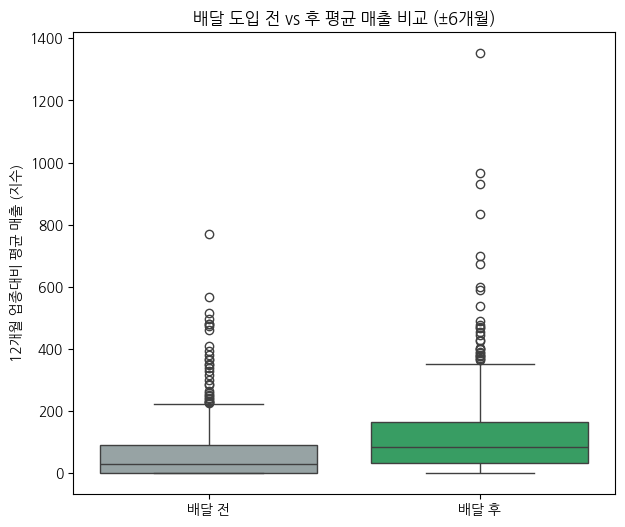

In [17]:
# 전/후 값 long 형태로 변환
plot_df = started_summary[['pre_mean', 'post_mean']].reset_index().melt(
    id_vars='가맹점구분번호',
    value_vars=['pre_mean', 'post_mean'],
    var_name='시점',
    value_name='매출'
)

# 라벨 한글화
plot_df['시점'] = plot_df['시점'].replace({'pre_mean':'배달 전', 'post_mean':'배달 후'})

# 박스플롯
plt.figure(figsize=(7,6))
sns.boxplot(data=plot_df, x='시점', y='매출', palette=['#95a5a6', '#27ae60'])

plt.title("배달 도입 전 vs 후 평균 매출 비교 (±6개월)")
plt.xlabel("")
plt.ylabel("12개월 업종대비 평균 매출 (지수)")
plt.show()

배달 도입 전후 매출 변화 분석 (450개 가맹점)
전  평균: 69.173
후  평균: 128.399
차이 (후-전): 59.226


/tmp/ipython-input-3844632608.py:44: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(pre_post_change)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


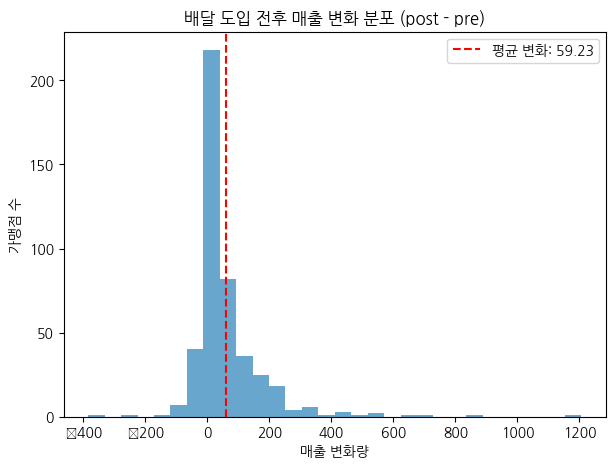

In [18]:
# 기간 내 배달을 시작한 애들만 필터링 > 가맹점구분번호 기준으로
# started_df: 배달을 도입하게 된 행만 남음
started_df = df_sorted[df_sorted['가맹점구분번호'].isin(started_ids)]

def pre_post_change(g, window=3):
    vals = g['배달매출비율_clean'].values
    metric = g['12개월_업종대비_평균매출_비율'].values
    # print('vals: ', vals)
    # print('metric: ',metric)

    # 배달을 했으면 true, 안했으면 false
    is_valid = ~np.isnan(vals)
    if not is_valid.any():
        return None

    # 배달 처음 시작한 월의 인덱스 가져오기
    first_valid_idx = np.argmax(is_valid)
    # print(first_valid_idx)

    # pre_idx => index=5&window=3 -> pre=[2,3,4]
    # post_idx => post=[5,6,7]
    pre_idx = np.arange(max(0, first_valid_idx - window), first_valid_idx)
    post_idx = np.arange(first_valid_idx, min(len(vals), first_valid_idx + window))

    # 매출배열에서 전후 인덱스 가져오고 Nan 제거
    pre_vals = metric[pre_idx][~pd.isna(metric[pre_idx])]
    post_vals = metric[post_idx][~pd.isna(metric[post_idx])]

    # 전/후 아무 데이터 없으면 None
    if len(pre_vals) == 0 or len(post_vals) == 0:
        return None

    # 전후 평균 차이 Serise로 반환 > diff
    return pd.Series({
        'pre_mean': np.mean(pre_vals),
        'post_mean': np.mean(post_vals),
        'diff': np.mean(post_vals) - np.mean(pre_vals)
    })

# 가맹점 단위로 started_df 그룹화함
# 전후 평균과 diff가 담긴 Series 반환 -> None 제거하고 실제 전후 비교 가능한 애들만 남김
started_summary = (
    started_df.groupby('가맹점구분번호')
    .apply(pre_post_change)
    .dropna()
)

print(f"배달 도입 전후 매출 변화 분석 ({len(started_summary)}개 가맹점)")
print(f"전  평균: {started_summary['pre_mean'].mean():.3f}")
print(f"후  평균: {started_summary['post_mean'].mean():.3f}")
print(f"차이 (후-전): {started_summary['diff'].mean():.3f}")

# 시각화
plt.figure(figsize=(7,5))
plt.hist(started_summary['diff'], bins=30, color="#2980b9", alpha=0.7)
plt.axvline(started_summary['diff'].mean(), color='red', linestyle='--', label=f"평균 변화: {started_summary['diff'].mean():.2f}")
plt.title("배달 도입 전후 매출 변화 분포 (post - pre)")
plt.xlabel("매출 변화량")
plt.ylabel("가맹점 수")
plt.legend()
plt.show()


/tmp/ipython-input-3345415105.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=plot_df, x='시점', y='매출', palette=['#95a5a6', '#27ae60'])


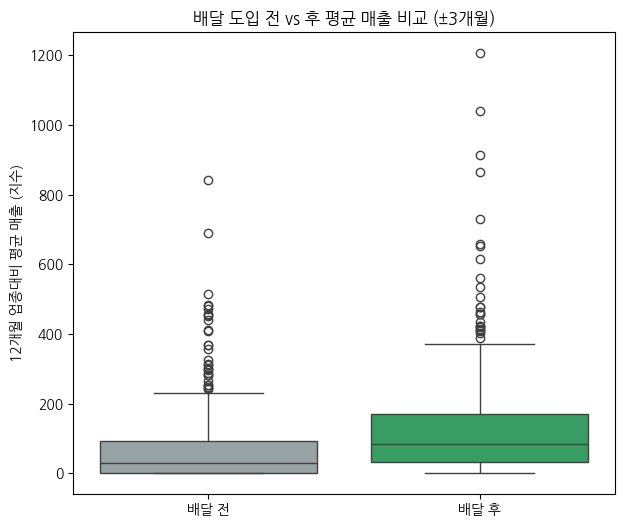

In [19]:
# 전/후 값 long 형태로 변환
plot_df = started_summary[['pre_mean', 'post_mean']].reset_index().melt(
    id_vars='가맹점구분번호',
    value_vars=['pre_mean', 'post_mean'],
    var_name='시점',
    value_name='매출'
)

# 라벨 한글화
plot_df['시점'] = plot_df['시점'].replace({'pre_mean':'배달 전', 'post_mean':'배달 후'})

# 박스플롯
plt.figure(figsize=(7,6))
sns.boxplot(data=plot_df, x='시점', y='매출', palette=['#95a5a6', '#27ae60'])

plt.title("배달 도입 전 vs 후 평균 매출 비교 (±3개월)")
plt.xlabel("")
plt.ylabel("12개월 업종대비 평균 매출 (지수)")
plt.show()

### 인사이트

1. 기간 내 배달을 시작한 가맹점 전체 기준으로 평균을 보면
2. 시작하기 전 매출 평균보다 배달 시작 후 매출 평균이 오름
3. **전 평균: 54.978 / 후  평균: 77.456 => 차이 (후-전): 22.478**

---

### 원하는 가맹점의 매출 변화 그래프 확인해보기

[가맹점 000F03E44A] 배달 도입 시점: 2024-07-01
전(3개) 평균: 7.700
후(3개) 평균: 3.167
변화량(후-전): -4.533

[도입 시점 전후 관측치]
   가맹점구분번호   기준년월  배달매출비율_clean  12개월_업종대비_평균매출_비율
000F03E44A 202402           NaN                0.1
000F03E44A 202403           NaN                2.3
000F03E44A 202404           NaN                2.6
000F03E44A 202405           NaN                6.3
000F03E44A 202406           NaN               14.2
000F03E44A 202407          77.5                0.7
000F03E44A 202408         100.0                0.0
000F03E44A 202409          15.5                8.8
000F03E44A 202410          58.0                2.2
000F03E44A 202411          86.7                0.3


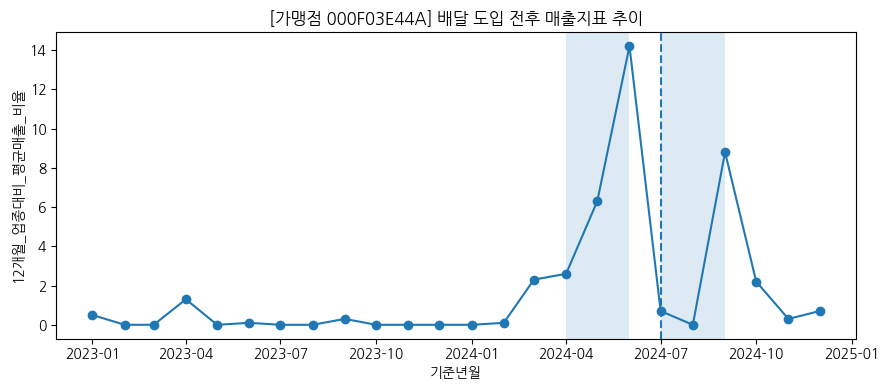

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# target_id = "012A64A73B"
target_id = started_ids[0]

# 해당 가맹점 시계열만 추출
g = df_sorted[df_sorted['가맹점구분번호'] == target_id].copy()

# 도입 전/후를 보기 위한 개월수 설정
window = 3

# 배달 도입 시점(first_valid_idx) 계산
vals = g['배달매출비율_clean'].values
metric = g['12개월_업종대비_평균매출_비율'].values  # 다른 지표로 바꾸고 싶으면 여기만 변경
dates = pd.to_datetime(g['기준년월_dt']) if '기준년월_dt' in g.columns else g['기준년월_parsed']

is_valid = ~np.isnan(vals)
if not is_valid.any():
    raise ValueError("이 가맹점은 배달을 시작한 기록이 없습니다(started_delivery가 아닐 수 있음).")

first_valid_idx = np.argmax(is_valid)

# 배달 전/후 인덱스 범위
pre_idx = np.arange(max(0, first_valid_idx - window), first_valid_idx)
post_idx = np.arange(first_valid_idx, min(len(vals), first_valid_idx + window))

# 결측 제거한 전/후 관측치
pre_vals = metric[pre_idx][~pd.isna(metric[pre_idx])]
post_vals = metric[post_idx][~pd.isna(metric[post_idx])]

if len(pre_vals) == 0 or len(post_vals) == 0:
    raise ValueError("전/후 윈도우에 유효한 매출 지표가 충분하지 않습니다. window를 늘려보세요.")

pre_mean = float(np.mean(pre_vals))
post_mean = float(np.mean(post_vals))
diff = post_mean - pre_mean

print(f"[가맹점 {target_id}] 배달 도입 시점: {dates.iloc[first_valid_idx].date()}")
print(f"전({len(pre_vals)}개) 평균: {pre_mean:.3f}")
print(f"후({len(post_vals)}개) 평균: {post_mean:.3f}")
print(f"변화량(후-전): {diff:.3f}")

# 전/후 구간의 관측치 테이블
around = g.iloc[max(0, first_valid_idx - (window+2)) : min(len(g), first_valid_idx + (window+2))][
    ['가맹점구분번호','기준년월','배달매출비율_clean','12개월_업종대비_평균매출_비율']
]
print("\n[도입 시점 전후 관측치]")
print(around.to_string(index=False))

# 전/후 변화 시각화(도입시점 ---로 표시)
plt.figure(figsize=(9,4))
plt.plot(dates, metric, marker='o')
plt.axvline(dates.iloc[first_valid_idx], linestyle='--')  # 도입 시점 표시

# 전/후 창 영역 시각화
if len(pre_idx) > 0:
    plt.axvspan(dates.iloc[pre_idx[0]], dates.iloc[pre_idx[-1]], alpha=0.15)
if len(post_idx) > 0:
    plt.axvspan(dates.iloc[post_idx[0]], dates.iloc[post_idx[-1]], alpha=0.15)
plt.title(f"[가맹점 {target_id}] 배달 도입 전후 매출지표 추이")
plt.xlabel("기준년월")
plt.ylabel("12개월_업종대비_평균매출_비율")
plt.tight_layout()
plt.show()


[가맹점 129DB16365] 배달 도입 시점: 2024-05-01
전(1개) 평균: 6.900
후(3개) 평균: 79.867
변화량(후-전): 72.967

[도입 시점 전후 관측치]
   가맹점구분번호   기준년월  배달매출비율_clean  12개월_업종대비_평균매출_비율
129DB16365 202404           NaN                6.9
129DB16365 202405          16.5               90.1
129DB16365 202406          47.9               77.3
129DB16365 202407          42.4               72.2
129DB16365 202408          50.2               72.7
129DB16365 202409          62.0               55.1


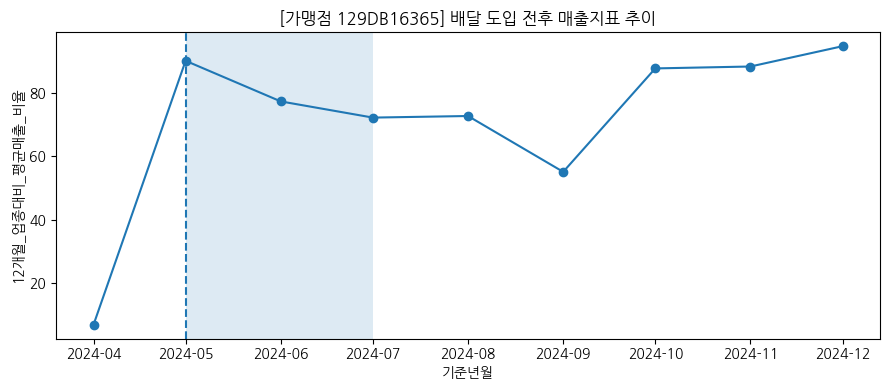

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# target_id = "012A64A73B"
target_id = started_ids[29]

# 해당 가맹점 시계열만 추출
g = df_sorted[df_sorted['가맹점구분번호'] == target_id].copy()

# 도입 전/후를 보기 위한 개월수 설정
window = 3

# 배달 도입 시점(first_valid_idx) 계산
vals = g['배달매출비율_clean'].values
metric = g['12개월_업종대비_평균매출_비율'].values  # 다른 지표로 바꾸고 싶으면 여기만 변경
dates = pd.to_datetime(g['기준년월_dt']) if '기준년월_dt' in g.columns else g['기준년월_parsed']

is_valid = ~np.isnan(vals)
if not is_valid.any():
    raise ValueError("이 가맹점은 배달을 시작한 기록이 없습니다(started_delivery가 아닐 수 있음).")

first_valid_idx = np.argmax(is_valid)

# 배달 전/후 인덱스 범위
pre_idx = np.arange(max(0, first_valid_idx - window), first_valid_idx)
post_idx = np.arange(first_valid_idx, min(len(vals), first_valid_idx + window))

# 결측 제거한 전/후 관측치
pre_vals = metric[pre_idx][~pd.isna(metric[pre_idx])]
post_vals = metric[post_idx][~pd.isna(metric[post_idx])]

if len(pre_vals) == 0 or len(post_vals) == 0:
    raise ValueError("전/후 윈도우에 유효한 매출 지표가 충분하지 않습니다. window를 늘려보세요.")

pre_mean = float(np.mean(pre_vals))
post_mean = float(np.mean(post_vals))
diff = post_mean - pre_mean

print(f"[가맹점 {target_id}] 배달 도입 시점: {dates.iloc[first_valid_idx].date()}")
print(f"전({len(pre_vals)}개) 평균: {pre_mean:.3f}")
print(f"후({len(post_vals)}개) 평균: {post_mean:.3f}")
print(f"변화량(후-전): {diff:.3f}")

# 전/후 구간의 관측치 테이블
around = g.iloc[max(0, first_valid_idx - (window+2)) : min(len(g), first_valid_idx + (window+2))][
    ['가맹점구분번호','기준년월','배달매출비율_clean','12개월_업종대비_평균매출_비율']
]
print("\n[도입 시점 전후 관측치]")
print(around.to_string(index=False))

# 전/후 변화 시각화(도입시점 ---로 표시)
plt.figure(figsize=(9,4))
plt.plot(dates, metric, marker='o')
plt.axvline(dates.iloc[first_valid_idx], linestyle='--')  # 도입 시점 표시

# 전/후 창 영역 시각화 (optional)
if len(pre_idx) > 0:
    plt.axvspan(dates.iloc[pre_idx[0]], dates.iloc[pre_idx[-1]], alpha=0.15)
if len(post_idx) > 0:
    plt.axvspan(dates.iloc[post_idx[0]], dates.iloc[post_idx[-1]], alpha=0.15)
plt.title(f"[가맹점 {target_id}] 배달 도입 전후 매출지표 추이")
plt.xlabel("기준년월")
plt.ylabel("12개월_업종대비_평균매출_비율")
plt.tight_layout()
plt.show()


### 인사이트

1. 오른애들도 있고
2. 매출이 하락한 애들도 있음

> 무조건 매출이 상승한 것만은 아니다.

---

### 배달 도입 후 매출 상승/하락한 가게 분포 확인

In [22]:
# diff가 양수인 (매출 상승) 가맹점 수
positive_count = (started_summary['diff'] > 0).sum()

# diff가 음수인 (매출 하락) 가맹점 수
negative_count = (started_summary['diff'] < 0).sum()

# diff가 0인 (변화 없음) 가맹점 수
zero_count = (started_summary['diff'] == 0).sum()

# 전체 started_delivery 가맹점 수
total = len(started_summary)

print(f"배달 도입 전후 매출 변화 요약")
print(f"총 {total}개 가맹점 중:")
print(f"매출 상승 (diff > 0): {positive_count}개 ({positive_count/total*100:.1f}%)")
print(f"매출 하락 (diff < 0): {negative_count}개 ({negative_count/total*100:.1f}%)")
print(f"변화 없음 (diff = 0): {zero_count}개 ({zero_count/total*100:.1f}%)")


배달 도입 전후 매출 변화 요약
총 450개 가맹점 중:
매출 상승 (diff > 0): 348개 (77.3%)
매출 하락 (diff < 0): 97개 (21.6%)
변화 없음 (diff = 0): 5개 (1.1%)


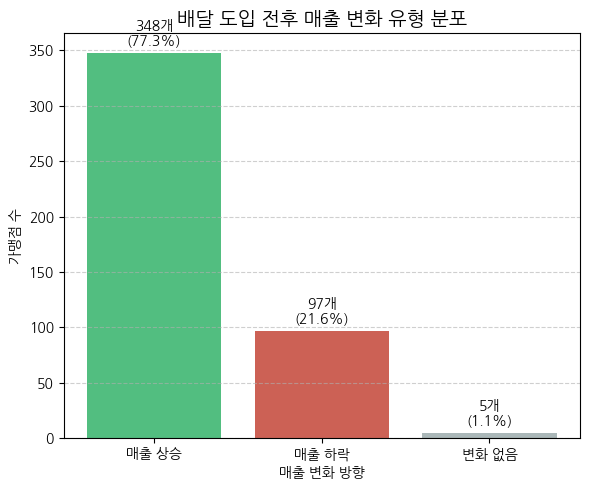

In [23]:
# 데이터프레임으로 묶기
diff_summary = pd.DataFrame({
    '구분': ['매출 상승', '매출 하락', '변화 없음'],
    '가맹점 수': [positive_count, negative_count, zero_count],
    '비율(%)': [positive_count/total*100, negative_count/total*100, zero_count/total*100]
})

# 시각화
plt.figure(figsize=(6,5))
bars = plt.bar(diff_summary['구분'], diff_summary['가맹점 수'],
               color=['#27ae60', '#c0392b', '#95a5a6'], alpha=0.8)
plt.title("배달 도입 전후 매출 변화 유형 분포", fontsize=14)
plt.xlabel("매출 변화 방향")
plt.ylabel("가맹점 수")
plt.grid(axis='y', linestyle='--', alpha=0.6)

# 막대 위에 개수 & 비율 표시
for i, bar in enumerate(bars):
    y = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2,
             y + (total * 0.01),
             f"{int(y)}개\n({diff_summary['비율(%)'][i]:.1f}%)",
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

### 인사이트

1. 매출상승한 가게가 과반 이상임을 확인
2. 매출상승의 요인과 하락의 요인을 확인할 필요 존재

### 가맹점 별 실제 매출이 얼마나 상승했는지에 대한 비율

In [24]:
started_summary['매출변화율(%)'] = (
    (started_summary['post_mean'] - started_summary['pre_mean'])
    / started_summary['pre_mean'].replace(0, np.nan) * 100
).round(1)

# 가맹점별 요약
summary_detailed = started_summary.reset_index().sort_values('매출변화율(%)', ascending=False)

# 상위 10개 예시
print("배달 도입 후 매출 변화율 상위 10개 가맹점")
display(summary_detailed.head(10))


배달 도입 후 매출 변화율 상위 10개 가맹점


,가맹점구분번호,pre_mean,post_mean,diff,매출변화율(%)
314,A7BC78E695,0.133333,61.400000,61.266667,45950.0
123,43A4217D54,0.300000,132.366667,132.066667,44022.2
326,B215092E54,3.600000,729.900000,726.300000,20175.0
246,80B55AD69E,1.700000,124.500000,122.800000,7223.5
164,56355334E5,12.550000,347.266667,334.716667,2667.1
25,0F236D513F,1.100000,28.100000,27.000000,2454.5
42,19DDC941DD,7.100000,173.533333,166.433333,2344.1
273,8ED8FEB618,5.600000,135.766667,130.166667,2324.4
448,FF3C3A8704,0.850000,20.566667,19.716667,2319.6
199,68FD248F73,7.100000,153.700000,146.600000,2064.8


### 배달 도입 후 매출 상승/하락 요인 분석 1. 업종

In [25]:
# diff 기준 분류
started_summary['매출변화_그룹'] = np.where(started_summary['diff'] > 0, '상승', '하락')

# 가맹점 속성 붙이기 (업종, 지역, 고객 특성 등)
compare_df = (
    started_summary.reset_index()
    .merge(df_sorted[['가맹점구분번호', '업종',
                      '거주지고객_비중', '직장이고객_비중', '유동인구고객_비중',
                      '12개월_동일업종_폐업가맹점_비중']]
           .drop_duplicates('가맹점구분번호'),
           on='가맹점구분번호', how='left')
)

In [26]:
# 업종별 상승/하락 개수 집계
summary_by_industry = (
    compare_df
    .groupby(['업종', '매출변화_그룹'])
    .size()
    .unstack(fill_value=0)
)

# 전체 대비 비율 계산
summary_by_industry['총합'] = summary_by_industry.sum(axis=1)
summary_by_industry['상승비율(%)'] = (summary_by_industry['상승'] / summary_by_industry['총합'] * 100).round(1)
summary_by_industry['하락비율(%)'] = (summary_by_industry['하락'] / summary_by_industry['총합'] * 100).round(1)

# 결과 정렬 (상승비율 높은 순)
summary_by_industry = summary_by_industry.sort_values('상승', ascending=False)

print("업종별 배달 도입 후 매출 상승/하락 현황")
display(summary_by_industry)


업종별 배달 도입 후 매출 상승/하락 현황


매출변화_그룹,상승,하락,총합,상승비율(%),하락비율(%)
업종,,,,,
카페,49,16,65,75.4,24.6
커피전문점,31,5,36,86.1,13.9
한식-육류/고기,29,14,43,67.4,32.6
베이커리,27,7,34,79.4,20.6
백반/가정식,21,5,26,80.8,19.2
한식-단품요리일반,20,10,30,66.7,33.3
분식,17,2,19,89.5,10.5
양식,17,5,22,77.3,22.7
치킨,17,2,19,89.5,10.5


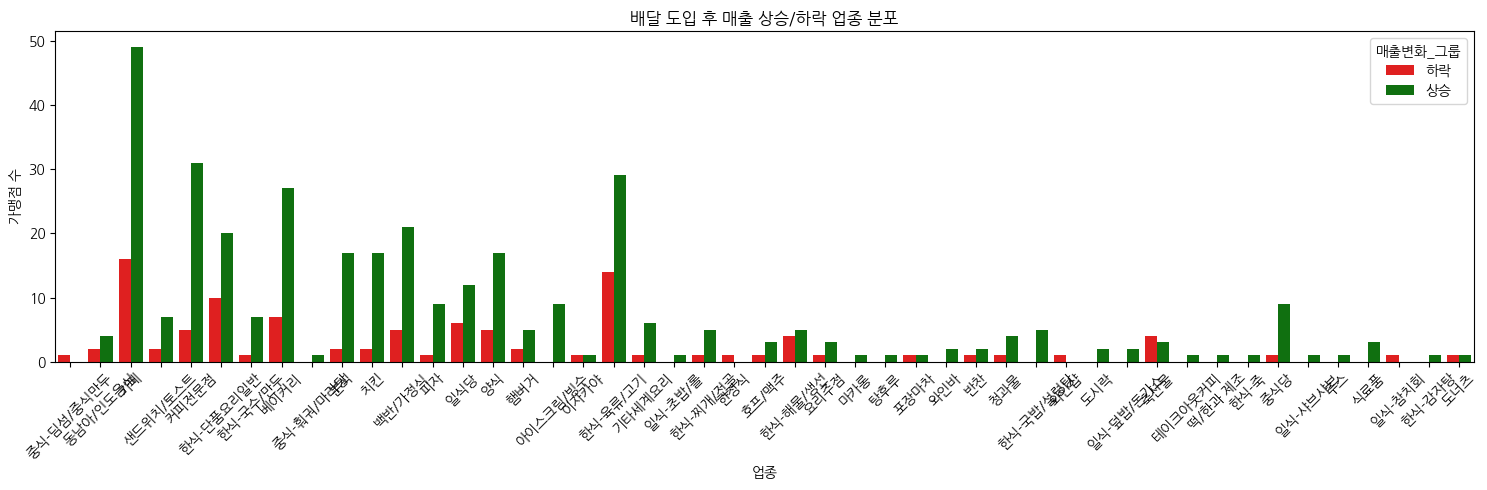

In [27]:
# 업종별 상승 vs 하락 비율 비교
plt.figure(figsize=(15,5))
sns.countplot(data=compare_df, x='업종', hue='매출변화_그룹', hue_order=['하락', '상승'], palette=['red', 'green'])
plt.title("배달 도입 후 매출 상승/하락 업종 분포")
plt.xlabel("업종")
plt.ylabel("가맹점 수")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 가설1: 배달을 시작한 가맹점은 매출 상승에 유의미한 효과를 보았을 것이다.

- 귀무가설 H₀: 배달을 시작한 가맹점은 매출 상승 효과가 없다 (평균 변화량 = 0)
- 대립가설 H₁: 배달을 시작한 가맹점은 매출이 유의미하게 상승했다 (평균 변화량 > 0)

---
- 독립변수: 배달 도입 여부 (started_delivery)
- 종속변수: 매출 변화 (diff = post_mean - pre_mean)

---
- 사용한 통계검정 방식: 단일표본 t-검정(ttest)

In [28]:
from scipy import stats
import numpy as np

# diff: 도입 후 - 도입 전 매출 평균차 (started_summary 안에 있음)
diffs = started_summary['diff'].dropna()

# 단측(one-sided) t-검정 (평균 > 0 인지)
t_stat, p_two_sided = stats.ttest_1samp(diffs, popmean=0)

# 단측 검정용 p값 (상승방향)
p_one_sided = p_two_sided / 2 if t_stat > 0 else 1 - (p_two_sided / 2)

print(f"배달 도입 전후 매출 차이에 대한 단일표본 t-검정")
print(f"t-stat: {t_stat:.3f}")
print(f"p-value: {p_one_sided:.5f}")
print(f"평균 diff: {diffs.mean():.3f}")

배달 도입 전후 매출 차이에 대한 단일표본 t-검정
t-stat: 10.176
p-value: 0.00000
평균 diff: 59.226


### 배달을 계속 하는 업종 vs 배달을 계속 안하는 업종 비교

In [29]:
print(df_sorted.columns.tolist())

['가맹점구분번호', '가맹점주소', '가맹점명', '브랜드구분코드', '가맹점_지역', '업종', '상권', '개설일', '폐업일', '위도', '경도', '기준년월', '운영개월수_구간', '월매출_구간', '월매출건수_구간', '월고객수_구간', '객단가_구간', '취소율_구간', '배달매출비율', '12개월_업종대비_평균매출_비율', '12개월_업종대비_평균매출건수_비율', '12개월_업종내_매출_백분위', '12개월_상권내_매출_백분위', '12개월_동일업종_폐업가맹점_비중', '12개월_동일상권_폐업가맹점_비중', '남성20대이하_비중', '남성30대_비중', '남성40대_비중', '남성50대_비중', '남성60대이상_비중', '여성20대이하_비중', '여성30대_비중', '여성40대_비중', '여성50대_비중', '여성60대이상_비중', '재방문고객_비중', '신규고객_비중', '거주지고객_비중', '직장이고객_비중', '유동인구고객_비중', '기준년월_dt', '동일상권해지가맹점비중_new', '상태', '월매출_중앙값', '전월매출', '매출증감률', 'is_closed', '폐업확률', '상권클러스터', '업종중분류', '배달여부', '배달매출비율_clean']


In [30]:
delivery_patterns = df_sorted.groupby('가맹점구분번호').apply(classify_delivery_pattern)
delivery_patterns.name = '배달패턴'

/tmp/ipython-input-101033269.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  delivery_patterns = df_sorted.groupby('가맹점구분번호').apply(classify_delivery_pattern)


In [31]:
# 배달 패턴 정보를 df_sorted에 병합
df_with_pattern = (
    df_sorted[['가맹점구분번호', '업종']]
    .drop_duplicates('가맹점구분번호')
    .merge(delivery_patterns.rename('배달패턴'), on='가맹점구분번호', how='left')
)

In [32]:
print(df_with_pattern.value_counts())

가맹점구분번호     업종          배달패턴            
FFF0DAC445  꼬치구이        never_delivered     1
000F03E44A  중식-딤섬/중식만두  started_delivery    1
002816BA73  요리주점        never_delivered     1
003473B465  백반/가정식      never_delivered     1
003AC99735  커피전문점       always_delivered    1
                                           ..
00F733C995  한식-육류/고기    never_delivered     1
00F54829E1  카페          never_delivered     1
00DA1813DE  청과물         never_delivered     1
00CEAAD71A  포장마차        never_delivered     1
00BC189C4B  한식-해물/생선    always_delivered    1
Name: count, Length: 4172, dtype: int64


In [33]:
filtered_df = df_with_pattern[
    df_with_pattern['배달패턴'].isin(['always_delivered', 'never_delivered'])
]

In [34]:
# 업종별로 배달패턴 집계
industry_pattern = (
    filtered_df
    .groupby(['업종', '배달패턴'])
    .size()
    .unstack(fill_value=0)
)

# 각 업종 내 비율 계산
industry_pattern['전체'] = industry_pattern.sum(axis=1)
industry_pattern['배달비율(%)'] = (
    industry_pattern['always_delivered'] / industry_pattern['전체'] * 100
).round(1)
industry_pattern['비배달비율(%)'] = (
    industry_pattern['never_delivered'] / industry_pattern['전체'] * 100
).round(1)

# 배달비율 높은 순으로 정렬
industry_pattern = industry_pattern.sort_values('always_delivered', ascending=False)

print("업종별 배달 수행 여부 분포 (항상 배달 vs 비배달)")
display(industry_pattern.head(20))

업종별 배달 수행 여부 분포 (항상 배달 vs 비배달)


배달패턴,always_delivered,never_delivered,전체,배달비율(%),비배달비율(%)
업종,,,,,
한식-육류/고기,100,264,364,27.5,72.5
치킨,83,29,112,74.1,25.9
한식-단품요리일반,80,172,252,31.7,68.3
카페,79,188,267,29.6,70.4
백반/가정식,58,239,297,19.5,80.5
커피전문점,57,73,130,43.8,56.2
분식,53,63,116,45.7,54.3
중식당,48,37,85,56.5,43.5
베이커리,42,62,104,40.4,59.6


<Figure size 1800x600 with 0 Axes>

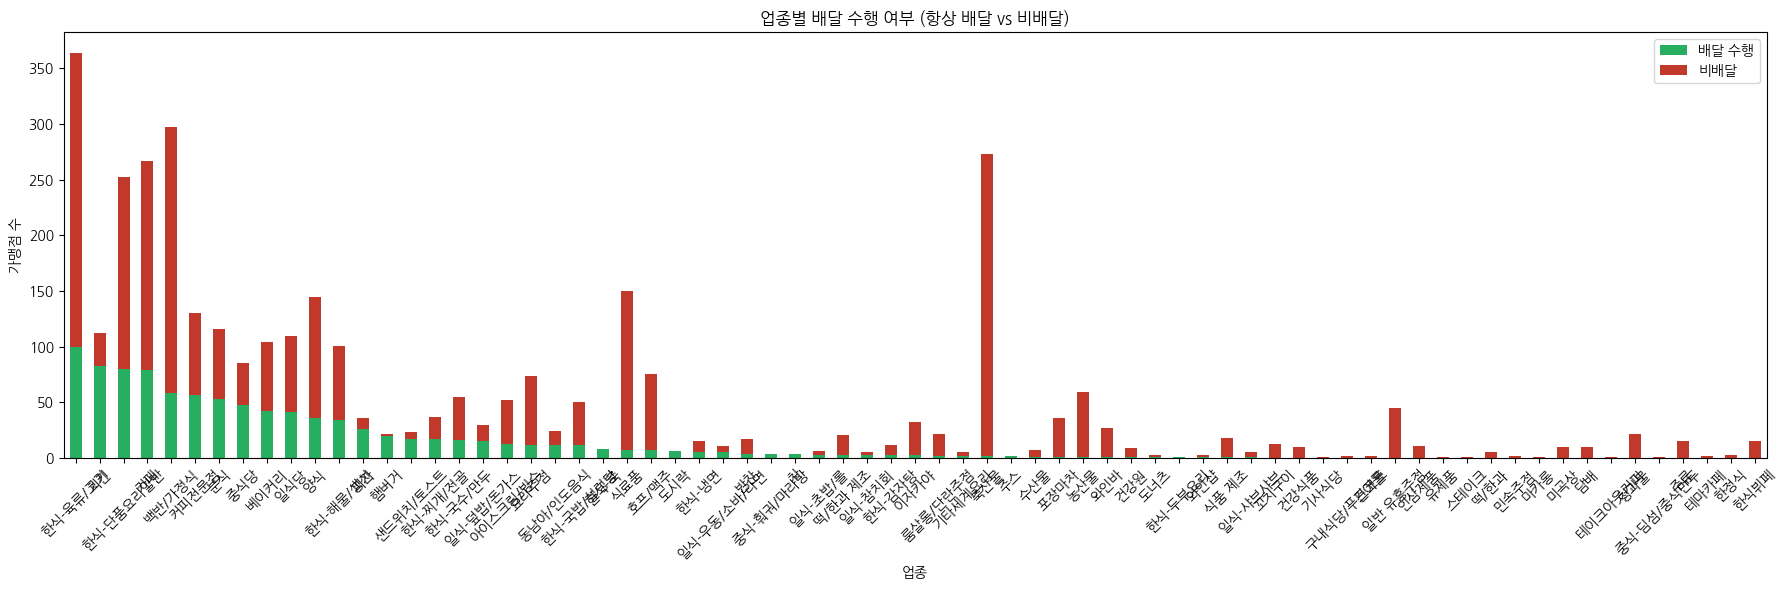

In [35]:
plt.figure(figsize=(18,6))
industry_pattern[['always_delivered', 'never_delivered']].plot(
    kind='bar', stacked=True, color=['#27ae60','#c0392b'], figsize=(18,6)
)
plt.title("업종별 배달 수행 여부 (항상 배달 vs 비배달)")
plt.xlabel("업종")
plt.ylabel("가맹점 수")
plt.xticks(rotation=45)
plt.legend(['배달 수행', '비배달'])
plt.tight_layout()
plt.show()

In [36]:
# 상위 3개 / 하위 3개 업종 추출
top3 = industry_pattern.sort_values('always_delivered', ascending=False).head(3)
bottom3 = industry_pattern.sort_values('비배달비율(%)', ascending=True).head(3)

display(top3)
display(bottom3)

배달패턴,always_delivered,never_delivered,전체,배달비율(%),비배달비율(%)
업종,,,,,
한식-육류/고기,100,264,364,27.5,72.5
치킨,83,29,112,74.1,25.9
한식-단품요리일반,80,172,252,31.7,68.3


배달패턴,always_delivered,never_delivered,전체,배달비율(%),비배달비율(%)
업종,,,,,
도시락,6,0,6,100.0,0.0
중식-훠궈/마라탕,4,0,4,100.0,0.0
차,4,0,4,100.0,0.0


### 실제 배달이 매출상승에 효과를 준것인지, 통제변수 추가해 확인 진행

- 통제변수를 넣어서 시간이나 추세를 통제한 후 회귀분석 돌려보기

In [37]:
df_panel = df_sorted.copy()

# 배달 시작 여부 (이미 started_delivery 분류한 상태라 가맹점 단위)
df_panel = df_panel.merge(delivery_patterns.rename("배달패턴"), on='가맹점구분번호')

# started_delivery 가맹점 추출
started_ids = df_panel[df_panel['배달패턴']=='started_delivery']['가맹점구분번호'].unique()

df_panel['treatment'] = df_panel['가맹점구분번호'].isin(started_ids).astype(int)


In [38]:
df_panel['배달시작여부'] = ~df_panel['배달매출비율_clean'].isna()

In [39]:
df_panel = df_panel.rename(columns={
    '12개월_업종대비_평균매출_비율': '매출비율'
})

In [40]:
import numpy as np
import pandas as pd

df = df_sorted.copy()
df['배달매출비율_clean'] = df['배달매출비율'].replace([-9999, -999999.9], np.nan)

# treated(도입 그룹) / post(도입 이후 달) 정의
started_ids = delivery_patterns[delivery_patterns=='started_delivery'].index
df['treated'] = df['가맹점구분번호'].isin(started_ids).astype(int)
df = df.sort_values(['가맹점구분번호','기준년월'])
df['post'] = (df.groupby('가맹점구분번호')['배달매출비율_clean']
                .apply(lambda s: s.notna().cummax().astype(int))).values

df['did'] = df['treated'] * df['post']  # DiD 상호작용
y = df['12개월_업종대비_평균매출_비율'].astype(float)

# within 변환(가맹점 FE 제거)
y_w  = y - df.groupby('가맹점구분번호')['12개월_업종대비_평균매출_비율'].transform('mean')
x_w  = df['did'] - df.groupby('가맹점구분번호')['did'].transform('mean')

# 월 FE 제거(추세/시점 통제)
y_w2 = y_w - df.groupby('기준년월')[y_w.name].transform('mean')
x_w2 = x_w - df.groupby('기준년월')[x_w.name].transform('mean')

# OLS (상수 불필요: 평균이 0)
beta = np.sum(x_w2 * y_w2) / np.sum(x_w2 * x_w2)
# 표준오차(뉴이–웨스트 대신 간단 버전)
resid = y_w2 - beta * x_w2
sigma2 = np.sum(resid**2) / (len(resid)-1)
se = np.sqrt(sigma2 / np.sum(x_w2 * x_w2))

from scipy.stats import t as tdist
t = beta / se
# 단측 p (상승 가설)
from scipy import stats
p_two = 2*(1-tdist.cdf(abs(t), df=len(resid)-1))
p_one = p_two/2 if t>0 else 1-(p_two/2)

print(f"[within-DiD] beta={beta:.4f}, t={t:.3f}, p(one-sided)={p_one:.5f}")


[within-DiD] beta=567.0298, t=155.821, p(one-sided)=0.00000


In [48]:
import statsmodels.formula.api as smf

df2 = df.copy()
# 안전하게 컬럼명 교체(숫자/특문 회피)
df2 = df2.rename(columns={'12개월_업종대비_평균매출_비율': '매출비율'})

mod = smf.ols(
    "매출비율 ~ did + C(가맹점구분번호) + C(기준년월)",
    data=df2
).fit(cov_type='cluster', cov_kwds={'groups': df2['가맹점구분번호']})

print(mod.summary())
# did의 계수 = DiD 효과, p값은 cluster-robust


/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4195, but rank is 24
  warnings.warn('covariance of constraints does not have full '


                            OLS Regression Results                            
Dep. Variable:                   매출비율   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                -9.498e+15
Date:                Wed, 05 Nov 2025   Prob (F-statistic):               1.00
Time:                        07:39:52   Log-Likelihood:            -4.8035e+05
No. Observations:               86278   AIC:                         9.691e+05
Df Residuals:                   82082   BIC:                         1.008e+06
Df Model:                        4195                                         
Covariance Type:              cluster                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

## 가설2: 배달 매출 비율이 높은 가맹점은 동일업종 대비 폐업비중이 낮을 것이다

- 귀무가설 H₀: 배달매출비율과 동일업종 대비 폐업비중은 관계가 없다.
- 대립가설 H₁: 배달매출비율이 높은 가맹점일수록 동일업종 대비 폐업가맹점 비중이 낮다.

---
- 독립변수(X): 배달매출비율_clean
- 종속변수(Y): 12개월_동일업종_폐업가맹점_비중

---
- 사용한 통계검정: 피어슨 상관분석
    - 두 연속형 변수 간의 선형관계가 존재하는지 검정

In [41]:
# 결측 및 이상치 제거
subset = df_sorted[['배달매출비율_clean', '12개월_동일업종_폐업가맹점_비중']].dropna()

# 피어슨 상관계수
corr, p_val = stats.pearsonr(subset['배달매출비율_clean'], subset['12개월_동일업종_폐업가맹점_비중'])

print(f"피어슨 상관분석 결과")
print(f"상관계수 (r): {corr:.3f}")
print(f"p-value: {p_val:.20f}")

피어슨 상관분석 결과
상관계수 (r): 0.115
p-value: 0.00000000000000000000


### 결과

- r < 0, p < 0.05: 음의 상관관계 유의 -> 가설 지지
- r > 0, p < 0.05: 양의 상관 -> 배달매출비율이 높을수록 폐업비중이 오히려 높음 (가설 반대)

오히려 배달매출비율이 높을수록 폐업 비중이 오히려 높다는 결론을 내릴 수 있음

In [42]:
# 업종별로 통계 검정해보기
results = []
for 업종, group in df_sorted.groupby('업종'):
    sub = group[['배달매출비율_clean', '12개월_동일업종_폐업가맹점_비중']].dropna()
    if len(sub) > 5:
        r, p = stats.pearsonr(sub['배달매출비율_clean'], sub['12개월_동일업종_폐업가맹점_비중'])
        results.append({'업종': 업종, 'r': r, 'p': p})

results_df = pd.DataFrame(results).sort_values('r')
print("업종별 배달매출비율 vs 폐업비중 상관관계")
display(results_df.head(10))  # 음의 상관(가설지지) 상위 업종


업종별 배달매출비율 vs 폐업비중 상관관계


/tmp/ipython-input-4080532192.py:6: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r, p = stats.pearsonr(sub['배달매출비율_clean'], sub['12개월_동일업종_폐업가맹점_비중'])


,업종,r,p
22,와플/크로플,-0.885905,4.524457e-07
26,일식-샤브샤브,-0.798545,2.566318e-08
8,룸살롱/단란주점,-0.344923,1.635482e-02
2,기타세계요리,-0.293432,1.323398e-03
31,주스,-0.250002,6.827092e-02
41,탕후루,-0.245304,4.945376e-01
3,농산물,-0.216025,3.106584e-01
17,식품 제조,-0.215549,3.117510e-01
46,한식-국수/만두,-0.211369,3.882911e-06
45,한식-국밥/설렁탕,-0.186514,7.838564e-05


In [36]:
import statsmodels.api as sm

X = subset[['배달매출비율_clean']]
X = sm.add_constant(X)
y = subset['12개월_동일업종_폐업가맹점_비중']

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:     12개월_동일업종_폐업가맹점_비중   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     393.0
Date:                Wed, 05 Nov 2025   Prob (F-statistic):           6.79e-87
Time:                        07:13:13   Log-Likelihood:                -74930.
No. Observations:               29182   AIC:                         1.499e+05
Df Residuals:                   29180   BIC:                         1.499e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           16.3863      0.025    655.655   

## 가설 3: 계속 배달을 하고 있는 업종은 폐업률이 높을 것이다.

- 귀무가설 H₀: 배달 수행 여부에 따른 폐업비중의 차이는 없다.
- 대립가설 H₁: 배달 수행 업종(always_delivered)의 폐업비중이 더 높다.

---
- 독립변수(X): 배달패턴 (2집단: always_delivered vs never_delivered)
- 종속변수(Y): 12개월_동일업종_폐업가맹점_비중

---
- 사용한 통계검정: 독립표본 t-test

In [43]:
df_with_closure = (
    df_sorted[['가맹점구분번호', '12개월_동일업종_폐업가맹점_비중']]
    .drop_duplicates('가맹점구분번호')
    .merge(delivery_patterns.rename('배달패턴'), on='가맹점구분번호', how='left')
)

In [44]:
two_groups = df_with_closure[df_with_closure['배달패턴'].isin(['always_delivered', 'never_delivered'])].dropna()

In [45]:
# 그룹별 데이터 분리
always = two_groups.loc[two_groups['배달패턴'] == 'always_delivered', '12개월_동일업종_폐업가맹점_비중']
never = two_groups.loc[two_groups['배달패턴'] == 'never_delivered', '12개월_동일업종_폐업가맹점_비중']

# 등분산 검정 (Levene test)
levene_stat, levene_p = stats.levene(always, never)
equal_var = levene_p > 0.05  # 등분산이면 True

# 독립표본 t-test (양측)
t_stat, p_val_two_sided = stats.ttest_ind(always, never, equal_var=equal_var)

# 단측검정: 배달 그룹의 폐업률이 더 높다고 가정 (right-tailed)
p_one_sided = p_val_two_sided / 2 if t_stat > 0 else 1 - (p_val_two_sided / 2)

print("독립표본 t-검정 결과")
print(f"t 통계량: {t_stat:.3f}")
print(f"p-값(단측): {p_one_sided:.5f}")
print('---')
print(f"always_delivered 평균: {always.mean():.3f}")
print(f"never_delivered 평균: {never.mean():.3f}")

독립표본 t-검정 결과
t 통계량: -1.237
p-값(단측): 0.89183
---
always_delivered 평균: 15.016
never_delivered 평균: 15.226


## 이외의 EDA

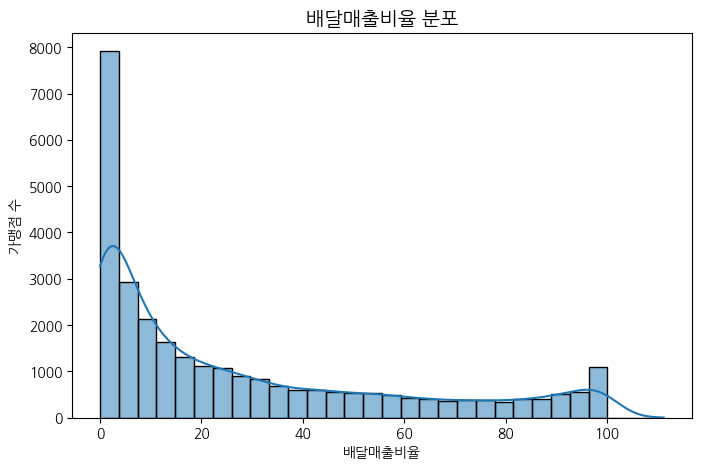

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df['배달매출비율_clean'], kde=True, bins=30)
plt.title('배달매출비율 분포', fontsize=14)
plt.xlabel('배달매출비율')
plt.ylabel('가맹점 수')
plt.show()

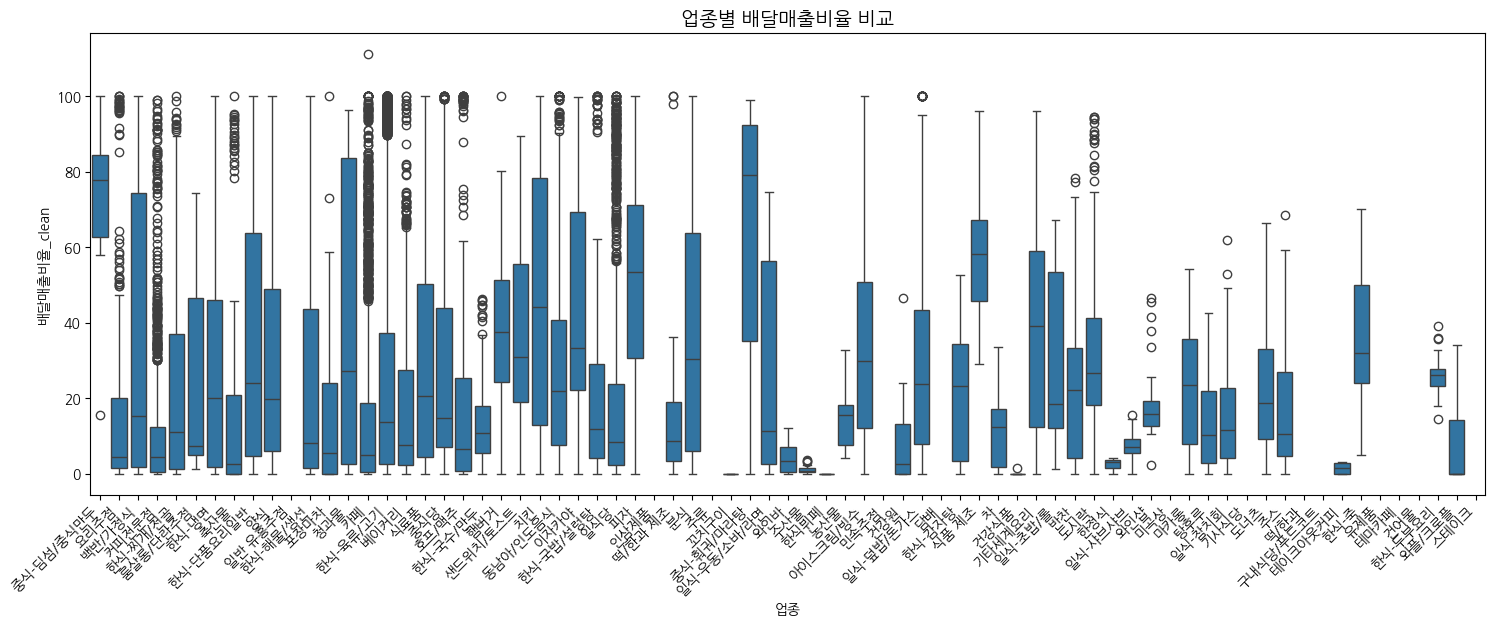

In [47]:
plt.figure(figsize=(18,6))
top_categories = df['업종'].value_counts().index
sns.boxplot(x='업종', y='배달매출비율_clean', data=df[df['업종'].isin(top_categories)])
plt.xticks(rotation=45, ha='right')
plt.title('업종별 배달매출비율 비교', fontsize=14)
plt.show()


## 상권의 변동성 추이 EDA 진행

- 상권안에서의 개업/폐업 빈도를 확인하여
- 해당 상권들이 얼마나 변동하는 상권인지 파악하기 위함
- 추후 온도의 변동성을 상권 변동성으로 예측할 예정


### 상권변동성 보기 위한 데이터 전처리

1. 가맹점구분번호, 상권클러스터, 개설일, 폐업일, 기준년월_dt만 추출
2. 상권 변동성 기준 년월 2023-01~2024-12로 정의
3. 개업일, 폐업일 datetime으로 전처리

In [52]:
df.columns

Index(['가맹점구분번호', '가맹점주소', '가맹점명', '브랜드구분코드', '가맹점_지역', '업종', '상권', '개설일',
       '폐업일', '위도', '경도', '기준년월', '운영개월수_구간', '월매출_구간', '월매출건수_구간', '월고객수_구간',
       '객단가_구간', '취소율_구간', '배달매출비율', '12개월_업종대비_평균매출_비율',
       '12개월_업종대비_평균매출건수_비율', '12개월_업종내_매출_백분위', '12개월_상권내_매출_백분위',
       '12개월_동일업종_폐업가맹점_비중', '12개월_동일상권_폐업가맹점_비중', '남성20대이하_비중', '남성30대_비중',
       '남성40대_비중', '남성50대_비중', '남성60대이상_비중', '여성20대이하_비중', '여성30대_비중',
       '여성40대_비중', '여성50대_비중', '여성60대이상_비중', '재방문고객_비중', '신규고객_비중', '거주지고객_비중',
       '직장이고객_비중', '유동인구고객_비중', '기준년월_dt', '동일상권해지가맹점비중_new', '상태', '월매출_중앙값',
       '전월매출', '매출증감률', 'is_closed', '폐업확률', '상권클러스터', '업종중분류', '배달여부',
       '배달매출비율_clean', 'treated', 'post', 'did'],
      dtype='object')

In [56]:
df['상권클러스터'].value_counts().sort_index()

,count
상권클러스터,
0,4713
1,4871
2,7973
3,8491
4,6647
5,4252
6,10086
7,7845
8,7158


In [59]:
df['is_closed'].value_counts()

,count
is_closed,
0,83944
1,2334


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86278 entries, 0 to 86277
Data columns (total 55 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   가맹점구분번호              86278 non-null  object 
 1   가맹점주소                86278 non-null  object 
 2   가맹점명                 86278 non-null  object 
 3   브랜드구분코드              11725 non-null  object 
 4   가맹점_지역               86278 non-null  object 
 5   업종                   86278 non-null  object 
 6   상권                   86278 non-null  object 
 7   개설일                  86278 non-null  object 
 8   폐업일                  2334 non-null   object 
 9   위도                   86278 non-null  float64
 10  경도                   86278 non-null  float64
 11  기준년월                 86278 non-null  int64  
 12  운영개월수_구간             86278 non-null  int64  
 13  월매출_구간               86278 non-null  int64  
 14  월매출건수_구간             86278 non-null  int64  
 15  월고객수_구간              86278 non-null 

### 기간 내 상권 클러스터 별 표준편차 확인

1. 월별로 순변동(개업수-폐업수) 를 계산함
2. 이 순변동 값들이 시간에 따라 얼마나 들쭉날쭉 했는지 보기 위해 표준편차 구함 -> 한달 한달 순변동이 얼마나 들쭉날쭉 변동하는지를 확인하는 것
3. 표준편차가 크다 = 개업과 폐업이 많이 일어나, 그 폭이 매달 크게 바뀜 -> 상권 불안정
4. 표준편차가 작다 = 개업과 폐업 변화가 적고, 매달 비슷하게 유지됨 -> 상권 안정적

따라 위 변동성_std = 상권의 불안정 정도를 보여줌(월별 순변동 값들의 흩어진 정도)

- 순변동 값이 +10->-8->+12->-5처럼 왔다갔다 많이 하면 표준편차 큼(변동성 높음)
- 순변동 값이 +1->+2->+1->+2처럼 일정하면 표준편차 작음(변동성 낮음)

> 즉, 개업-폐업 균형이 얼마나 들쭉날쭉한가? -> 안정적인가? 출렁이는가? 확인 가능

- 어느달엔 확 상권이 생겼다가 어느달엔 확 줄어드는 유동성을 확인 가능
- 매달 비슷한 규모로 상권이 생기고 줄어드는지 확인하기 위한 것
- 한달 한달의 상권 체력이 안정적인지, 충격적인지 확인

In [69]:
# 분석 기간
start = pd.Timestamp("2023-01-01")
end   = pd.Timestamp("2024-12-31")

In [72]:
# 날짜 변환
df["개설일"] = pd.to_datetime(df["개설일"], errors="coerce")
df["폐업일"] = pd.to_datetime(df["폐업일"], errors="coerce")

# 분석기간 내 개업/폐업 이벤트만 추출
df_open = df[(df["개설일"] >= start) & (df["개설일"] <= end)].copy()
df_close = df[(df["폐업일"] >= start) & (df["폐업일"] <= end)].copy()

In [77]:
# 개업/폐업 월 단위로 변환
df_open["event_month"] = df_open["개설일"].dt.to_period("M").dt.to_timestamp()
df_close["event_month"] = df_close["폐업일"].dt.to_period("M").dt.to_timestamp()

In [78]:
# 상권클러스터 × 월별 개업/폐업 카운트
open_count = df_open.groupby(["상권클러스터", "event_month"]).size().rename("개업수")
close_count = df_close.groupby(["상권클러스터", "event_month"]).size().rename("폐업수")

In [79]:
trend = pd.concat([open_count, close_count], axis=1).fillna(0).reset_index()
trend["개업수"] = trend["개업수"].astype(int)
trend["폐업수"] = trend["폐업수"].astype(int)
trend["순변동"] = trend["개업수"] - trend["폐업수"]

In [80]:
volatility = trend.groupby("상권클러스터")["순변동"].std(ddof=0).reset_index()
volatility = volatility.sort_values("순변동", ascending=False).rename(columns={"순변동": "변동성_std"})

In [90]:
print("상권별 변동성 순위")
print(volatility)

# print("월별 개업/폐업/순변동 데이터")
# print(trend.head())

상권별 변동성 순위
    상권클러스터    변동성_std
6        6  64.897301
2        2  50.617009
9        9  49.773026
8        8  38.964371
10      10  32.101627
3        3  31.396853
1        1  29.645543
7        7  29.591229
4        4  28.863923
5        5  25.916018
0        0  22.754575
14      14  21.730178
13      13  19.954935
11      11  18.834004
12      12  10.245955


### 인사이트

- 생각해봐야 하는 부분은...
    - 핫한 상권이어서 가게가 빨리 살고 빨리 죽는걸지도? 어제 이야기 했던 팝업스토어가 그 예시
    - 주거지역 상권같은 경우는 당연히 오래 유지되는 것일테고..
    - 그래서 중요한건 이 표준편차로 그 상권이 얼마나 변동폭이 있었는지를 확인하는 것으로 봐야함

상권이 2년간 개업과 폐업이 잦고 폭이 커서 변동성이 높은 경우,
시장 진입시 주의가 필요한 것은 사실 -> 유행/단기 매출형 업종에게 유리함 이런식으로 풀어야할듯?

> 10+64/3 = 24.XXX 구간으로 자르기?
- 24 구간까지: 5개
- 48 구간까지: 7개
- 72 구간까지: 3개



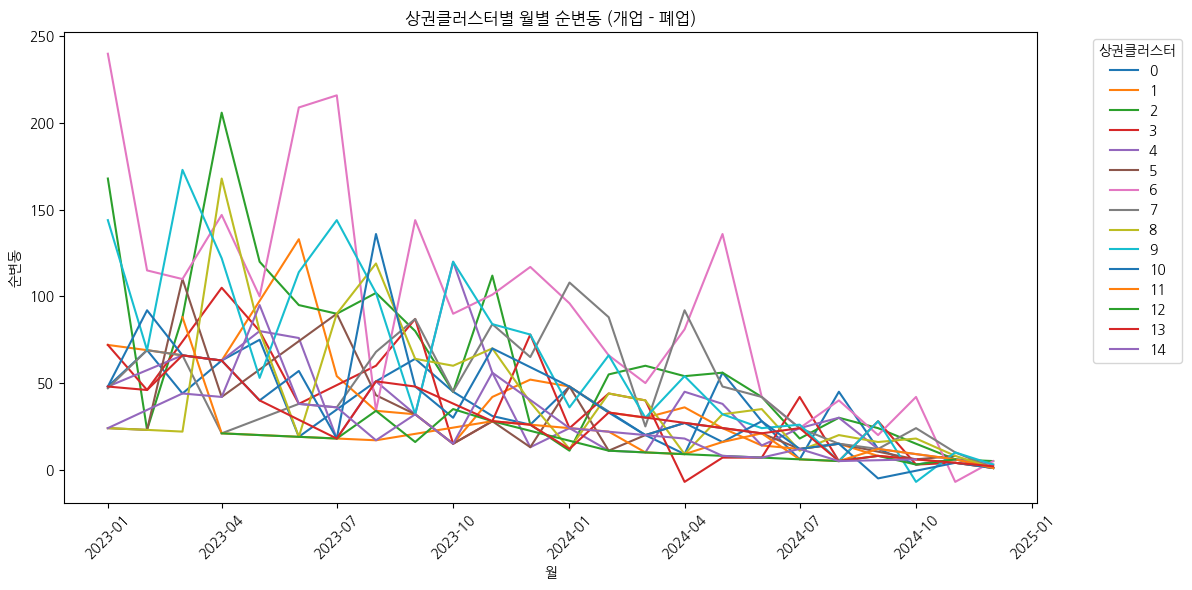

In [88]:
plt.figure(figsize=(12, 6))

for cluster, sub in trend.groupby("상권클러스터"):
    sub = sub.sort_values("event_month")
    plt.plot(sub["event_month"], sub["순변동"], label=str(cluster))

plt.title("상권클러스터별 월별 순변동 (개업 - 폐업)")
plt.xlabel("월")
plt.ylabel("순변동")
plt.xticks(rotation=45)

plt.legend(title="상권클러스터", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [85]:
print("총 상권클러스터 개수:", df["상권클러스터"].nunique())
print(df["상권클러스터"].unique())

총 상권클러스터 개수: 15
[ 6  3  0  2  1  8  9 10  7  5  4 12 14 11 13]


In [86]:
print("그래프에 포함된 클러스터 개수:",
      trend["상권클러스터"].nunique())

그래프에 포함된 클러스터 개수: 15


### 기간 내 상권 클러스터 별 변동 점포 수 확인

기간 내 개업 또는 폐업 이벤트가 발생한 점포의 수 확인하는 것. 즉, 얼마나 많은 점포가 실제로 바뀌었는 가? -> 상권의 회전률 확인

점포수가 많이 바뀐다고 해서, 무조건 변동성이 높은 것은 아니다.

In [92]:
# 기간 내 개업/폐업 여부
df["opened_in_period"] = (df["개설일"] >= start) & (df["개설일"] <= end)
df["closed_in_period"] = (df["폐업일"] >= start) & (df["폐업일"] <= end)

In [93]:
# 개업 OR 폐업 중 하나라도 있으면 -> 변동 있음
df["변동있음"] = df["opened_in_period"] | df["closed_in_period"]

In [95]:
df["변동있음"].value_counts()

,count
변동있음,
False,71784
True,14494


In [96]:
# 클러스터별 변동 있는 점포 수
cluster_change_count = (
    df[df["변동있음"]]
    .groupby("상권클러스터")["가맹점구분번호"]
    .nunique()
    .reset_index()
    .rename(columns={"가맹점구분번호":"변동점포수"})
    .sort_values("변동점포수", ascending=False)
)

In [97]:
print(cluster_change_count)

    상권클러스터  변동점포수
6        6    186
9        9    141
2        2    124
7        7    110
8        8     88
4        4     76
3        3     73
0        0     68
10      10     67
1        1     65
5        5     51
13      13     43
14      14     36
11      11     31
12      12     22


In [98]:
# 변동성 표준편차
vol = trend.groupby("상권클러스터")["순변동"].std(ddof=0).reset_index()
vol = vol.rename(columns={"순변동":"변동성_std"})

# 변동 점포수
churn = (
    df[df["변동있음"]]
    .groupby("상권클러스터")["가맹점구분번호"]
    .nunique()
    .reset_index()
    .rename(columns={"가맹점구분번호":"변동점포수"})
)

# 하나의 표로 합치기
score = vol.merge(churn, on="상권클러스터")
score = score.sort_values("변동성_std", ascending=False)

print(score)

    상권클러스터    변동성_std  변동점포수
6        6  64.897301    186
2        2  50.617009    124
9        9  49.773026    141
8        8  38.964371     88
10      10  32.101627     67
3        3  31.396853     73
1        1  29.645543     65
7        7  29.591229    110
4        4  28.863923     76
5        5  25.916018     51
0        0  22.754575     68
14      14  21.730178     36
13      13  19.954935     43
11      11  18.834004     31
12      12  10.245955     22


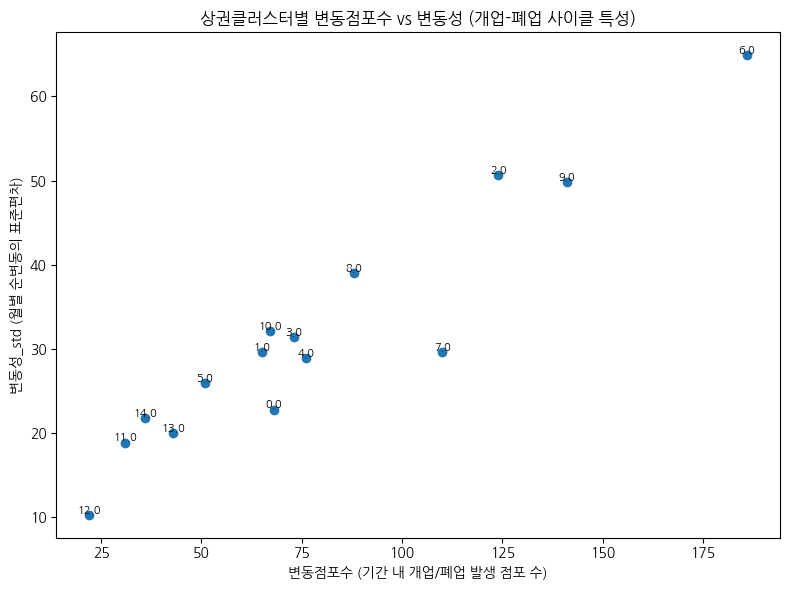

In [116]:
churn = (
    df[df["변동있음"]]
    .groupby("상권클러스터")["가맹점구분번호"]
    .nunique()
    .reset_index()
    .rename(columns={"가맹점구분번호":"변동점포수"})
)

# 두 지표 합치기
scatter_data = volatility.merge(churn, on="상권클러스터", how="left").fillna(0)

# 산점도 그리기
plt.figure(figsize=(8,6))
plt.scatter(scatter_data["변동점포수"], scatter_data["변동성_std"])

# 각 점 옆에 클러스터 번호 라벨링
for _, row in scatter_data.iterrows():
    plt.text(row["변동점포수"], row["변동성_std"], str(row["상권클러스터"]),
             fontsize=8, ha="center", va="bottom")

plt.xlabel("변동점포수 (기간 내 개업/폐업 발생 점포 수)")
plt.ylabel("변동성_std (월별 순변동의 표준편차)")
plt.title("상권클러스터별 변동점포수 vs 변동성 (개업-폐업 사이클 특성)")
plt.tight_layout()
plt.show()

In [117]:
# 결과 테이블 확인
print(scatter_data.sort_values("변동성_std", ascending=False))

    상권클러스터    변동성_std  변동점포수
0        6  64.897301    186
1        2  50.617009    124
2        9  49.773026    141
3        8  38.964371     88
4       10  32.101627     67
5        3  31.396853     73
6        1  29.645543     65
7        7  29.591229    110
8        4  28.863923     76
9        5  25.916018     51
10       0  22.754575     68
11      14  21.730178     36
12      13  19.954935     43
13      11  18.834004     31
14      12  10.245955     22


---

### 전체 상권 클러스터들의 운영기간 (+박스플롯)

In [104]:
# 날짜 변환
for col in ["개설일", "폐업일"]:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors="coerce")

# 관측 종료일 (Right-censoring 기준)
cutoff = pd.Timestamp("2024-12-31")

# 생존기간(개월) 계산: 폐업점포는 폐업일-개설일, 운영중은 cutoff-개설일
df["생존기간_개월"] = np.where(
    df["폐업일"].notna(),
    (df["폐업일"] - df["개설일"]).dt.days / 30,
    (cutoff - df["개설일"]).dt.days / 30
)
# 음수/이상치 제거, 소수 1자리 반올림
df["생존기간_개월"] = df["생존기간_개월"].round(1)
df = df[df["생존기간_개월"].notna() & (df["생존기간_개월"] >= 0)].copy()

# 이벤트 플래그(폐업 발생 여부) – KM에서 사용
df["event"] = df["폐업일"].notna().astype(int)

In [107]:
def plot_box_by_cluster(data: pd.DataFrame):
    plt.figure(figsize=(20, 6))
    data.boxplot(column="생존기간_개월", by="상권클러스터", rot=45)
    plt.title("상권클러스터별 생존기간 분포 (개월)")
    plt.suptitle("")
    plt.xlabel("상권클러스터")
    plt.ylabel("생존기간 (개월)")
    plt.tight_layout()
    plt.show()

In [115]:
summary = (
    df.groupby("상권클러스터")["생존기간_개월"]
      .agg(
          count = "count",
          mean = "mean",
          std = "std",
          median = "median",
          q1 = lambda x: x.quantile(0.25),
          q3 = lambda x: x.quantile(0.75),
          min = "min",
          max = "max"
      )
      .round(2)
      .reset_index()
)

print(summary)


    상권클러스터  count    mean    std  median     q1     q3  min    max
0        0   4713   89.38  72.57    69.0  32.60  121.1  0.5  352.7
1        1   4871   85.68  69.67    63.4  33.40  117.8  0.7  317.3
2        2   7973   76.36  67.05    53.9  29.50  105.2  0.4  424.2
3        3   8491  107.46  70.76    93.6  48.50  153.5  1.6  306.3
4        4   6647   88.88  68.96    69.9  37.95  120.6  0.7  327.9
5        5   4252   78.60  63.23    59.4  31.90  103.3  1.4  310.8
6        6  10086   68.60  60.28    51.4  26.60   87.9  0.4  315.4
7        7   7845   93.61  70.44    75.8  35.40  132.7  1.0  318.2
8        8   7158   84.18  68.22    61.2  32.60  116.4  0.3  298.2
9        9  10494   99.11  78.80    80.0  36.10  136.2  0.5  355.4
10      10   3453   51.45  34.96    42.4  24.20   73.9  0.7  195.3
11      11   3139   87.90  66.98    69.7  39.70  114.9  0.9  366.4
12      12   1178   82.59  66.51    67.2  26.70  117.1  1.4  276.0
13      13   2901   91.66  71.98    69.7  33.00  131.1  0.6  2

<Figure size 2000x600 with 0 Axes>

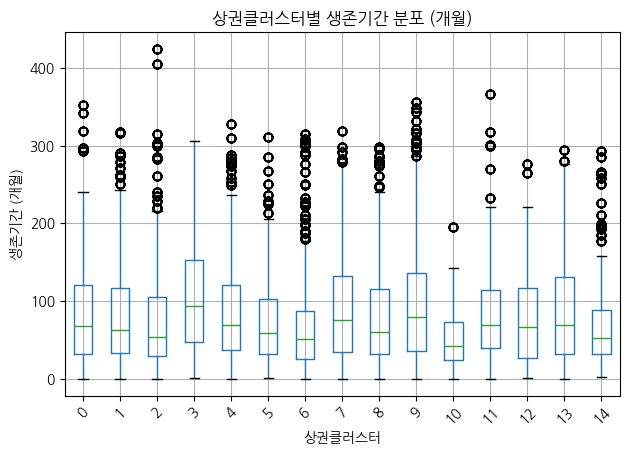

In [108]:
plot_box_by_cluster(df)

### 상권 클러스터 생존기간 긴 업종 추이 박스플롯

- 상권 전체 비교 가능
- 클러스터 별 확인 가능

In [109]:
def plot_industry_box(data: pd.DataFrame, cluster_id=None, industry_col="업종중분류", min_count=10):
    """
    cluster_id=None이면 전체 기준, 아니면 해당 클러스터 내 업종 비교
    min_count 미만 표본 업종은 제외(박스플롯 안정성)
    """
    sub = data.copy() if cluster_id is None else data[data["상권클러스터"] == cluster_id].copy()
    title_prefix = "전체" if cluster_id is None else f"클러스터 {cluster_id}"

    if industry_col not in sub.columns:
        print(f"[WARN] 컬럼 '{industry_col}' 없음. 업종 비교 생략.")
        return

    counts = sub[industry_col].value_counts()
    keep = counts[counts >= min_count].index
    sub = sub[sub[industry_col].isin(keep)]

    if sub.empty:
        print("[WARN] 업종 표본이 부족합니다.")
        return

    plt.figure(figsize=(12, 6))
    sub.boxplot(column="생존기간_개월", by=industry_col, rot=60)
    plt.title(f"{title_prefix} - 업종별 생존기간 분포 (≥{min_count}개 업종만)")
    plt.suptitle("")
    plt.xlabel(industry_col)
    plt.ylabel("생존기간 (개월)")
    plt.tight_layout()
    plt.show()

<Figure size 1200x600 with 0 Axes>

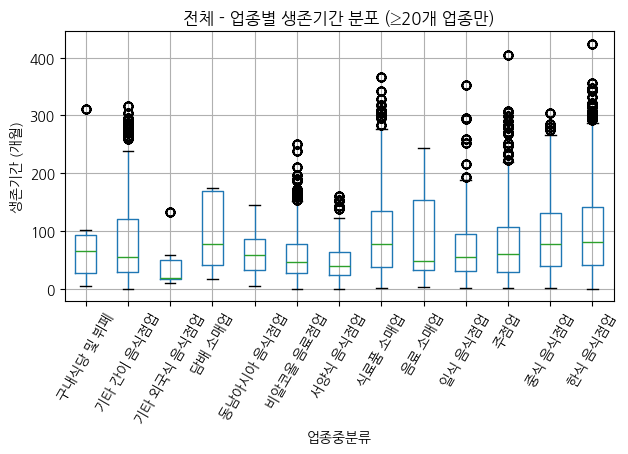

In [110]:
plot_industry_box(df, cluster_id=None, industry_col="업종중분류", min_count=20)

<Figure size 1200x600 with 0 Axes>

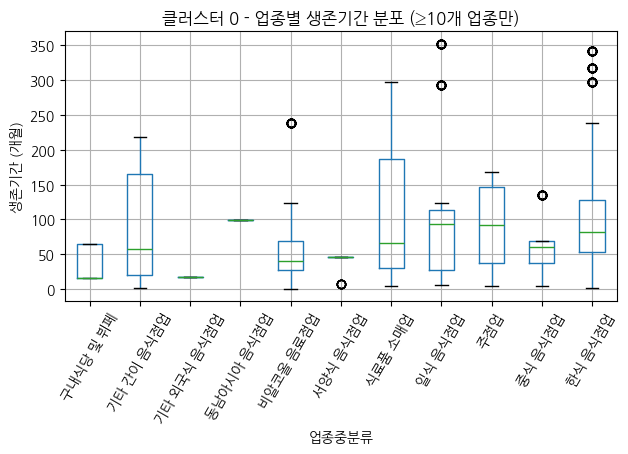

In [111]:
plot_industry_box(df, cluster_id=0, industry_col="업종중분류", min_count=10)

# 이제부터 머신러닝!

In [20]:
df_machine = pd.read_csv('/content/가맹점_고객비중_24개월.csv')

In [21]:
df_machine

,가맹점구분번호,기준년월,신규고객_비중,재방문고객_비중,유동인구고객_비중,신규고객_비중_cleaned,재방문고객_비중_cleaned,유동인구고객_비중_cleaned
0,000F03E44A,202301,100.00,0.00,100.0,100.00,0.00,100.0
1,000F03E44A,202302,0.00,0.00,-999999.9,0.00,0.00,NaN
2,000F03E44A,202303,0.00,0.00,-999999.9,0.00,0.00,NaN
3,000F03E44A,202304,50.00,0.00,0.0,50.00,0.00,0.0
4,000F03E44A,202305,33.33,0.00,100.0,33.33,0.00,100.0
...,...,...,...,...,...,...,...,...
86273,FFF0DAC445,202408,6.24,9.60,63.2,6.24,9.60,63.2
86274,FFF0DAC445,202409,8.07,9.62,62.3,8.07,9.62,62.3
86275,FFF0DAC445,202410,7.48,10.27,67.2,7.48,10.27,67.2
86276,FFF0DAC445,202411,7.96,10.28,62.6,7.96,10.28,62.6


In [22]:
df_machine.shape

(86278, 8)

In [23]:
df_machine = df_machine.copy()

# 공백을 NaN으로 통일 후 0 대체
for c in df_machine[['신규고객_비중_cleaned', '재방문고객_비중_cleaned', '유동인구고객_비중_cleaned']]:
    # 문자열 공백 정리
    df_machine[c] = df_machine[c].replace({r'^\s*$': np.nan}, regex=True)
    # 숫자 변환
    df_machine[c] = pd.to_numeric(df_machine[c], errors='coerce')
    # NaN -> 0
    df_machine[c] = df_machine[c].fillna(0)


In [24]:
# cleaned 데이터만 남기기
df_machine = df_machine[['가맹점구분번호', '기준년월', '신규고객_비중_cleaned', '재방문고객_비중_cleaned', '유동인구고객_비중_cleaned']]

In [25]:
df_machine.head()

,가맹점구분번호,기준년월,신규고객_비중_cleaned,재방문고객_비중_cleaned,유동인구고객_비중_cleaned
0,000F03E44A,202301,100.00,0.0,100.0
1,000F03E44A,202302,0.00,0.0,0.0
2,000F03E44A,202303,0.00,0.0,0.0
3,000F03E44A,202304,50.00,0.0,0.0
4,000F03E44A,202305,33.33,0.0,100.0


In [26]:
# 월별 합산 및 0 합 플래그 생성
df_machine['합계_3열'] = df_machine[['신규고객_비중_cleaned', '재방문고객_비중_cleaned', '유동인구고객_비중_cleaned']].sum(axis=1, skipna=True)
# ['신규고객_비중_cleaned', '재방문고객_비중_cleaned', '유동인구고객_비중_cleaned'] 값 합해서 0 나오면 zero_sum_flag = 1
df_machine['zero_sum_flag'] = (df_machine['합계_3열'] == 0).astype(int)

df_machine[['가맹점구분번호', '기준년월', '합계_3열', 'zero_sum_flag'] + ['신규고객_비중_cleaned', '재방문고객_비중_cleaned', '유동인구고객_비중_cleaned']].head()

,가맹점구분번호,기준년월,합계_3열,zero_sum_flag,신규고객_비중_cleaned,재방문고객_비중_cleaned,유동인구고객_비중_cleaned
0,000F03E44A,202301,200.00,0,100.00,0.0,100.0
1,000F03E44A,202302,0.00,1,0.00,0.0,0.0
2,000F03E44A,202303,0.00,1,0.00,0.0,0.0
3,000F03E44A,202304,50.00,0,50.00,0.0,0.0
4,000F03E44A,202305,133.33,0,33.33,0.0,100.0


In [27]:
# zero_sum_flag를 가맹점 별로 계산해서 합계가 3이상이면 삭제
# 즉, 3달이상 세개 컬럼 데이터셋 값이 0인 경우(=zero_sum_flag 가 1인 경우가 3번 이상인 경우) 삭제

flag_counts = df_machine.groupby('가맹점구분번호')['zero_sum_flag'].sum().rename('zero_sum_cnt')
to_drop_ids = flag_counts[flag_counts >= 3].index

summary = (
    flag_counts.to_frame()
    .assign(삭제대상=lambda s: s['zero_sum_cnt'] >= 3)
    .sort_values('zero_sum_cnt', ascending=False)
)

print(f'전체 가맹점 수: {flag_counts.shape[0]}')
print(f'삭제 대상 가맹점 수(>=3회): {len(to_drop_ids)}')
summary.head(10)

전체 가맹점 수: 4172
삭제 대상 가맹점 수(>=3회): 259


,zero_sum_cnt,삭제대상
가맹점구분번호,,
62A9B7888B,23,True
5B537AFFD8,23,True
E0B79043DA,23,True
EED0404EC2,23,True
261CA88AD3,23,True
81E3DAF03B,23,True
A6964F8879,23,True
708697C149,23,True
F4D804EFA3,23,True


In [28]:
# 데이터 확인
df_clean = df_machine[~df_machine['가맹점구분번호'].isin(to_drop_ids)].copy()
print('정제 전/후 행 수:', len(df_machine), '->', len(df_clean))

정제 전/후 행 수: 86278 -> 80705


In [29]:
print(len(to_drop_ids) / len(flag_counts))

0.06208053691275168


In [30]:
post_flag = (
    df_clean.groupby('가맹점구분번호')['zero_sum_flag'].sum()
)
violations = post_flag[post_flag >= 3]
print('잔여 위반 가맹점 수:', violations.shape[0])

잔여 위반 가맹점 수: 0


In [31]:
df_clean.head(3)

,가맹점구분번호,기준년월,신규고객_비중_cleaned,재방문고객_비중_cleaned,유동인구고객_비중_cleaned,합계_3열,zero_sum_flag
24,002816BA73,202301,7.20,12.85,66.7,86.75,0
25,002816BA73,202302,7.14,12.07,58.6,77.81,0
26,002816BA73,202303,9.50,12.35,72.7,94.55,0


In [32]:
df_clean.to_csv('ML_clean_data.csv')

---

## 예측을 위한 최적의 k(개월수) 찾기

> window swip back test / lookback window(최소시계열 길이)를 찾아내는 것

-> rolling forecasting origin으로 검증 필요!

1. 여기서 k(필요한 최소 개월 수) 를 3, 4, 6, 9, 12개월 등으로 바꿔가며
2. 예측 성능(MAPE, MAE, RMSE) 비교하면 됨 -> 시계열 예측에서 가장 많이 쓰는 평가지표

- 보통 이런 비중 지표는 트렌드 + 계절성(월별 패턴) 이 있다.
- 때문에 6개월은 짧고, 9~12개월이 안정적으로 잘 맞는 경우가 많다.

<참고>
- Naive(t): 7월 값을 6월 값으로 예측
- Seasonal Naive(t-12): 7월 값을 전년 7월 값으로 예측

<흐름순서>
1. 여기서 k(필요한 최소 개월 수) 를 3, 4, 6, 9, 12개월 등으로 바꿔가며
2. 예측 성능(MAPE, MAE, RMSE) 비교
3. N개월이 최적인가?를 보기 위해, 이동평균 예측(직전 k개월 평균으로 다음달 예측)으로
4. **k = 3,6,9,12**를 쭉 훑는 롤링-오리진 백테스트도 함께 돌려봄


---
### 전처리(datetime)

In [4]:
df_clean = pd.read_csv('/content/ML_clean_data.csv')

In [5]:
# 날짜 컬럼 변환
df_clean['기준년월'] = pd.to_datetime(df_clean['기준년월'].astype(str), format='%Y%m')

# 타깃 컬럼들
TARGET_COLS = [
    '신규고객_비중_cleaned',
    '재방문고객_비중_cleaned',
    '유동인구고객_비중_cleaned'
]

### 공통 시계열 지표(metric) 함수

In [6]:
def mae(y_true, y_pred):
    y_true = np.asarray(y_true, dtype=float)
    y_pred = np.asarray(y_pred, dtype=float)
    return np.mean(np.abs(y_true - y_pred))

def rmse(y_true, y_pred):
    y_true = np.asarray(y_true, dtype=float)
    y_pred = np.asarray(y_pred, dtype=float)
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

def mape(y_true, y_pred, eps=1e-8):
    y_true = np.asarray(y_true, dtype=float)
    y_pred = np.asarray(y_pred, dtype=float)
    mask = np.abs(y_true) > eps
    if not np.any(mask):
        return np.nan
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / (y_true[mask] + 1e-12))) * 100.0

def smape(y_true, y_pred, eps=1e-8):
    y_true = np.asarray(y_true, dtype=float)
    y_pred = np.asarray(y_pred, dtype=float)
    denom = (np.abs(y_true) + np.abs(y_pred))
    mask = denom > eps
    if not np.any(mask):
        return np.nan
    return np.mean(2.0 * np.abs(y_pred[mask] - y_true[mask]) / (denom[mask] + 1e-12)) * 100.0

def mase(y_true, y_pred, insample, m=1, eps=1e-8):
    """
    y_true, y_pred: 예측 구간 배열 (동일 길이)
    insample: in-sample 학습 시계열(1차원) - MASE 스케일러 계산용
    m: 계절 길이(월별 연간 seasonality면 12, 비계절은 1)
    """
    y_true = np.asarray(y_true, dtype=float)
    y_pred = np.asarray(y_pred, dtype=float)
    insample = np.asarray(insample, dtype=float)
    if len(insample) <= m:
        return np.nan
    d = np.abs(insample[m:] - insample[:-m]).mean()
    if d < eps:
        return np.nan
    return np.mean(np.abs(y_true - y_pred)) / d

def mase_macro(y_true, y_pred, train_mat, m=1, eps=1e-8):
    """
    여러 가맹점에 대해 store-wise MASE를 계산하고 평균(매크로)합니다.
    - y_true, y_pred: shape (n_stores,)
    - train_mat: shape (n_stores, T_train)  (각 가맹점의 학습구간 시계열)
    """
    y_true = np.asarray(y_true, dtype=float)
    y_pred = np.asarray(y_pred, dtype=float)
    mases = []
    for i in range(len(y_true)):
        ins = train_mat[i, :]
        if len(ins) <= m:
            mases.append(np.nan)
            continue
        d = np.mean(np.abs(ins[m:] - ins[:-m]))
        if d < eps:
            mases.append(np.nan)
        else:
            mases.append(np.mean(np.abs(y_true[i] - y_pred[i])) / d)
    return np.nanmean(mases)


### 고정분할: 2401~2406 -> 2407 베이스라인 평가

모델없이, 아주 단순한 방식으로 예측했을 때 정확도가 어느정도인지 확인
- (머신러닝 돌린게 아니고, 단순 예측방식으로 어느정도까지 맞추는지 확인한 것)

1. baseline: 비교 기준 모델. “머신러닝 모델이 이것보다 좋아야 ‘가치’가 있다.” 라는 기준
2. naive: “이번달 값 ≈ 지난달 값” 으로 예측하는 가장 단순한 방식
3. seasonal naive(t-12): “이번달 값 ≈ 작년 같은 달 값” 으로 예측하는 방식 (12개월 주기 가정)

---
- MAE: 예측-실제 차이 (절댓값) 평균 = 낮을수록 좋음
- RMSE: 큰 오차에 더 민감한 에러 = 낮을수록 좋음
- MAPE(%): 예측 오차를 %로 표시 = 낮을수록 좋음
- sMAPE(%): 0 근처 값에 안정적인 %오차 = 낮을수록 좋음
- MASE: Naive 대비 좋아졌는가? (1 미만이면 Naive보다 나음) = 1 미만이면 훌륭

In [7]:
# 평가 구간
train_months = pd.to_datetime(['2024-01','2024-02','2024-03','2024-04','2024-05','2024-06'])
test_month   = pd.to_datetime('2024-07')
seas_ref     = pd.to_datetime('2023-07')  # seasonal naive의 참조(12개월 전)

# 필요한 월을 모두 가진 가맹점만 선별 (공정성/누락 방지)
subset = df_clean[df_clean['기준년월'].isin(list(train_months) + [test_month, seas_ref])]
counts = (subset[subset['기준년월'].isin(list(train_months) + [test_month])]
          .groupby('가맹점구분번호')['기준년월'].nunique())
ok_stores = set(counts[counts == 7].index)  # Jan~Jul 7개 모두 보유
subset = subset[subset['가맹점구분번호'].isin(ok_stores)]

rows = []
for col in TARGET_COLS:
    pivot = subset.pivot_table(index='가맹점구분번호', columns='기준년월',
                               values=col, aggfunc='first')

    # 학습행렬(6개월), 정답(y_true), 두 베이스라인 예측 구하기
    train_mat = pivot[train_months].values.astype(float)               # (n,6)
    y_true    = pivot[test_month].values.astype(float)                 # (n,)
    naive_pred = pivot[pd.to_datetime('2024-06')].values.astype(float) # (n,)

    # seasonal naive (t-12): 2023-07 값이 있는 경우만
    if seas_ref in pivot.columns:
        seas_pred = pivot[seas_ref].values.astype(float)
        seas_mask = np.isfinite(seas_pred)
    else:
        seas_pred = np.full_like(y_true, np.nan)
        seas_mask = np.zeros_like(y_true, dtype=bool)

    # Naive(t) 성능
    rows.append({
        'target': col, 'baseline': 'Naive (t)',
        'n_stores': int(len(y_true)),
        'MAE': mae(y_true, naive_pred),
        'RMSE': rmse(y_true, naive_pred),
        'MAPE(%)': mape(y_true, naive_pred),
        'sMAPE(%)': smape(y_true, naive_pred),
        'MASE(macro, m=1)': mase_macro(y_true, naive_pred, train_mat, m=1),
        # 학습구간이 6개월이므로 m=12는 정의상 불가 → NaN 유지
        'MASE(macro, m=12)': np.nan
    })

    # Seasonal Naive(t-12) 성능 (가능한 스토어만)
    if seas_mask.any():
        rows.append({
            'target': col, 'baseline': 'Seasonal Naive (t-12)',
            'n_stores': int(seas_mask.sum()),
            'MAE': mae(y_true[seas_mask], seas_pred[seas_mask]),
            'RMSE': rmse(y_true[seas_mask], seas_pred[seas_mask]),
            'MAPE(%)': mape(y_true[seas_mask], seas_pred[seas_mask]),
            'sMAPE(%)': smape(y_true[seas_mask], seas_pred[seas_mask]),
            'MASE(macro, m=1)': mase_macro(y_true[seas_mask], seas_pred[seas_mask],
                                           train_mat[seas_mask], m=1),
            'MASE(macro, m=12)': np.nan
        })

summary_fixed_split = pd.DataFrame(rows).round(3)
print(summary_fixed_split)

              target               baseline  n_stores     MAE    RMSE  \
0    신규고객_비중_cleaned              Naive (t)      3371   2.536   4.822   
1    신규고객_비중_cleaned  Seasonal Naive (t-12)      3086   5.742  15.205   
2   재방문고객_비중_cleaned              Naive (t)      3371   1.123   2.638   
3   재방문고객_비중_cleaned  Seasonal Naive (t-12)      3086   4.207   7.851   
4  유동인구고객_비중_cleaned              Naive (t)      3371  10.309  18.965   
5  유동인구고객_비중_cleaned  Seasonal Naive (t-12)      3086  12.604  22.286   

   MAPE(%)  sMAPE(%)  MASE(macro, m=1)  MASE(macro, m=12)  
0   41.062    36.513             1.102                NaN  
1  106.972    50.193             3.402                NaN  
2    5.353     5.306             1.166                NaN  
3   20.762    19.692             4.653                NaN  
4   21.790    27.849             1.222                NaN  
5   24.777    33.413             1.553                NaN  


### 최소 몇개월 필요한지 확인 = window 길이 k-swip(one-step 백테스트)

- 이동평균(MA) 예측기로 k=3/6/9/12개월 창을 바꿔가며, 여러 달에 대해 one-step 예측을 백테스트
- sMAPE/MASE를 기준으로 가장 낮은 k(=최소 월 수)가 어느 정도인지 비교

In [8]:
def eval_moving_average(pivot, k, first_eval_month, last_eval_month):
    """
    pivot: index=가맹점, columns=기준년월, values=타깃값
    k: 이동평균 창 길이(필요한 '최소 개월 수' 가정)
    first_eval_month ~ last_eval_month 사이 각 달 t에 대해
      y_pred(t) = mean(y[t-1], ..., y[t-k])  로 one-step 예측
    """
    months = pivot.columns.sort_values()
    months = months[(months >= first_eval_month) & (months <= last_eval_month)]

    s_list, m_list = [], []
    nfolds = 0
    for t in months:
        prev_months = [t - pd.DateOffset(months=i) for i in range(1, k+1)]
        prev_months = list(reversed(prev_months))  # 시간순
        # 필요한 과거 k개월이 모두 있어야 평가 가능
        if not all(pm in pivot.columns for pm in prev_months):
            continue

        train_mat = pivot[prev_months].values.astype(float)  # (n,k)
        y_true = pivot[t].values.astype(float)
        y_pred = np.nanmean(train_mat, axis=1)

        s_list.append(smape(y_true, y_pred))
        m_list.append(mase_macro(y_true, y_pred, train_mat, m=1))
        nfolds += 1

    if nfolds == 0:
        return np.nan, np.nan, 0
    return float(np.nanmean(s_list)), float(np.nanmean(m_list)), nfolds

# 백테스트 실행: 2023-07 ~ 2024-12 동안 반복 예측
results = []
for col in TARGET_COLS:
    pivot = df_clean.pivot_table(index='가맹점구분번호', columns='기준년월',
                           values=col, aggfunc='first')
    for k in [3, 6, 9, 12]:
        s, m, nfolds = eval_moving_average(
            pivot, k,
            first_eval_month=pd.to_datetime('2023-07'),
            last_eval_month=pd.to_datetime('2024-12')
        )
        results.append({
            'target': col,
            'window_k(months)': k,
            'sMAPE(%)': None if pd.isna(s) else round(s, 3),
            'MASE(macro,m=1)': None if pd.isna(m) else round(m, 3),
            'folds(months evaluated)': int(nfolds)
        })

win_sweep = pd.DataFrame(results)
print(win_sweep)


/tmp/ipython-input-1440143205.py:22: RuntimeWarning: Mean of empty slice
  y_pred = np.nanmean(train_mat, axis=1)
/tmp/ipython-input-1440143205.py:22: RuntimeWarning: Mean of empty slice
  y_pred = np.nanmean(train_mat, axis=1)
/tmp/ipython-input-1440143205.py:22: RuntimeWarning: Mean of empty slice
  y_pred = np.nanmean(train_mat, axis=1)
/tmp/ipython-input-1440143205.py:22: RuntimeWarning: Mean of empty slice
  y_pred = np.nanmean(train_mat, axis=1)
/tmp/ipython-input-1440143205.py:22: RuntimeWarning: Mean of empty slice
  y_pred = np.nanmean(train_mat, axis=1)
/tmp/ipython-input-1440143205.py:22: RuntimeWarning: Mean of empty slice
  y_pred = np.nanmean(train_mat, axis=1)
/tmp/ipython-input-1440143205.py:22: RuntimeWarning: Mean of empty slice
  y_pred = np.nanmean(train_mat, axis=1)
/tmp/ipython-input-1440143205.py:22: RuntimeWarning: Mean of empty slice
  y_pred = np.nanmean(train_mat, axis=1)
/tmp/ipython-input-1440143205.py:22: RuntimeWarning: Mean of empty slice
  y_pred = np.n

               target  window_k(months)  sMAPE(%)  MASE(macro,m=1)  \
0     신규고객_비중_cleaned                 3    39.820            1.620   
1     신규고객_비중_cleaned                 6    43.971            1.220   
2     신규고객_비중_cleaned                 9    47.933            1.371   
3     신규고객_비중_cleaned                12    50.526            1.156   
4    재방문고객_비중_cleaned                 3     9.958            1.843   
5    재방문고객_비중_cleaned                 6    12.488            1.783   
6    재방문고객_비중_cleaned                 9    14.326            2.034   
7    재방문고객_비중_cleaned                12    15.769            2.280   
8   유동인구고객_비중_cleaned                 3    27.215            1.424   
9   유동인구고객_비중_cleaned                 6    28.211            1.067   
10  유동인구고객_비중_cleaned                 9    29.327            1.022   
11  유동인구고객_비중_cleaned                12    30.157            1.012   

    folds(months evaluated)  
0                        18  
1                        18  

/tmp/ipython-input-1440143205.py:22: RuntimeWarning: Mean of empty slice
  y_pred = np.nanmean(train_mat, axis=1)
/tmp/ipython-input-1440143205.py:22: RuntimeWarning: Mean of empty slice
  y_pred = np.nanmean(train_mat, axis=1)


### 인사이트

각 타겟별로 과거 몇개월(k)를 입력으로 써야 다음달을 잘 예측할 수 있는지 확인
- 이동평균모델(MA)로 one-step forecast 백테스트 결과

1. sMAPE ↓ → 예측 정확도가 높은 k (최근 변화 잘 따라감)
2. MASE ↓ → 나이브(t-1) 대비 안정성이 높은 k (과대출렁임 없는 예측)

### 최소 k 선택

- sMAPE 또는 MASE를 기준으로 각 타깃별 베스트 k를 뽑기

In [9]:
def pick_best_k(win_sweep_df, target, by='sMAPE(%)'):
    sub = win_sweep_df[win_sweep_df['target'] == target].dropna(subset=[by])
    if sub.empty:
        return None
    # 점수가 낮을수록 좋음 → 오름차순 정렬
    return sub.sort_values(by=by, ascending=True).iloc[0].to_dict()

best_by_target = {}
for col in TARGET_COLS:
    best_by_target[col] = {
        'by_sMAPE': pick_best_k(win_sweep, col, by='sMAPE(%)'),
        'by_MASE' : pick_best_k(win_sweep, col, by='MASE(macro,m=1)')
    }

import pprint
pprint.pprint(best_by_target)


{'신규고객_비중_cleaned': {'by_MASE': {'MASE(macro,m=1)': 1.156,
                                 'folds(months evaluated)': 12,
                                 'sMAPE(%)': 50.526,
                                 'target': '신규고객_비중_cleaned',
                                 'window_k(months)': 12},
                     'by_sMAPE': {'MASE(macro,m=1)': 1.62,
                                  'folds(months evaluated)': 18,
                                  'sMAPE(%)': 39.82,
                                  'target': '신규고객_비중_cleaned',
                                  'window_k(months)': 3}},
 '유동인구고객_비중_cleaned': {'by_MASE': {'MASE(macro,m=1)': 1.012,
                                   'folds(months evaluated)': 12,
                                   'sMAPE(%)': 30.157,
                                   'target': '유동인구고객_비중_cleaned',
                                   'window_k(months)': 12},
                       'by_sMAPE': {'MASE(macro,m=1)': 1.424,
                                   

### 인사이트
- 신규고객비중
    - sMAPE기준(정확도) k=3개월 => 단기반응형
    - MASE기준(안정성) k=12개월
- 재방문고객비중
    - sMAPE기준(정확도) k=3개월
    - MASE기준(안정성) k=6개월 => 관성형+최근성 조화
- 유동인구비중
    - sMAPE기준(정확도) k=3개월 => seasonal feature 추가해보면 좋다고함
    - MASE기준(안정성) k=12개월

1. sMAPE가 최소 = 최근 정보(3개월)이 가장 중요한 예측 신호
2. MASE가 최소 = 새로 6~12개월이 더 안정적 > 장기패턴도 일정부분 존재함

---

## LightGBM 진행

- 추후 XGboost, CatBoost 진행할 예정

In [10]:
# Lag Feature 생성 함수
def make_lag_features(df, target_col, k):
    df = df_clean.sort_values(['가맹점구분번호', '기준년월']).copy()

    # lag features 생성
    for i in range(1, k+1):
        df[f'{target_col}_lag{i}'] = df.groupby('가맹점구분번호')[target_col].shift(i)

    # Calendar feature
    df['year'] = df['기준년월'].dt.year
    df['month'] = df['기준년월'].dt.month
    df['quarter'] = df['기준년월'].dt.quarter

    return df

In [11]:
# 데이터 준비
target_col = '신규고객_비중_cleaned'
k = 3

In [12]:
# Lag Feature 적용
df_lag = make_lag_features(df_clean, target_col, k)

In [13]:
# Train/Test Split (예: 2024-01~06 → 2024-07)
train_mask = (df_lag['기준년월'] >= '2024-01-01') & (df_lag['기준년월'] <= '2024-06-01')
test_mask  = (df_lag['기준년월'] == '2024-07-01')

train = df_lag[train_mask].dropna()  # lag 때문에 초반 결측 제거
test  = df_lag[test_mask].dropna()

In [14]:
# Features / Target 선택
feature_cols = [f'{target_col}_lag{i}' for i in range(1, k+1)] + ['year','month','quarter']
X_train = train[feature_cols]
y_train = train[target_col]

X_test = test[feature_cols]
y_test = test[target_col]

In [17]:
# 모델 학습 (xgboost)
from xgboost import XGBRegressor

model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.07,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.8,
    min_child_weight=8,
    reg_lambda=6.0,
    reg_alpha=1.5,
    gamma=0.2,
    objective="reg:squarederror", random_state=42, n_jobs=-1
)

model.fit(X_train, y_train)
pred_test = model.predict(X_test)

In [18]:
# 평가(MAPE, sMAPE, MASE)
def smape(y, p): return np.mean(2*np.abs(p-y)/(np.abs(y)+np.abs(p)+1e-12))*100
def mape(y, p): return np.mean(np.abs((y-p)/y))*100
def mae(y,p): return np.mean(np.abs(y-p))
def mase(y, p, ins):
    return np.mean(np.abs(y-p)) / np.mean(np.abs(ins[1:] - ins[:-1]))

print("MAE:", mae(y_test, pred_test))
print("MAPE(%):", mape(y_test, pred_test))
print("sMAPE(%):", smape(y_test, pred_test))

MAE: 2.2449048590980074
MAPE(%): inf
sMAPE(%): 37.15581411234371


In [19]:
TARGET_COLS = ['신규고객_비중_cleaned','재방문고객_비중_cleaned','유동인구고객_비중_cleaned']
K_LIST = [3, 6, 9, 12]
EVAL_START = pd.to_datetime('2023-07')
EVAL_END   = pd.to_datetime('2024-12')

# -----------------------
# 1) Metrics
# -----------------------
def smape(y, p, eps=1e-8):
    y = np.asarray(y, dtype=float); p = np.asarray(p, dtype=float)
    denom = (np.abs(y) + np.abs(p))
    mask = denom > eps
    if not np.any(mask): return np.nan
    return float(np.mean(2.0 * np.abs(p[mask] - y[mask]) / (denom[mask] + 1e-12)) * 100.0)

def mase_macro(y, p, train_mat, m=1, eps=1e-8):
    # per-store MASE -> 평균
    mases = []
    for i in range(len(y)):
        ins = train_mat[i, :]
        if len(ins) <= m:
            mases.append(np.nan); continue
        d = np.mean(np.abs(ins[m:] - ins[:-m]))
        if d < eps:
            mases.append(np.nan)
        else:
            mases.append(np.mean(np.abs(y[i] - p[i])) / d)
    return float(np.nanmean(mases))

# -----------------------
# 2) MA(k) 백테스트
# -----------------------
def window_sweep(df, target_col, k_list, eval_start, eval_end):
    pivot = df.pivot_table(index='가맹점구분번호', columns='기준년월', values=target_col, aggfunc='first')
    months = pivot.columns.sort_values()
    months = months[(months >= eval_start) & (months <= eval_end)]

    rows = []
    for k in k_list:
        fold_smape, fold_mase, nfolds = [], [], 0
        for t in months:
            prev_months = [t - pd.DateOffset(months=i) for i in range(1, k+1)]
            prev_months = list(reversed(prev_months))
            if not all(pm in pivot.columns for pm in prev_months):
                continue
            train_mat = pivot[prev_months].values.astype(float)
            y_true    = pivot[t].values.astype(float)
            y_pred    = np.nanmean(train_mat, axis=1)  # 이동평균 예측

            fold_smape.append(smape(y_true, y_pred))
            fold_mase.append(mase_macro(y_true, y_pred, train_mat, m=1))
            nfolds += 1

        rows.append({
            'target': target_col,
            'window_k(months)': k,
            'sMAPE(%)': float(np.nanmean(fold_smape)) if nfolds>0 else np.nan,
            'MASE(macro,m=1)': float(np.nanmean(fold_mase)) if nfolds>0 else np.nan,
            'folds(months evaluated)': nfolds
        })
    return pd.DataFrame(rows)

all_results = []
for col in TARGET_COLS:
    all_results.append(window_sweep(df_clean, col, K_LIST, EVAL_START, EVAL_END))
sweep_df = pd.concat(all_results, ignore_index=True)

# -----------------------
# 3) 타깃별 "by sMAPE"와 "by MASE" 최적 k를 나란히
# -----------------------
best_rows = []
for col in TARGET_COLS:
    sub = sweep_df[sweep_df['target']==col].copy()
    best_by_smape = sub.loc[sub['sMAPE(%)'].idxmin()]
    best_by_mase  = sub.loc[sub['MASE(macro,m=1)'].idxmin()]
    best_rows += [
        {'target': col, 'criterion': 'by_sMAPE', **best_by_smape.drop(labels='target').to_dict()},
        {'target': col, 'criterion': 'by_MASE',  **best_by_mase.drop(labels='target').to_dict()},
    ]

best_df = pd.DataFrame(best_rows).sort_values(['target','criterion']).reset_index(drop=True)

print("=== 전체 스윕 결과 ===")
print(sweep_df.round(3))
print("\n=== 최적 k 비교 (sMAPE / MASE) ===")
print(best_df.round(3))


/tmp/ipython-input-3578111736.py:48: RuntimeWarning: Mean of empty slice
  y_pred    = np.nanmean(train_mat, axis=1)  # 이동평균 예측
/tmp/ipython-input-3578111736.py:48: RuntimeWarning: Mean of empty slice
  y_pred    = np.nanmean(train_mat, axis=1)  # 이동평균 예측
/tmp/ipython-input-3578111736.py:48: RuntimeWarning: Mean of empty slice
  y_pred    = np.nanmean(train_mat, axis=1)  # 이동평균 예측
/tmp/ipython-input-3578111736.py:48: RuntimeWarning: Mean of empty slice
  y_pred    = np.nanmean(train_mat, axis=1)  # 이동평균 예측
/tmp/ipython-input-3578111736.py:48: RuntimeWarning: Mean of empty slice
  y_pred    = np.nanmean(train_mat, axis=1)  # 이동평균 예측
/tmp/ipython-input-3578111736.py:48: RuntimeWarning: Mean of empty slice
  y_pred    = np.nanmean(train_mat, axis=1)  # 이동평균 예측
/tmp/ipython-input-3578111736.py:48: RuntimeWarning: Mean of empty slice
  y_pred    = np.nanmean(train_mat, axis=1)  # 이동평균 예측
/tmp/ipython-input-3578111736.py:48: RuntimeWarning: Mean of empty slice
  y_pred    = np.nanmean(train_

=== 전체 스윕 결과 ===
               target  window_k(months)  sMAPE(%)  MASE(macro,m=1)  \
0     신규고객_비중_cleaned                 3    39.820            1.620   
1     신규고객_비중_cleaned                 6    43.971            1.220   
2     신규고객_비중_cleaned                 9    47.933            1.371   
3     신규고객_비중_cleaned                12    50.526            1.156   
4    재방문고객_비중_cleaned                 3     9.958            1.843   
5    재방문고객_비중_cleaned                 6    12.488            1.783   
6    재방문고객_비중_cleaned                 9    14.326            2.034   
7    재방문고객_비중_cleaned                12    15.769            2.280   
8   유동인구고객_비중_cleaned                 3    27.215            1.424   
9   유동인구고객_비중_cleaned                 6    28.211            1.067   
10  유동인구고객_비중_cleaned                 9    29.327            1.022   
11  유동인구고객_비중_cleaned                12    30.157            1.012   

    folds(months evaluated)  
0                        18  
1           

/tmp/ipython-input-3578111736.py:48: RuntimeWarning: Mean of empty slice
  y_pred    = np.nanmean(train_mat, axis=1)  # 이동평균 예측
/tmp/ipython-input-3578111736.py:48: RuntimeWarning: Mean of empty slice
  y_pred    = np.nanmean(train_mat, axis=1)  # 이동평균 예측


In [20]:
import pandas as pd
import numpy as np

TARGET = '신규고객_비중_cleaned'  # <- 여기서 '재방문고객_비중_cleaned', '유동인구고객_비중_cleaned'로 바꿔가며 반복
K = 3                            # <- 위 "최적 k 비교"에서 고른 k 값으로 세팅

# 2) 라벨과 라그 피처 생성 (per-store)
def make_lag_features(d, target_col, k):
    d = d.sort_values(['가맹점구분번호', '기준년월']).copy()
    for lag in range(1, k+1):
        d[f'{target_col}_lag{lag}'] = d.groupby('가맹점구분번호')[target_col].shift(lag)
    # 캘린더 특성
    d['year'] = d['기준년월'].dt.year
    d['month'] = d['기준년월'].dt.month
    d['quarter'] = d['기준년월'].dt.quarter
    return d

data = make_lag_features(df_clean, TARGET, K)

# 3) 학습/평가 구간 정의
train_mask = (data['기준년월'] >= '2024-01') & (data['기준년월'] <= '2024-06')
test_mask  = (data['기준년월'] == '2024-07')

# 결측(초기 lag) 제거
feature_cols = [f'{TARGET}_lag{i}' for i in range(1, K+1)] + ['year','month','quarter']
train = data[train_mask & data[feature_cols].notna().all(axis=1)].copy()
test  = data[test_mask  & data[feature_cols].notna().all(axis=1)].copy()

X_train, y_train = train[feature_cols], train[TARGET]
X_test,  y_test  = test[feature_cols],  test[TARGET]

# 4) 모델: LightGBM → 실패 시 XGBoost → 실패 시 GradientBoosting로 폴백
model = None
try:
    import xgboost as xgb
    model = xgb.XGBRegressor(
        n_estimators=300,
    learning_rate=0.07,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.8,
    min_child_weight=8,
    reg_lambda=6.0,
    reg_alpha=1.5,
    gamma=0.2,
    objective="reg:squarederror", random_state=42, n_jobs=-1
    )
except Exception as e:
    try:
        import lightgbm as lgb
        model = lgb.LGBMRegressor(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=-1,
        num_leaves=63,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    )
        # model = xgb.XGBRegressor(
        #     n_estimators=500,
        #     learning_rate=0.05,
        #     max_depth=6,
        #     subsample=0.8,
        #     colsample_bytree=0.8,
        #     random_state=42,
        #     n_jobs=4
        # )
    except Exception as e2:
        from sklearn.ensemble import GradientBoostingRegressor
        model = GradientBoostingRegressor(random_state=42)

# 5) 학습
model.fit(X_train, y_train)

# 6) 예측
y_pred_ml = model.predict(X_test)

# 7) 베이스라인들 구성: (a) Naive(t-1), (b) 이동평균(k)
# test 집합에서 같은 상점/같은 월 기준으로 과거 값 접근
# -> 이미 lag 피처가 있으므로 그대로 활용
naive_pred = test[f'{TARGET}_lag1'].values
ma_pred    = test[[f'{TARGET}_lag{i}' for i in range(1, K+1)]].mean(axis=1).values

# 8) 평가지표
def smape(y, p, eps=1e-8):
    y = np.asarray(y, dtype=float); p = np.asarray(p, dtype=float)
    denom = (np.abs(y) + np.abs(p))
    mask = denom > eps
    if not np.any(mask): return np.nan
    return float(np.mean(2.0 * np.abs(p[mask] - y[mask]) / (denom[mask] + 1e-12)) * 100.0)

def mase_macro(y, p, ins, m=1, eps=1e-8):
    # ins: 훈련구간에서의 naive 차분 스케일을 쓰기 위해, 상점별 train 시계열이 필요
    # 여기서는 간단화를 위해 "각 샘플의 lag1..k"를 한 시계열로 보고 스케일링(실무에선 상점별 실제 train 시계열 전달 권장)
    mases = []
    for i in range(len(y)):
        series = ins[i, :]  # 길이 k
        if len(series) <= m:
            mases.append(np.nan); continue
        d = np.mean(np.abs(series[m:] - series[:-m]))
        mases.append(np.nan if d < eps else np.mean(np.abs(y[i]-p[i])) / d)
    return float(np.nanmean(mases))

# test 행마다 "훈련구간의 대표 인샘플"로 lag행렬 사용(근사) — 더 정확하길 원하면 상점별 2024-01~06 원시 시계열을 넣어 계산
insample_mat = test[[f'{TARGET}_lag{i}' for i in range(1, K+1)]].values

def eval_one(y, p, ins):
    return {
        'sMAPE(%)': round(smape(y, p), 3),
        'MASE(macro,m=1)': round(mase_macro(y, p, ins, m=1), 3),
        'n_samples': len(y)
    }

res_naive = eval_one(y_test.values, naive_pred, insample_mat)
res_ma    = eval_one(y_test.values, ma_pred,    insample_mat)
res_ml    = eval_one(y_test.values, y_pred_ml,  insample_mat)

summary = pd.DataFrame([
    {'model': 'Naive(t-1)', **res_naive},
    {'model': f'MovingAverage(k={K})', **res_ma},
    {'model': 'ML(GBM/XGB/LGB fallback)', **res_ml},
])
print(summary)


                      model  sMAPE(%)  MASE(macro,m=1)  n_samples
0                Naive(t-1)    36.796            1.587       3502
1        MovingAverage(k=3)    40.490            1.683       3502
2  ML(GBM/XGB/LGB fallback)    37.156            1.443       3502


In [25]:
print(type(model).__name__)

XGBRegressor


### 인사이트

신규:
1. by sMAPE → k=3: 최근 변화 민감하게 따라가서 상대오차가 낮음(39.82%)
2. by MASE → k=12: ‘naive 대비’ 스케일 기준으론 더 긴 평균이 안정적(1.156)

재방문:
1. by sMAPE → k=3가 가장 낮음(9.958%)
2. by MASE → k=6가 더 낫게 나옴(1.783)

유동인구:
1. by sMAPE → k=3가 낮음(27.215%)
2. by MASE → k=12가 가장 낮음(1.012)

> 즉, 단기 변화(급격한 추세 전환)를 민감하게 맞추고 싶으면 sMAPE 기준으로 k가 작게,
장기적으로 완만하고 안정적인 예측(naive 대비 개선)을 원하면 MASE 기준으로 k가 크게 나오는 패턴이 보임.

### 잠시 빠르게 R2 확인용으로 아래 코드 진행

In [19]:
TARGET = '재방문고객_비중_cleaned'   # → 새롭게 타겟 선택 가능
K = 6                            # → 이 타겟은 k=6 추천

# Lag feature 생성
df = df_clean.sort_values(['가맹점구분번호','기준년월'])
for i in range(1, K+1):
    df[f'{TARGET}_lag{i}'] = df.groupby('가맹점구분번호')[TARGET].shift(i)

df['year'] = df['기준년월'].dt.year
df['month'] = df['기준년월'].dt.month
df['quarter'] = df['기준년월'].dt.quarter

# Train = 2024-01 ~ 2024-06
train = df[(df['기준년월'] >= '2024-01') & (df['기준년월'] <= '2024-06')].dropna()
test  = df[(df['기준년월'] == '2024-07')].dropna()

feature_cols = [f'{TARGET}_lag{i}' for i in range(1, K+1)] + ['year','month','quarter']

X_train, y_train = train[feature_cols], train[TARGET]
X_test,  y_test  = test[feature_cols], test[TARGET]

# 모델 학습
model = LGBMRegressor(n_estimators=400, learning_rate=0.05, random_state=42)
model.fit(X_train, y_train)

# ML 예측 결과 저장 > ml_pred_df
test['y_pred'] = model.predict(X_test)

ml_pred_df = test[['가맹점구분번호','기준년월',TARGET,'y_pred']].rename(columns={TARGET:'y_true'})

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000653 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1534
[LightGBM] [Info] Number of data points in the train set: 19277, number of used features: 8
[LightGBM] [Info] Start training from score 25.955861


In [20]:
from sklearn.metrics import r2_score
r2 = r2_score(ml_pred_df['y_true'], ml_pred_df['y_pred'])
print("R² 모델 설명력:", round(r2, 4))

R² 모델 설명력: 0.9592


### 인사이트

최적의 k로 했기때문에 R2가 저렇게 높게 나온것으로 추정

In [21]:
# ===================== 시계열 ML: 베이스라인 vs 모델 (R²/MAE/sMAPE/MASE) =====================
# - WINDOW개월 학습 → HORIZON개월 후 예측(기본 1개월)
# - 특성: Lag1 또는 Lag1~3 + 캘린더(year/quarter/month)
# - 모델: XGBoost(가능하면) / 없으면 LinearRegression 폴백
# - 출력: 월별 지표 테이블 + 요약 비교 + 선택적 간단 라인플롯

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression

# ---------- 설정 ----------
PATH = "/content/ML_clean_data.csv"
DATE, STORE = "기준년월", "가맹점구분번호"
TARGETS = ["신규고객_비중_cleaned","재방문고객_비중_cleaned","유동인구고객_비중_cleaned"]

WINDOW   = 12       # 학습 창(개월)
HORIZON  = 1        # 1개월 후 예측
MIN_SAMPLES = 1000  # 학습 최소 행 수
FAST_MODE = False   # True면 일부 상점만 샘플링하여 속도 올림
PLOT = True         # 간단 비교 플롯

# ---------- XGBoost 시도(미설치/느리면 자동 폴백) ----------
USE_XGB = True
XGB_AVAILABLE = False
try:
    if USE_XGB:
        from xgboost import XGBRegressor
        XGB_AVAILABLE = True
except Exception:
    XGB_AVAILABLE = False

def make_regressor():
    if XGB_AVAILABLE:
        # 가볍고 안정적인 설정 (필요시 n_estimators↑)
        return XGBRegressor(
            n_estimators=200, learning_rate=0.07, max_depth=3,
            subsample=0.8, colsample_bytree=0.8, min_child_weight=8,
            reg_lambda=6.0, reg_alpha=1.5, gamma=0.2,
            objective="reg:squarederror", random_state=42, n_jobs=-1
        )
    return LinearRegression()


In [22]:
# ---------- 메트릭 ----------
def rmse(y, p):
    y = np.asarray(y, float); p = np.asarray(p, float)
    return float(np.sqrt(np.mean((y - p) ** 2)))

def smape(y, p, eps=1e-8):
    y = np.asarray(y, float); p = np.asarray(p, float)
    denom = np.abs(y) + np.abs(p)
    m = denom > eps
    if not np.any(m): return np.nan
    return float(np.mean(2.0 * np.abs(p[m] - y[m]) / (denom[m] + 1e-12)) * 100.0)

def mase_macro(y, p, train_mat, m=1, eps=1e-8):
    # per-store MASE 계산 후 평균(매크로)
    mases = []
    for i in range(len(y)):
        ins = train_mat[i, :]
        if len(ins) <= m:
            mases.append(np.nan); continue
        d = np.mean(np.abs(ins[m:] - ins[:-m]))
        if d < eps: mases.append(np.nan)
        else:       mases.append(np.mean(np.abs(y[i] - p[i])) / d)
    return float(np.nanmean(mases))

In [23]:
# ---------- 데이터 ----------
df = pd.read_csv(PATH)
df[DATE] = pd.to_datetime(df[DATE].astype(str), format="%Y%m")
if FAST_MODE:
    # 속도 위해 상점 일부만 샘플 (예: 800개)
    keep_stores = df[STORE].drop_duplicates().sample(800, random_state=42)
    df = df[df[STORE].isin(keep_stores)]

# 캘린더 특성
df["year"]    = df[DATE].dt.year
df["month"]   = df[DATE].dt.month
df["quarter"] = df[DATE].dt.quarter

# Lag 특성
def add_lags(data, targets, max_lag=3):
    data = data.sort_values([STORE, DATE]).copy()
    for lag in range(1, max_lag + 1):
        for t in targets:
            data[f"{t}_lag{lag}"] = data.groupby(STORE)[t].shift(lag)
    return data

df = add_lags(df, TARGETS, max_lag=3)

# 피처 세트
lag1_feats   = [f"{t}_lag1" for t in TARGETS]
lag123_feats = [f"{t}_lag{lag}" for t in TARGETS for lag in [1, 2, 3]]
cal_feats    = ["year", "quarter", "month"]

XSET_LAG1   = lag1_feats + cal_feats
XSET_LAG123 = lag123_feats + cal_feats
YCOLS       = TARGETS

In [24]:
# ---------- 롤링 윈도우 학습/예측 ----------
def rolling_fit_predict(data, xcols, ycols, window, horizon, min_samples=1000):
    data = data.sort_values([DATE, STORE]).copy()
    months = np.sort(data[DATE].unique())
    rows = []
    for i in range(window, len(months) - horizon + 1):
        train_months = months[i - window : i]
        test_month   = months[i + horizon - 1]

        train_df = data[data[DATE].isin(train_months)].dropna(subset=xcols + ycols)
        test_df  = data[data[DATE] == test_month].dropna(subset=xcols + ycols)
        if (len(train_df) < min_samples) or (len(test_df) == 0):
            continue

        X_train = train_df[xcols].values
        X_test  = test_df[xcols].values

        preds = np.zeros((len(test_df), len(ycols)), dtype=float)
        for j, tgt in enumerate(ycols):
            model = make_regressor()
            model.fit(X_train, train_df[tgt].values)
            preds[:, j] = model.predict(X_test)

        row = {
            "train_start": train_months[0],
            "train_end":   train_months[-1],
            "test_month":  test_month,
            "n_train":     len(train_df),
            "n_test":      len(test_df),
        }

        # MASE용 인샘플(테스트 상점 × window개월)
        train_pivots = {t: train_df.pivot_table(index=STORE, columns=DATE, values=t, aggfunc="first") for t in ycols}
        win_cols = pd.to_datetime(train_months)
        stores_this = test_df[STORE].values

        for j, tgt in enumerate(ycols):
            y_true = test_df[tgt].values
            y_pred = preds[:, j]

            if set(stores_this).issubset(train_pivots[tgt].index) and all(c in train_pivots[tgt].columns for c in win_cols):
                ins_mat = train_pivots[tgt].loc[stores_this, win_cols].values.astype(float)
                mase_v = mase_macro(y_true, y_pred, ins_mat, m=1)
            else:
                mase_v = np.nan

            row[f"MAE_{tgt}"]    = mean_absolute_error(y_true, y_pred)
            row[f"RMSE_{tgt}"]   = rmse(y_true, y_pred)
            row[f"R2_{tgt}"]     = r2_score(y_true, y_pred)
            row[f"sMAPE_{tgt}"]  = smape(y_true, y_pred)
            row[f"MASE_{tgt}"]   = mase_v

        rows.append(row)

    out = pd.DataFrame(rows)
    if len(out):
        out["MAE_avg"]   = out[[c for c in out.columns if c.startswith("MAE_")]].mean(axis=1)
        out["RMSE_avg"]  = out[[c for c in out.columns if c.startswith("RMSE_")]].mean(axis=1)
        out["R2_avg"]    = out[[c for c in out.columns if c.startswith("R2_")]].mean(axis=1)
        out["sMAPE_avg"] = out[[c for c in out.columns if c.startswith("sMAPE_")]].mean(axis=1)
        out["MASE_avg"]  = out[[c for c in out.columns if c.startswith("MASE_")]].mean(axis=1)
    return out

In [28]:
def baseline_lag1_copy(data, ycols, window, horizon):
    data = data.sort_values([STORE, DATE]).copy()
    months = np.sort(data[DATE].unique())
    rows = []

    # 혹시 lag1 컬럼이 없다면 여기서 안전하게 생성
    for tgt in ycols:
        col = f"{tgt}_lag1"
        if col not in data.columns:
            data[col] = data.groupby(STORE)[tgt].shift(1)

    for i in range(window, len(months) - horizon + 1):
        train_months = months[i - window : i]
        test_month   = months[i + horizon - 1]

        test_df = data[data[DATE] == test_month].copy()
        need_cols = ycols + [f"{t}_lag1" for t in ycols]
        test_df = test_df.dropna(subset=need_cols)
        if len(test_df) == 0:
            continue

        # 인샘플(직전 window) for MASE
        train_df = data[data[DATE].isin(train_months)]
        train_pivots = {
            t: train_df.pivot_table(index=STORE, columns=DATE, values=t, aggfunc="first")
            for t in ycols
        }
        win_cols = pd.to_datetime(train_months)
        stores_this = test_df[STORE].values

        row = {
            "train_start": train_months[0],
            "train_end":   train_months[-1],
            "test_month":  test_month,
            "n_test":      len(test_df),
        }

        for tgt in ycols:
            y_true = test_df[tgt].values
            # ✅ 여기가 핵심 수정
            y_pred = test_df[f"{tgt}_lag1"].values

            if set(stores_this).issubset(train_pivots[tgt].index) and all(c in train_pivots[tgt].columns for c in win_cols):
                ins_mat = train_pivots[tgt].loc[stores_this, win_cols].values.astype(float)
                mase_v = mase_macro(y_true, y_pred, ins_mat, m=1)
            else:
                mase_v = np.nan

            row[f"MAE_{tgt}"]    = mean_absolute_error(y_true, y_pred)
            row[f"RMSE_{tgt}"]   = rmse(y_true, y_pred)
            row[f"R2_{tgt}"]     = r2_score(y_true, y_pred)
            row[f"sMAPE_{tgt}"]  = smape(y_true, y_pred)
            row[f"MASE_{tgt}"]   = mase_v

        rows.append(row)

    out = pd.DataFrame(rows)
    if len(out):
        out["MAE_avg"]   = out[[c for c in out.columns if c.startswith("MAE_")]].mean(axis=1)
        out["RMSE_avg"]  = out[[c for c in out.columns if c.startswith("RMSE_")]].mean(axis=1)
        out["R2_avg"]    = out[[c for c in out.columns if c.startswith("R2_")]].mean(axis=1)
        out["sMAPE_avg"] = out[[c for c in out.columns if c.startswith("sMAPE_")]].mean(axis=1)
        out["MASE_avg"]  = out[[c for c in out.columns if c.startswith("MASE_")]].mean(axis=1)
    return out


In [29]:
# ---------- 실행: Lag1 vs Lag1~3 ----------
results_lag1   = rolling_fit_predict(df, XSET_LAG1,   TARGETS, WINDOW, HORIZON, MIN_SAMPLES)
results_lag123 = rolling_fit_predict(df, XSET_LAG123, TARGETS, WINDOW, HORIZON, MIN_SAMPLES)
baseline_df    = baseline_lag1_copy(df, TARGETS, WINDOW, HORIZON)

print("=== 모델(Lag1) 월별 요약 ===");   print(results_lag1.tail(8))
print("=== 모델(Lag1~3) 월별 요약 ==="); print(results_lag123.tail(8))
print("=== 베이스라인(전월값 복사) 월별 요약 ==="); print(baseline_df.tail(8))


=== 모델(Lag1) 월별 요약 ===
   train_start  train_end test_month  n_train  n_test  MAE_신규고객_비중_cleaned  \
4   2023-05-01 2024-04-01 2024-05-01    38604    3506             2.541078   
5   2023-06-01 2024-05-01 2024-06-01    39129    3568             2.762227   
6   2023-07-01 2024-06-01 2024-07-01    39685    3618             2.731646   
7   2023-08-01 2024-07-01 2024-08-01    40247    3662             2.476995   
8   2023-09-01 2024-08-01 2024-09-01    40809    3714             2.634961   
9   2023-10-01 2024-09-01 2024-10-01    41371    3760             2.916570   
10  2023-11-01 2024-10-01 2024-11-01    41936    3816             2.690010   
11  2023-12-01 2024-11-01 2024-12-01    42517    3861             2.913609   

    RMSE_신규고객_비중_cleaned  R2_신규고객_비중_cleaned  sMAPE_신규고객_비중_cleaned  \
4               5.347517            0.779576              32.303362   
5               6.080842            0.743555              35.076353   
6               5.553485            0.732665              36.

In [30]:
# ---------- 평균 지표 비교 테이블 ----------
def merge_for_compare(model_df, base_df, suffix_model):
    use_cols = ["test_month","MAE_avg","RMSE_avg","R2_avg","sMAPE_avg","MASE_avg"]
    m = model_df[use_cols].copy(); b = base_df[use_cols].copy()
    m.columns = ["test_month"] + [c + f"_{suffix_model}" for c in use_cols[1:]]
    b.columns = ["test_month"] + [c + "_baseline" for c in use_cols[1:]]
    out = pd.merge(m, b, on="test_month", how="inner").sort_values("test_month")
    return out

comp_lag1   = merge_for_compare(results_lag1,   baseline_df, "model_lag1")
comp_lag123 = merge_for_compare(results_lag123, baseline_df, "model_lag123")

print("\n=== 모델(Lag1) vs 베이스라인 (월별 평균지표) ===");   print(comp_lag1.tail(12))
print("\n=== 모델(Lag1~3) vs 베이스라인 (월별 평균지표) ==="); print(comp_lag123.tail(12))



=== 모델(Lag1) vs 베이스라인 (월별 평균지표) ===
   test_month  MAE_avg_model_lag1  RMSE_avg_model_lag1  R2_avg_model_lag1  \
0  2024-01-01            4.962679             8.432204           0.756475   
1  2024-02-01            5.026439             8.649233           0.744827   
2  2024-03-01            5.050442             8.628237           0.739298   
3  2024-04-01            4.923754             8.289261           0.760628   
4  2024-05-01            4.790773             8.217097           0.765604   
5  2024-06-01            4.942380             8.567890           0.754062   
6  2024-07-01            4.909913             8.499123           0.745857   
7  2024-08-01            4.934963             8.594046           0.755132   
8  2024-09-01            5.072176             8.408479           0.768105   
9  2024-10-01            5.111480             8.645997           0.744701   
10 2024-11-01            4.975366             8.727402           0.748537   
11 2024-12-01            5.168413      

In [36]:
# ---------- 공통 피처 세트 ----------
lag123_feats = [f"{t}_lag{lag}" for t in TARGETS for lag in [1,2,3]]
cal_feats    = ["year","quarter","month"]
XCOLS        = lag123_feats + cal_feats
YCOLS        = TARGETS

# ---------- 12개월 & 24개월 돌리기 ----------
WINDOWS = [12, 23]
out_by_window = {}
base_by_window = {}

for W in WINDOWS:
    res = rolling_fit_predict(df, XCOLS, YCOLS, window=W, horizon=HORIZON, min_samples=MIN_SAMPLES)
    base = baseline_lag1_copy(df, YCOLS, window=W, horizon=HORIZON)
    out_by_window[W]  = res
    base_by_window[W] = base

# 편의 변수(df12, df24) 노출
df12, df24 = out_by_window[12], out_by_window[23]
base12, base24 = base_by_window[12], base_by_window[23]

print("=== 모델(Window=12) 월별 평가 ==="); print(df12.tail(8))
print("=== 모델(Window=24) 월별 평가 ==="); print(df24.tail(8))
print("=== 베이스라인(Window=12) 월별 평가 ==="); print(base12.tail(8))
print("=== 베이스라인(Window=24) 월별 평가 ==="); print(base24.tail(8))


=== 모델(Window=12) 월별 평가 ===
   train_start  train_end test_month  n_train  n_test  MAE_신규고객_비중_cleaned  \
4   2023-05-01 2024-04-01 2024-05-01    37524    3417             2.211130   
5   2023-06-01 2024-05-01 2024-06-01    38055    3450             2.296882   
6   2023-07-01 2024-06-01 2024-07-01    38578    3502             2.284733   
7   2023-08-01 2024-07-01 2024-08-01    39102    3566             2.164163   
8   2023-09-01 2024-08-01 2024-09-01    39656    3616             2.359939   
9   2023-10-01 2024-09-01 2024-10-01    40218    3660             2.552141   
10  2023-11-01 2024-10-01 2024-11-01    40782    3711             2.302379   
11  2023-12-01 2024-11-01 2024-12-01    41345    3757             2.446519   

    RMSE_신규고객_비중_cleaned  R2_신규고객_비중_cleaned  sMAPE_신규고객_비중_cleaned  \
4               4.419669            0.400084              32.230741   
5               4.122408            0.438445              35.148175   
6               3.856680            0.456344            

---

### AutoML

===================== AutoML 시계열(패널) 회귀: 윈도우 12 vs 24 비교 =====================
- Data: (기준년월(YYYYMM), 가맹점구분번호, *_cleaned 3개 타깃)
- Features: Lag1~3 + year/quarter/month  (패널 시계열 → tabular 회귀로 모델링)
- Models: FLAML(가능시) → 폴백 LinearRegression
- Eval: 롤링 윈도우(12, 24개월) × 1개월 예측, 지표=R2/MAE/RMSE/sMAPE/MASE(m=1)
- Baseline: 전월값 복사(lag1)
- Outputs: 월별 성능테이블, 12 vs 24 비교테이블

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import warnings
warnings.filterwarnings("ignore")

In [2]:

# ---------- AutoML (FLAML) 사용 가능 여부 ----------
USE_FLAML = True
FLAML_AVAILABLE = False
try:
    if USE_FLAML:
        from flaml import AutoML
        FLAML_AVAILABLE = True
except Exception:
    FLAML_AVAILABLE = False


In [3]:

# ---------- 경로/컬럼 ----------
PATH  = "/content/ML_clean_data.csv"
DATE  = "기준년월"
STORE = "가맹점구분번호"
TARGETS = [
    "신규고객_비중_cleaned",
    "재방문고객_비중_cleaned",
    "유동인구고객_비중_cleaned",
]

In [4]:
# ---------- 유틸(메트릭) ----------
def rmse(y, p):
    y = np.asarray(y, float); p = np.asarray(p, float)
    return float(np.sqrt(np.mean((y - p) ** 2)))

def smape(y, p, eps=1e-8):
    y = np.asarray(y, float); p = np.asarray(p, float)
    denom = np.abs(y) + np.abs(p)
    m = denom > eps
    if not np.any(m): return np.nan
    return float(np.mean(2.0 * np.abs(p[m] - y[m]) / (denom[m] + 1e-12)) * 100.0)

def mase_macro(y, p, train_mat, m=1, eps=1e-8):
    # per-store MASE 계산 후 평균(매크로)
    mases = []
    for i in range(len(y)):
        ins = train_mat[i, :]
        if len(ins) <= m:
            mases.append(np.nan); continue
        d = np.mean(np.abs(ins[m:] - ins[:-m]))
        if d < eps: mases.append(np.nan)
        else:       mases.append(np.mean(np.abs(y[i] - p[i])) / d)
    return float(np.nanmean(mases))

In [5]:
# ---------- 데이터 로드 ----------
df = pd.read_csv(PATH)
df[DATE] = pd.to_datetime(df[DATE].astype(str), format="%Y%m")

In [6]:
# ---------- 캘린더 & Lag 생성 ----------
df["year"]    = df[DATE].dt.year
df["quarter"] = df[DATE].dt.quarter
df["month"]   = df[DATE].dt.month

def add_lags(data, targets, max_lag=3):
    data = data.sort_values([STORE, DATE]).copy()
    for lag in range(1, max_lag+1):
        for t in targets:
            data[f"{t}_lag{lag}"] = data.groupby(STORE)[t].shift(lag)
    return data

df = add_lags(df, TARGETS, max_lag=3)

In [7]:

# ---------- 피처 정의 ----------
CAL_FEATS    = ["year", "quarter", "month"]
LAG_FEATS    = [f"{t}_lag{lag}" for t in TARGETS for lag in [1,2,3]]
XCOLS        = LAG_FEATS + CAL_FEATS
YCOLS        = TARGETS

In [8]:
# ---------- 모델 팩토리 ----------
def make_automl_regressor(time_budget=15, metric="r2"):
    """FLAML이 있으면 AutoML, 없으면 LinearRegression"""
    if FLAML_AVAILABLE:
        aml = AutoML()
        aml_settings = {
            "time_budget": time_budget,     # 초 단위 (fold당)
            "task": "regression",
            "metric": metric,               # "r2" or "mse" 등
            "estimator_list": None,         # None이면 자동 선택
            "log_file_name": None,
            "verbose": 0
        }
        return ("flaml", aml, aml_settings)
    else:
        return ("linear", LinearRegression(), None)

In [9]:
# ---------- 롤링 윈도우 학습/예측 ----------
def rolling_eval(data, xcols, ycols, window, horizon=1, min_samples=1000,
                 time_budget_per_fold=15, metric="r2"):
    data = data.sort_values([DATE, STORE]).copy()
    months = np.sort(data[DATE].unique())

    rows = []
    for i in range(window, len(months) - horizon + 1):
        train_months = months[i - window : i]
        test_month   = months[i + horizon - 1]

        train_df = data[data[DATE].isin(train_months)].dropna(subset=xcols + ycols)
        test_df  = data[data[DATE] == test_month].dropna(subset=xcols + ycols)

        if (len(train_df) < min_samples) or (len(test_df) == 0):
            continue

        X_train = train_df[xcols].values
        X_test  = test_df[xcols].values

        # 각 타깃별로 개별 모델 학습
        preds = np.zeros((len(test_df), len(ycols)), dtype=float)

        for j, tgt in enumerate(ycols):
            model_type, model_obj, flaml_settings = make_automl_regressor(
                time_budget=time_budget_per_fold, metric=metric
            )
            y_train = train_df[tgt].values

            if model_type == "flaml":
                model_obj.fit(X_train, y_train, **flaml_settings)
                preds[:, j] = model_obj.predict(X_test)
            else:
                model_obj.fit(X_train, y_train)
                preds[:, j] = model_obj.predict(X_test)

        # 월별 메트릭 기록
        row = {
            "train_start": train_months[0],
            "train_end":   train_months[-1],
            "test_month":  test_month,
            "n_train":     len(train_df),
            "n_test":      len(test_df),
            "window":      int(window)
        }

        # MASE scaling: 테스트 상점 × 직전 window개월
        train_pivots = {t: train_df.pivot_table(index=STORE, columns=DATE, values=t, aggfunc="first") for t in ycols}
        win_cols = pd.to_datetime(train_months)
        stores_this = test_df[STORE].values

        for j, tgt in enumerate(ycols):
            y_true = test_df[tgt].values
            y_pred = preds[:, j]

            if set(stores_this).issubset(train_pivots[tgt].index) and all(c in train_pivots[tgt].columns for c in win_cols):
                ins_mat = train_pivots[tgt].loc[stores_this, win_cols].values.astype(float)
                mase_v = mase_macro(y_true, y_pred, ins_mat, m=1)
            else:
                mase_v = np.nan

            row[f"MAE_{tgt}"]    = mean_absolute_error(y_true, y_pred)
            row[f"RMSE_{tgt}"]   = rmse(y_true, y_pred)
            row[f"R2_{tgt}"]     = r2_score(y_true, y_pred)
            row[f"sMAPE_{tgt}"]  = smape(y_true, y_pred)
            row[f"MASE_{tgt}"]   = mase_v

        rows.append(row)

    out = pd.DataFrame(rows)
    if len(out):
        out["MAE_avg"]   = out[[c for c in out.columns if c.startswith("MAE_")]].mean(axis=1)
        out["RMSE_avg"]  = out[[c for c in out.columns if c.startswith("RMSE_")]].mean(axis=1)
        out["R2_avg"]    = out[[c for c in out.columns if c.startswith("R2_")]].mean(axis=1)
        out["sMAPE_avg"] = out[[c for c in out.columns if c.startswith("sMAPE_")]].mean(axis=1)
        out["MASE_avg"]  = out[[c for c in out.columns if c.startswith("MASE_")]].mean(axis=1)
    return out


In [10]:
# ---------- 베이스라인: 전월값 복사(lag1) ----------
def baseline_lag1_copy(data, ycols, window, horizon=1):
    data = data.sort_values([STORE, DATE]).copy()
    months = np.sort(data[DATE].unique())

    # 안전: lag1 없으면 생성
    for tgt in ycols:
        col = f"{tgt}_lag1"
        if col not in data.columns:
            data[col] = data.groupby(STORE)[tgt].shift(1)

    rows = []
    for i in range(window, len(months) - horizon + 1):
        train_months = months[i - window : i]
        test_month   = months[i + horizon - 1]

        test_df = data[data[DATE] == test_month].copy()
        need_cols = ycols + [f"{t}_lag1" for t in ycols]
        test_df = test_df.dropna(subset=need_cols)
        if len(test_df) == 0:
            continue

        train_df = data[data[DATE].isin(train_months)]
        train_pivots = {t: train_df.pivot_table(index=STORE, columns=DATE, values=t, aggfunc="first") for t in ycols}
        win_cols = pd.to_datetime(train_months)
        stores_this = test_df[STORE].values

        row = {
            "train_start": train_months[0],
            "train_end":   train_months[-1],
            "test_month":  test_month,
            "n_test":      len(test_df),
            "window":      int(window)
        }

        for tgt in ycols:
            y_true = test_df[tgt].values
            y_pred = test_df[f"{tgt}_lag1"].values

            if set(stores_this).issubset(train_pivots[tgt].index) and all(c in train_pivots[tgt].columns for c in win_cols):
                ins_mat = train_pivots[tgt].loc[stores_this, win_cols].values.astype(float)
                mase_v = mase_macro(y_true, y_pred, ins_mat, m=1)
            else:
                mase_v = np.nan

            row[f"MAE_{tgt}"]    = mean_absolute_error(y_true, y_pred)
            row[f"RMSE_{tgt}"]   = rmse(y_true, y_pred)
            row[f"R2_{tgt}"]     = r2_score(y_true, y_pred)
            row[f"sMAPE_{tgt}"]  = smape(y_true, y_pred)
            row[f"MASE_{tgt}"]   = mase_v

        rows.append(row)

    out = pd.DataFrame(rows)
    if len(out):
        out["MAE_avg"]   = out[[c for c in out.columns if c.startswith("MAE_")]].mean(axis=1)
        out["RMSE_avg"]  = out[[c for c in out.columns if c.startswith("RMSE_")]].mean(axis=1)
        out["R2_avg"]    = out[[c for c in out.columns if c.startswith("R2_")]].mean(axis=1)
        out["sMAPE_avg"] = out[[c for c in out.columns if c.startswith("sMAPE_")]].mean(axis=1)
        out["MASE_avg"]  = out[[c for c in out.columns if c.startswith("MASE_")]].mean(axis=1)
    return out

In [12]:
# ---------- 실행: 윈도우 12 & 23 ----------
WINDOWS = [12, 23]
HORIZON = 1
MIN_SAMPLES = 1000       # 필요시 조정 (데이터가 많으면 3000~5000도 OK)
TIME_BUDGET = 15         # AutoML fold당 탐색 시간(초). 더 정확히 하고 싶으면 ↑

results_12 = rolling_eval(df, XCOLS, YCOLS, window=12, horizon=HORIZON,
                          min_samples=MIN_SAMPLES, time_budget_per_fold=TIME_BUDGET, metric="r2")
results_23 = rolling_eval(df, XCOLS, YCOLS, window=23, horizon=HORIZON,
                          min_samples=MIN_SAMPLES, time_budget_per_fold=TIME_BUDGET, metric="r2")

base_12 = baseline_lag1_copy(df, YCOLS, window=12, horizon=HORIZON)
base_23 = baseline_lag1_copy(df, YCOLS, window=23, horizon=HORIZON)

print("=== 모델(윈도우=12) 월별 요약 ==="); print(results_12.tail(8))
print("=== 모델(윈도우=24) 월별 요약 ==="); print(results_23.tail(8))
print("=== 베이스라인(윈도우=12) 월별 요약 ==="); print(base_12.tail(8))
print("=== 베이스라인(윈도우=23) 월별 요약 ==="); print(base_23.tail(8))

=== 모델(윈도우=12) 월별 요약 ===
   train_start  train_end test_month  n_train  n_test  window  \
4   2023-05-01 2024-04-01 2024-05-01    37524    3417      12   
5   2023-06-01 2024-05-01 2024-06-01    38055    3450      12   
6   2023-07-01 2024-06-01 2024-07-01    38578    3502      12   
7   2023-08-01 2024-07-01 2024-08-01    39102    3566      12   
8   2023-09-01 2024-08-01 2024-09-01    39656    3616      12   
9   2023-10-01 2024-09-01 2024-10-01    40218    3660      12   
10  2023-11-01 2024-10-01 2024-11-01    40782    3711      12   
11  2023-12-01 2024-11-01 2024-12-01    41345    3757      12   

    MAE_신규고객_비중_cleaned  RMSE_신규고객_비중_cleaned  R2_신규고객_비중_cleaned  \
4              2.187010              4.390634            0.407941   
5              2.401963              4.164799            0.426836   
6              2.319773              3.875248            0.451096   
7              2.239783              3.982319            0.510910   
8              2.393874              4.38485

In [14]:
# ---------- 동월 비교(align) 함수 ----------
def align_and_compare(model_df, base_df):
    use_cols = ["test_month","MAE_avg","RMSE_avg","R2_avg","sMAPE_avg","MASE_avg","window"]
    m = model_df[use_cols].copy()
    b = base_df[use_cols].copy()
    m = m.rename(columns={c: f"{c}_model" for c in use_cols if c != "test_month"})
    b = b.rename(columns={c: f"{c}_base"  for c in use_cols if c != "test_month"})
    out = pd.merge(m, b, on="test_month", how="inner").sort_values("test_month")
    return out

comp_12 = align_and_compare(results_12, base_12)
comp_23 = align_and_compare(results_23, base_23)

print("\n=== 12개월: 모델 vs 베이스라인 (동월 비교) ==="); print(comp_12.tail(12))
print("\n=== 24개월: 모델 vs 베이스라인 (동월 비교) ==="); print(comp_23.tail(12))


=== 12개월: 모델 vs 베이스라인 (동월 비교) ===
   test_month  MAE_avg_model  RMSE_avg_model  R2_avg_model  sMAPE_avg_model  \
0  2024-01-01       4.437799        7.708605      0.641469        24.022864   
1  2024-02-01       4.475288        7.792942      0.670020        23.646490   
2  2024-03-01       4.428564        7.633077      0.640165        24.152013   
3  2024-04-01       4.579303        7.823889      0.662276        24.253670   
4  2024-05-01       4.315053        7.521507      0.657874        22.217051   
5  2024-06-01       4.351535        7.321699      0.673034        24.207382   
6  2024-07-01       4.400979        7.614691      0.664599        24.891306   
7  2024-08-01       4.393324        7.767879      0.687079        25.163529   
8  2024-09-01       4.508176        7.761998      0.665109        25.173891   
9  2024-10-01       4.634795        7.893748      0.649562        25.811247   
10 2024-11-01       4.356059        7.811315      0.668619        24.739356   
11 2024-12-01    

In [16]:
# ---------- 12 vs 24 윈도우 “모델 성능” 직접 비교(동월 교집합) ----------
def compare_windows(res12, res23):
    k12 = res12[["test_month","MAE_avg","RMSE_avg","R2_avg","sMAPE_avg","MASE_avg"]].copy()
    k23 = res23[["test_month","MAE_avg","RMSE_avg","R2_avg","sMAPE_avg","MASE_avg"]].copy()
    k12 = k12.add_suffix("_w12"); k12 = k12.rename(columns={"test_month_w12":"test_month"})
    k23 = k23.add_suffix("_w23"); k23 = k23.rename(columns={"test_month_w23":"test_month"})
    out = pd.merge(k12, k23, on="test_month", how="inner").sort_values("test_month")
    return out

w_comp = compare_windows(results_12, results_23)
print("\n=== 12개월 vs 24개월 (모델 성능 직접 비교) ===")
print(w_comp.tail(12))


=== 12개월 vs 24개월 (모델 성능 직접 비교) ===
  test_month  MAE_avg_w12  RMSE_avg_w12  R2_avg_w12  sMAPE_avg_w12  \
0 2024-12-01     4.501087          7.85    0.661416      26.302866   

   MASE_avg_w12  MAE_avg_w23  RMSE_avg_w23  R2_avg_w23  sMAPE_avg_w23  \
0           NaN     4.499567      7.852676    0.661285      26.204128   

   MASE_avg_w23  
0           NaN  


In [17]:
# ---------- 요약(평균) 보고 ----------
def summarize_mean(df_, label):
    if len(df_) == 0:
        print(f"{label}: 기록 없음"); return
    cols = [c for c in df_.columns if any(m in c for m in ["MAE","RMSE","R2","sMAPE","MASE"])]
    print(f"\n[{label}] 평균 지표")
    print(df_[cols].mean(numeric_only=True).to_frame("mean").round(4))

summarize_mean(comp_12, "12개월: 모델 vs 베이스라인 (동월)")
summarize_mean(comp_23, "23개월: 모델 vs 베이스라인 (동월)")
summarize_mean(w_comp,  "모델 성능: 12 vs 23 (동월)")



[12개월: 모델 vs 베이스라인 (동월)] 평균 지표
                    mean
MAE_avg_model     4.4485
RMSE_avg_model    7.7084
R2_avg_model      0.6618
sMAPE_avg_model  24.5485
MASE_avg_model       NaN
MAE_avg_base      5.3238
RMSE_avg_base    11.3275
R2_avg_base       0.4570
sMAPE_avg_base   24.5269
MASE_avg_base     1.1073

[23개월: 모델 vs 베이스라인 (동월)] 평균 지표
                    mean
MAE_avg_model     4.4996
RMSE_avg_model    7.8527
R2_avg_model      0.6613
sMAPE_avg_model  26.2041
MASE_avg_model       NaN
MAE_avg_base      5.3439
RMSE_avg_base    11.3822
R2_avg_base       0.4605
sMAPE_avg_base   24.8249
MASE_avg_base     1.1382

[모델 성능: 12 vs 23 (동월)] 평균 지표
                  mean
MAE_avg_w12     4.5011
RMSE_avg_w12    7.8500
R2_avg_w12      0.6614
sMAPE_avg_w12  26.3029
MASE_avg_w12       NaN
MAE_avg_w23     4.4996
RMSE_avg_w23    7.8527
R2_avg_w23      0.6613
sMAPE_avg_w23  26.2041
MASE_avg_w23       NaN


---

===================== AutoML 시계열(패널) 회귀: 윈도우 12 vs 21 비교 =====================
- Data: (기준년월(YYYYMM), 가맹점구분번호, *_cleaned 3개 타깃)
- Features: Lag1~3 + year/quarter/month  (패널 시계열 → tabular 회귀로 모델링)
- Models: FLAML(가능시) → 폴백 LinearRegression
- Eval: 롤링 윈도우(12, 21개월) × 2개월 예측, 지표=R2/MAE/RMSE/sMAPE/MASE(m=1)
- Baseline: 전월값 복사(lag1)
- Outputs: 월별 성능테이블, 12 vs 21 비교테이블

In [18]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import warnings
warnings.filterwarnings("ignore")

# ---------- AutoML (FLAML) 사용 가능 여부 ----------
USE_FLAML = True
FLAML_AVAILABLE = False
try:
    if USE_FLAML:
        from flaml import AutoML
        FLAML_AVAILABLE = True
except Exception:
    FLAML_AVAILABLE = False


In [19]:
# ---------- 경로/컬럼 ----------
PATH  = "/content/ML_clean_data.csv"
DATE  = "기준년월"
STORE = "가맹점구분번호"
TARGETS = [
    "신규고객_비중_cleaned",
    "재방문고객_비중_cleaned",
    "유동인구고객_비중_cleaned",
]

In [20]:
# ---------- 유틸(메트릭) ----------
def rmse(y, p):
    y = np.asarray(y, float); p = np.asarray(p, float)
    return float(np.sqrt(np.mean((y - p) ** 2)))

def smape(y, p, eps=1e-8):
    y = np.asarray(y, float); p = np.asarray(p, float)
    denom = np.abs(y) + np.abs(p)
    m = denom > eps
    if not np.any(m): return np.nan
    return float(np.mean(2.0 * np.abs(p[m] - y[m]) / (denom[m] + 1e-12)) * 100.0)

def mase_macro(y, p, train_mat, m=1, eps=1e-8):
    # per-store MASE 계산 후 평균(매크로)
    mases = []
    for i in range(len(y)):
        ins = train_mat[i, :]
        if len(ins) <= m:
            mases.append(np.nan); continue
        d = np.mean(np.abs(ins[m:] - ins[:-m]))
        if d < eps: mases.append(np.nan)
        else:       mases.append(np.mean(np.abs(y[i] - p[i])) / d)
    return float(np.nanmean(mases))


In [21]:
# ---------- 데이터 로드 ----------
df = pd.read_csv(PATH)
df[DATE] = pd.to_datetime(df[DATE].astype(str), format="%Y%m")

In [22]:
# ---------- 캘린더 & Lag 생성 ----------
df["year"]    = df[DATE].dt.year
df["quarter"] = df[DATE].dt.quarter
df["month"]   = df[DATE].dt.month

def add_lags(data, targets, max_lag=3):
    data = data.sort_values([STORE, DATE]).copy()
    for lag in range(1, max_lag+1):
        for t in targets:
            data[f"{t}_lag{lag}"] = data.groupby(STORE)[t].shift(lag)
    return data

df = add_lags(df, TARGETS, max_lag=3)

In [23]:
# ---------- 피처 정의 ----------
CAL_FEATS    = ["year", "quarter", "month"]
LAG_FEATS    = [f"{t}_lag{lag}" for t in TARGETS for lag in [1,2,3]]
XCOLS        = LAG_FEATS + CAL_FEATS
YCOLS        = TARGETS

In [24]:
# ---------- 모델 팩토리 ----------
def make_automl_regressor(time_budget=15, metric="r2"):
    """FLAML이 있으면 AutoML, 없으면 LinearRegression"""
    if FLAML_AVAILABLE:
        aml = AutoML()
        aml_settings = {
            "time_budget": time_budget,     # 초 단위 (fold당)
            "task": "regression",
            "metric": metric,               # "r2" or "mse" 등
            "estimator_list": None,         # None이면 자동 선택
            "log_file_name": None,
            "verbose": 0
        }
        return ("flaml", aml, aml_settings)
    else:
        return ("linear", LinearRegression(), None)


In [25]:
# ---------- 롤링 윈도우 학습/예측 ----------
def rolling_eval(data, xcols, ycols, window, horizon=1, min_samples=1000,
                 time_budget_per_fold=15, metric="r2"):
    data = data.sort_values([DATE, STORE]).copy()
    months = np.sort(data[DATE].unique())

    rows = []
    for i in range(window, len(months) - horizon + 1):
        train_months = months[i - window : i]
        test_month   = months[i + horizon - 1]

        train_df = data[data[DATE].isin(train_months)].dropna(subset=xcols + ycols)
        test_df  = data[data[DATE] == test_month].dropna(subset=xcols + ycols)

        if (len(train_df) < min_samples) or (len(test_df) == 0):
            continue

        X_train = train_df[xcols].values
        X_test  = test_df[xcols].values

        # 각 타깃별로 개별 모델 학습
        preds = np.zeros((len(test_df), len(ycols)), dtype=float)

        for j, tgt in enumerate(ycols):
            model_type, model_obj, flaml_settings = make_automl_regressor(
                time_budget=time_budget_per_fold, metric=metric
            )
            y_train = train_df[tgt].values

            if model_type == "flaml":
                model_obj.fit(X_train, y_train, **flaml_settings)
                preds[:, j] = model_obj.predict(X_test)
            else:
                model_obj.fit(X_train, y_train)
                preds[:, j] = model_obj.predict(X_test)

        # 월별 메트릭 기록
        row = {
            "train_start": train_months[0],
            "train_end":   train_months[-1],
            "test_month":  test_month,
            "n_train":     len(train_df),
            "n_test":      len(test_df),
            "window":      int(window)
        }

        # MASE scaling: 테스트 상점 × 직전 window개월
        train_pivots = {t: train_df.pivot_table(index=STORE, columns=DATE, values=t, aggfunc="first") for t in ycols}
        win_cols = pd.to_datetime(train_months)
        stores_this = test_df[STORE].values

        for j, tgt in enumerate(ycols):
            y_true = test_df[tgt].values
            y_pred = preds[:, j]

            if set(stores_this).issubset(train_pivots[tgt].index) and all(c in train_pivots[tgt].columns for c in win_cols):
                ins_mat = train_pivots[tgt].loc[stores_this, win_cols].values.astype(float)
                mase_v = mase_macro(y_true, y_pred, ins_mat, m=1)
            else:
                mase_v = np.nan

            row[f"MAE_{tgt}"]    = mean_absolute_error(y_true, y_pred)
            row[f"RMSE_{tgt}"]   = rmse(y_true, y_pred)
            row[f"R2_{tgt}"]     = r2_score(y_true, y_pred)
            row[f"sMAPE_{tgt}"]  = smape(y_true, y_pred)
            row[f"MASE_{tgt}"]   = mase_v

        rows.append(row)

    out = pd.DataFrame(rows)
    if len(out):
        out["MAE_avg"]   = out[[c for c in out.columns if c.startswith("MAE_")]].mean(axis=1)
        out["RMSE_avg"]  = out[[c for c in out.columns if c.startswith("RMSE_")]].mean(axis=1)
        out["R2_avg"]    = out[[c for c in out.columns if c.startswith("R2_")]].mean(axis=1)
        out["sMAPE_avg"] = out[[c for c in out.columns if c.startswith("sMAPE_")]].mean(axis=1)
        out["MASE_avg"]  = out[[c for c in out.columns if c.startswith("MASE_")]].mean(axis=1)
    return out

In [26]:
# ---------- 베이스라인: 전월값 복사(lag1) ----------
def baseline_lag1_copy(data, ycols, window, horizon=1):
    data = data.sort_values([STORE, DATE]).copy()
    months = np.sort(data[DATE].unique())

    # 안전: lag1 없으면 생성
    for tgt in ycols:
        col = f"{tgt}_lag1"
        if col not in data.columns:
            data[col] = data.groupby(STORE)[tgt].shift(1)

    rows = []
    for i in range(window, len(months) - horizon + 1):
        train_months = months[i - window : i]
        test_month   = months[i + horizon - 1]

        test_df = data[data[DATE] == test_month].copy()
        need_cols = ycols + [f"{t}_lag1" for t in ycols]
        test_df = test_df.dropna(subset=need_cols)
        if len(test_df) == 0:
            continue

        train_df = data[data[DATE].isin(train_months)]
        train_pivots = {t: train_df.pivot_table(index=STORE, columns=DATE, values=t, aggfunc="first") for t in ycols}
        win_cols = pd.to_datetime(train_months)
        stores_this = test_df[STORE].values

        row = {
            "train_start": train_months[0],
            "train_end":   train_months[-1],
            "test_month":  test_month,
            "n_test":      len(test_df),
            "window":      int(window)
        }

        for tgt in ycols:
            y_true = test_df[tgt].values
            y_pred = test_df[f"{tgt}_lag1"].values

            if set(stores_this).issubset(train_pivots[tgt].index) and all(c in train_pivots[tgt].columns for c in win_cols):
                ins_mat = train_pivots[tgt].loc[stores_this, win_cols].values.astype(float)
                mase_v = mase_macro(y_true, y_pred, ins_mat, m=1)
            else:
                mase_v = np.nan

            row[f"MAE_{tgt}"]    = mean_absolute_error(y_true, y_pred)
            row[f"RMSE_{tgt}"]   = rmse(y_true, y_pred)
            row[f"R2_{tgt}"]     = r2_score(y_true, y_pred)
            row[f"sMAPE_{tgt}"]  = smape(y_true, y_pred)
            row[f"MASE_{tgt}"]   = mase_v

        rows.append(row)

    out = pd.DataFrame(rows)
    if len(out):
        out["MAE_avg"]   = out[[c for c in out.columns if c.startswith("MAE_")]].mean(axis=1)
        out["RMSE_avg"]  = out[[c for c in out.columns if c.startswith("RMSE_")]].mean(axis=1)
        out["R2_avg"]    = out[[c for c in out.columns if c.startswith("R2_")]].mean(axis=1)
        out["sMAPE_avg"] = out[[c for c in out.columns if c.startswith("sMAPE_")]].mean(axis=1)
        out["MASE_avg"]  = out[[c for c in out.columns if c.startswith("MASE_")]].mean(axis=1)
    return out

In [28]:
# ---------- 실행: 윈도우 12 & 21 ----------
WINDOWS = [12, 21]
HORIZON = 3
MIN_SAMPLES = 1000       # 필요시 조정 (데이터가 많으면 3000~5000도 OK)
TIME_BUDGET = 15         # AutoML fold당 탐색 시간(초). 더 정확히 하고 싶으면 ↑

results_12 = rolling_eval(df, XCOLS, YCOLS, window=12, horizon=HORIZON,
                          min_samples=MIN_SAMPLES, time_budget_per_fold=TIME_BUDGET, metric="r2")
results_21 = rolling_eval(df, XCOLS, YCOLS, window=21, horizon=HORIZON,
                          min_samples=MIN_SAMPLES, time_budget_per_fold=TIME_BUDGET, metric="r2")

base_12 = baseline_lag1_copy(df, YCOLS, window=12, horizon=HORIZON)
base_21 = baseline_lag1_copy(df, YCOLS, window=21, horizon=HORIZON)

print("=== 모델(윈도우=12) 월별 요약 ==="); print(results_12.tail(8))
print("=== 모델(윈도우=21) 월별 요약 ==="); print(results_21.tail(8))
print("=== 베이스라인(윈도우=12) 월별 요약 ==="); print(base_12.tail(8))
print("=== 베이스라인(윈도우=21) 월별 요약 ==="); print(base_21.tail(8))

=== 모델(윈도우=12) 월별 요약 ===
  train_start  train_end test_month  n_train  n_test  window  \
2  2023-03-01 2024-02-01 2024-05-01    33678    3417      12   
3  2023-04-01 2024-03-01 2024-06-01    37009    3450      12   
4  2023-05-01 2024-04-01 2024-07-01    37524    3502      12   
5  2023-06-01 2024-05-01 2024-08-01    38055    3566      12   
6  2023-07-01 2024-06-01 2024-09-01    38578    3616      12   
7  2023-08-01 2024-07-01 2024-10-01    39102    3660      12   
8  2023-09-01 2024-08-01 2024-11-01    39656    3711      12   
9  2023-10-01 2024-09-01 2024-12-01    40218    3757      12   

   MAE_신규고객_비중_cleaned  RMSE_신규고객_비중_cleaned  R2_신규고객_비중_cleaned  \
2             2.299728              4.491458            0.380437   
3             2.249520              4.124734            0.437811   
4             2.312412              3.865219            0.453934   
5             2.411640              4.067006            0.489887   
6             2.532352              4.419827            0.

In [29]:
# ---------- 동월 비교(align) 함수 ----------
def align_and_compare(model_df, base_df):
    use_cols = ["test_month","MAE_avg","RMSE_avg","R2_avg","sMAPE_avg","MASE_avg","window"]
    m = model_df[use_cols].copy()
    b = base_df[use_cols].copy()
    m = m.rename(columns={c: f"{c}_model" for c in use_cols if c != "test_month"})
    b = b.rename(columns={c: f"{c}_base"  for c in use_cols if c != "test_month"})
    out = pd.merge(m, b, on="test_month", how="inner").sort_values("test_month")
    return out

comp_12 = align_and_compare(results_12, base_12)
comp_21 = align_and_compare(results_21, base_21)

print("\n=== 12개월: 모델 vs 베이스라인 (동월 비교) ==="); print(comp_12.tail(12))
print("\n=== 21개월: 모델 vs 베이스라인 (동월 비교) ==="); print(comp_21.tail(12))


=== 12개월: 모델 vs 베이스라인 (동월 비교) ===
  test_month  MAE_avg_model  RMSE_avg_model  R2_avg_model  sMAPE_avg_model  \
0 2024-03-01       4.328075        7.576625      0.655660        22.697733   
1 2024-04-01       4.639431        7.873913      0.652957        24.936082   
2 2024-05-01       4.365209        7.562036      0.648451        23.002048   
3 2024-06-01       4.297766        7.305073      0.676800        23.652561   
4 2024-07-01       4.416244        7.618084      0.665199        24.877478   
5 2024-08-01       4.477075        7.818715      0.678989        25.850561   
6 2024-09-01       4.512573        7.745266      0.663348        25.573108   
7 2024-10-01       4.635519        7.883698      0.654400        25.368181   
8 2024-11-01       4.392101        7.827982      0.668599        24.639325   
9 2024-12-01       4.495775        7.858583      0.661362        26.167988   

   MASE_avg_model  window_model  MAE_avg_base  RMSE_avg_base  R2_avg_base  \
0             NaN            

In [34]:
# ---------- 12 vs 21 윈도우 “모델 성능” 직접 비교(동월 교집합) ----------
def compare_windows(res12, res21):
    k12 = res12[["test_month","MAE_avg","RMSE_avg","R2_avg","sMAPE_avg","MASE_avg"]].copy()
    k21 = res21[["test_month","MAE_avg","RMSE_avg","R2_avg","sMAPE_avg","MASE_avg"]].copy()
    k12 = k12.add_suffix("_w12"); k12 = k12.rename(columns={"test_month_w12":"test_month"})
    k21 = k21.add_suffix("_w21"); k21 = k21.rename(columns={"test_month_w21":"test_month"})
    out = pd.merge(k12, k21, on="test_month", how="inner").sort_values("test_month")
    return out

w_comp = compare_windows(results_12, results_21)
print("\n=== 12개월 vs 21개월 (모델 성능 직접 비교) ===")
print(w_comp.tail(12))


=== 12개월 vs 21개월 (모델 성능 직접 비교) ===
  test_month  MAE_avg_w12  RMSE_avg_w12  R2_avg_w12  sMAPE_avg_w12  \
0 2024-12-01     4.495775      7.858583    0.661362      26.167988   

   MASE_avg_w12  MAE_avg_w21  RMSE_avg_w21  R2_avg_w21  sMAPE_avg_w21  \
0           NaN     4.496078      7.854933    0.661452      26.125159   

   MASE_avg_w21  
0           NaN  


In [36]:
# ---------- 요약(평균) 보고 ----------
def summarize_mean(df_, label):
    if len(df_) == 0:
        print(f"{label}: 기록 없음"); return
    cols = [c for c in df_.columns if any(m in c for m in ["MAE","RMSE","R2","sMAPE","MASE"])]
    print(f"\n[{label}] 평균 지표")
    print(df_[cols].mean(numeric_only=True).to_frame("mean").round(4))

summarize_mean(comp_12, "12개월: 모델 vs 베이스라인 (동월)")
summarize_mean(comp_21, "21개월: 모델 vs 베이스라인 (동월)")
summarize_mean(w_comp,  "모델 성능: 12 vs 21 (동월)")


[12개월: 모델 vs 베이스라인 (동월)] 평균 지표
                    mean
MAE_avg_model     4.4560
RMSE_avg_model    7.7070
R2_avg_model      0.6626
sMAPE_avg_model  24.6765
MASE_avg_model       NaN
MAE_avg_base      5.3014
RMSE_avg_base    11.2842
R2_avg_base       0.4609
sMAPE_avg_base   24.4963
MASE_avg_base        NaN

[21개월: 모델 vs 베이스라인 (동월)] 평균 지표
                    mean
MAE_avg_model     4.4961
RMSE_avg_model    7.8549
R2_avg_model      0.6615
sMAPE_avg_model  26.1252
MASE_avg_model       NaN
MAE_avg_base      5.3439
RMSE_avg_base    11.3822
R2_avg_base       0.4605
sMAPE_avg_base   24.8249
MASE_avg_base        NaN

[모델 성능: 12 vs 21 (동월)] 평균 지표
                  mean
MAE_avg_w12     4.4958
RMSE_avg_w12    7.8586
R2_avg_w12      0.6614
sMAPE_avg_w12  26.1680
MASE_avg_w12       NaN
MAE_avg_w21     4.4961
RMSE_avg_w21    7.8549
R2_avg_w21      0.6615
sMAPE_avg_w21  26.1252
MASE_avg_w21       NaN


---

- 가중치 수정해서 재 진행
- 21개월의 데이터가 더 많아서 정확도가 더 오를것이라고 예측했지만
- 오히려 12개월보다 데이터가 더 떨어지는것을 확인
- 우선 최신 데이터에 대해 더 반영할 수 있도록 가중치 수정해봄
- 이후 12개월도 (9/3) & 24개월 (21/3)

In [37]:
# ===================== AutoML 시계열(패널) 회귀 — 향상 버전 =====================
# - Features: Lags(1~3), Rolling(3/6), Cyclic(month_sin/cos), year/quarter/month
# - Sample weights: 최근 데이터에 더 큰 가중
# - Models: FLAML(가능시) → LightGBM → LinearRegression
# - Eval: Rolling window (12 vs 21) × horizon(기본 3개월) 비교
# - Baseline: lag1 copy
# - Metrics: R2 / MAE / RMSE / sMAPE / MASE(m=1)

import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")

# ---------- 경로/컬럼 ----------
PATH  = "/content/ML_clean_data.csv"
DATE  = "기준년월"
STORE = "가맹점구분번호"
TARGETS = [
    "신규고객_비중_cleaned",
    "재방문고객_비중_cleaned",
    "유동인구고객_비중_cleaned",
]

# ---------- 옵션 ----------
WINDOWS = [12, 21]      # 학습 창 비교
HORIZON = 3             # 예: 3개월 후 예측
MIN_SAMPLES = 1000      # fold 학습 최소 행 수
TIME_BUDGET = 45        # AutoML fold당 탐색 시간(초). 성능↑ 원하면 늘리기
METRIC = "r2"           # AutoML 내부 최적화용

# ---------- AutoML / 폴백 구성 ----------
FLAML_AVAILABLE = False
LGBM_AVAILABLE  = False
try:
    from flaml import AutoML
    FLAML_AVAILABLE = True
except Exception:
    FLAML_AVAILABLE = False

try:
    from lightgbm import LGBMRegressor
    LGBM_AVAILABLE = True
except Exception:
    LGBM_AVAILABLE = False

def make_regressor(time_budget=30, metric="r2"):
    """
    우선순위: FLAML → LightGBM → LinearRegression
    반환: (type, model_obj, flaml_settings_or_None)
    """
    if FLAML_AVAILABLE:
        aml = AutoML()
        settings = {
            "time_budget": time_budget,
            "task": "regression",
            "metric": metric,
            "estimator_list": None,  # None: 자동
            "log_file_name": None,
            "verbose": 0,
        }
        return ("flaml", aml, settings)
    elif LGBM_AVAILABLE:
        return ("lgbm", LGBMRegressor(
            n_estimators=600,
            learning_rate=0.05,
            num_leaves=31,
            subsample=0.8,
            colsample_bytree=0.8,
            reg_lambda=6.0,
            reg_alpha=2.0,
            random_state=42,
            n_jobs=-1
        ), None)
    else:
        return ("linear", LinearRegression(), None)

# ---------- 메트릭 ----------
def rmse(y, p):
    y = np.asarray(y, float); p = np.asarray(p, float)
    return float(np.sqrt(np.mean((y - p) ** 2)))

def smape(y, p, eps=1e-8):
    y = np.asarray(y, float); p = np.asarray(p, float)
    denom = np.abs(y) + np.abs(p)
    m = denom > eps
    if not np.any(m): return np.nan
    return float(np.mean(2.0 * np.abs(p[m] - y[m]) / (denom[m] + 1e-12)) * 100.0)

def mase_macro(y, p, insample, m=1, eps=1e-8):
    # per-store MASE 계산 후 평균(매크로)
    mases = []
    for i in range(len(y)):
        ins = insample[i, :]
        if len(ins) <= m:
            mases.append(np.nan); continue
        d = np.mean(np.abs(ins[m:] - ins[:-m]))
        if d < eps: mases.append(np.nan)
        else:       mases.append(np.mean(np.abs(y[i] - p[i])) / d)
    return float(np.nanmean(mases))

# ---------- 데이터 로드 ----------
df = pd.read_csv(PATH)
df[DATE] = pd.to_datetime(df[DATE].astype(str), format="%Y%m")

# ---------- 캘린더 & 사이클릭 인코딩 ----------
df["year"]    = df[DATE].dt.year
df["quarter"] = df[DATE].dt.quarter
df["month"]   = df[DATE].dt.month
df["month_sin"] = np.sin(2 * np.pi * df["month"] / 12)
df["month_cos"] = np.cos(2 * np.pi * df["month"] / 12)

# ---------- Lag / Rolling 피처 ----------
def add_lags_and_rollings(data, targets, max_lag=3):
    data = data.sort_values([STORE, DATE]).copy()
    g = data.groupby(STORE)
    for lag in range(1, max_lag+1):
        for t in targets:
            data[f"{t}_lag{lag}"] = g[t].shift(lag)
    # Rolling features (최근 3/6개월 평균 & 표준편차)
    for t in targets:
        data[f"{t}_roll3"] = g[t].transform(lambda s: s.rolling(3, min_periods=1).mean())
        data[f"{t}_roll6"] = g[t].transform(lambda s: s.rolling(6, min_periods=1).mean())
        data[f"{t}_std3"]  = g[t].transform(lambda s: s.rolling(3, min_periods=2).std())
        data[f"{t}_std6"]  = g[t].transform(lambda s: s.rolling(6, min_periods=2).std())
    return data

df = add_lags_and_rollings(df, TARGETS, max_lag=3)

# ---------- 샘플 가중치(최근 데이터에 더 큰 가중) ----------
def make_sample_weight(data, date_col, recent_months=6, high=2.0, low=1.0):
    cutoff = data[date_col].max() - pd.DateOffset(months=recent_months-1)
    return np.where(data[date_col] >= cutoff, high, low).astype(float)

df["sample_weight"] = make_sample_weight(df, DATE, recent_months=6, high=2.0, low=1.0)

# ---------- 피처 정의 ----------
CAL_FEATS  = ["year", "quarter", "month", "month_sin", "month_cos"]
LAG_FEATS  = [f"{t}_lag{lag}" for t in TARGETS for lag in [1,2,3]]
ROLL_FEATS = []
for t in TARGETS:
    ROLL_FEATS += [f"{t}_roll3", f"{t}_roll6", f"{t}_std3", f"{t}_std6"]

XCOLS = LAG_FEATS + ROLL_FEATS + CAL_FEATS
YCOLS = TARGETS

# ---------- 롤링 평가 ----------
def rolling_eval(data, xcols, ycols, window, horizon=1, min_samples=1000,
                 time_budget_per_fold=30, metric="r2"):
    data = data.sort_values([DATE, STORE]).copy()
    months = np.sort(data[DATE].unique())
    rows = []

    for i in range(window, len(months) - horizon + 1):
        train_months = months[i - window : i]
        test_month   = months[i + horizon - 1]

        train_df = data[data[DATE].isin(train_months)].dropna(subset=xcols + ycols)
        test_df  = data[data[DATE] == test_month].dropna(subset=xcols + ycols)

        if (len(train_df) < min_samples) or (len(test_df) == 0):
            continue

        X_train = train_df[xcols].values
        X_test  = test_df[xcols].values
        w_train = train_df["sample_weight"].values

        preds = np.zeros((len(test_df), len(ycols)), dtype=float)

        # 타깃별 모델 학습
        for j, tgt in enumerate(ycols):
            typ, mdl, flset = make_regressor(time_budget=time_budget_per_fold, metric=metric)
            y_train = train_df[tgt].values
            if typ == "flaml":
                mdl.fit(X_train, y_train, sample_weight=w_train, **flset)
                preds[:, j] = mdl.predict(X_test)
            elif typ == "lgbm":
                mdl.fit(X_train, y_train, sample_weight=w_train)
                preds[:, j] = mdl.predict(X_test)
            else:
                mdl.fit(X_train, y_train)  # LinearRegression sample_weight X (버전에 따라 다름)
                preds[:, j] = mdl.predict(X_test)

        # 월별 메트릭
        row = {
            "window": int(window),
            "train_start": train_months[0],
            "train_end":   train_months[-1],
            "test_month":  test_month,
            "n_train":     len(train_df),
            "n_test":      len(test_df),
        }

        # MASE scaling: 테스트 상점 × 직전 window개월
        train_pivots = {t: train_df.pivot_table(index=STORE, columns=DATE, values=t, aggfunc="first") for t in ycols}
        win_cols = pd.to_datetime(train_months)
        stores_this = test_df[STORE].values

        for j, tgt in enumerate(ycols):
            y_true = test_df[tgt].values
            y_pred = preds[:, j]

            if set(stores_this).issubset(train_pivots[tgt].index) and all(c in train_pivots[tgt].columns for c in win_cols):
                ins_mat = train_pivots[tgt].loc[stores_this, win_cols].values.astype(float)
                mase_v = mase_macro(y_true, y_pred, ins_mat, m=1)
            else:
                mase_v = np.nan

            row[f"MAE_{tgt}"]   = mean_absolute_error(y_true, y_pred)
            row[f"RMSE_{tgt}"]  = rmse(y_true, y_pred)
            row[f"R2_{tgt}"]    = r2_score(y_true, y_pred)
            row[f"sMAPE_{tgt}"] = smape(y_true, y_pred)
            row[f"MASE_{tgt}"]  = mase_v

        rows.append(row)

    out = pd.DataFrame(rows)
    if len(out):
        out["MAE_avg"]   = out[[c for c in out.columns if c.startswith("MAE_")]].mean(axis=1)
        out["RMSE_avg"]  = out[[c for c in out.columns if c.startswith("RMSE_")]].mean(axis=1)
        out["R2_avg"]    = out[[c for c in out.columns if c.startswith("R2_")]].mean(axis=1)
        out["sMAPE_avg"] = out[[c for c in out.columns if c.startswith("sMAPE_")]].mean(axis=1)
        out["MASE_avg"]  = out[[c for c in out.columns if c.startswith("MASE_")]].mean(axis=1)
    return out

# ---------- 베이스라인: 전월값 복사(lag1) ----------
def ensure_lag1(data, ycols):
    data = data.copy()
    for tgt in ycols:
        col = f"{tgt}_lag1"
        if col not in data.columns:
            data[col] = data.groupby(STORE)[tgt].shift(1)
    return data

def baseline_lag1_copy(data, ycols, window, horizon=1):
    data = ensure_lag1(data, ycols).sort_values([STORE, DATE]).copy()
    months = np.sort(data[DATE].unique())
    rows = []

    for i in range(window, len(months) - horizon + 1):
        train_months = months[i - window : i]
        test_month   = months[i + horizon - 1]

        test_df = data[data[DATE] == test_month].copy()
        need_cols = ycols + [f"{t}_lag1" for t in ycols]
        test_df = test_df.dropna(subset=need_cols)
        if len(test_df) == 0:
            continue

        train_df = data[data[DATE].isin(train_months)]
        train_pivots = {t: train_df.pivot_table(index=STORE, columns=DATE, values=t, aggfunc="first") for t in ycols}
        win_cols = pd.to_datetime(train_months)
        stores_this = test_df[STORE].values

        row = {
            "window": int(window),
            "train_start": train_months[0],
            "train_end":   train_months[-1],
            "test_month":  test_month,
            "n_test":      len(test_df),
        }

        for tgt in ycols:
            y_true = test_df[tgt].values
            y_pred = test_df[f"{tgt}_lag1"].values

            if set(stores_this).issubset(train_pivots[tgt].index) and all(c in train_pivots[tgt].columns for c in win_cols):
                ins_mat = train_pivots[tgt].loc[stores_this, win_cols].values.astype(float)
                mase_v = mase_macro(y_true, y_pred, ins_mat, m=1)
            else:
                mase_v = np.nan

            row[f"MAE_{tgt}"]   = mean_absolute_error(y_true, y_pred)
            row[f"RMSE_{tgt}"]  = rmse(y_true, y_pred)
            row[f"R2_{tgt}"]    = r2_score(y_true, y_pred)
            row[f"sMAPE_{tgt}"] = smape(y_true, y_pred)
            row[f"MASE_{tgt}"]  = mase_v

        rows.append(row)

    out = pd.DataFrame(rows)
    if len(out):
        out["MAE_avg"]   = out[[c for c in out.columns if c.startswith("MAE_")]].mean(axis=1)
        out["RMSE_avg"]  = out[[c for c in out.columns if c.startswith("RMSE_")]].mean(axis=1)
        out["R2_avg"]    = out[[c for c in out.columns if c.startswith("R2_")]].mean(axis=1)
        out["sMAPE_avg"] = out[[c for c in out.columns if c.startswith("sMAPE_")]].mean(axis=1)
        out["MASE_avg"]  = out[[c for c in out.columns if c.startswith("MASE_")]].mean(axis=1)
    return out

# ---------- 실행: 윈도우별 모델/베이스라인 ----------
def align_and_compare(model_df, base_df):
    use_cols = ["test_month","window","MAE_avg","RMSE_avg","R2_avg","sMAPE_avg","MASE_avg"]
    m = model_df[use_cols].copy().rename(columns={
        "MAE_avg":"MAE_avg_model","RMSE_avg":"RMSE_avg_model","R2_avg":"R2_avg_model",
        "sMAPE_avg":"sMAPE_avg_model","MASE_avg":"MASE_avg_model","window":"window_model"
    })
    b = base_df[use_cols].copy().rename(columns={
        "MAE_avg":"MAE_avg_base","RMSE_avg":"RMSE_avg_base","R2_avg":"R2_avg_base",
        "sMAPE_avg":"sMAPE_avg_base","MASE_avg":"MASE_avg_base","window":"window_base"
    })
    out = pd.merge(m, b, on="test_month", how="inner").sort_values("test_month")
    return out

def compare_windows(res_a, res_b, tag_a="wA", tag_b="wB"):
    kA = res_a[["test_month","MAE_avg","RMSE_avg","R2_avg","sMAPE_avg","MASE_avg"]].copy()
    kB = res_b[["test_month","MAE_avg","RMSE_avg","R2_avg","sMAPE_avg","MASE_avg"]].copy()
    kA = kA.add_suffix(f"_{tag_a}"); kA = kA.rename(columns={f"test_month_{tag_a}":"test_month"})
    kB = kB.add_suffix(f"_{tag_b}"); kB = kB.rename(columns={f"test_month_{tag_b}":"test_month"})
    out = pd.merge(kA, kB, on="test_month", how="inner").sort_values("test_month")
    return out

all_results = {}
all_baseline = {}
all_comp = {}

for W in WINDOWS:
    res = rolling_eval(df, XCOLS, YCOLS, window=W, horizon=HORIZON,
                       min_samples=MIN_SAMPLES, time_budget_per_fold=TIME_BUDGET, metric=METRIC)
    base = baseline_lag1_copy(df, YCOLS, window=W, horizon=HORIZON)
    comp = align_and_compare(res, base)

    all_results[W]  = res
    all_baseline[W] = base
    all_comp[W]     = comp

    print(f"\n=== 모델(윈도우={W}) 월별 요약 ===");   print(res.tail(10))
    print(f"=== 베이스라인(윈도우={W}) 월별 요약 ==="); print(base.tail(10))
    print(f"=== 윈도우={W}: 모델 vs 베이스라인 (동월) ==="); print(comp.tail(10))

# ---------- 12 vs 21 직접 비교(모델끼리 동월 교집합) ----------
if set(WINDOWS) >= {12, 21}:
    w_comp = compare_windows(all_results[12], all_results[21], tag_a="w12", tag_b="w21")
    print("\n=== 모델 성능: 12개월 vs 21개월 (동월 교집합) ===")
    print(w_comp.tail(12))

    def summarize_mean(df_, label):
        if len(df_) == 0:
            print(f"{label}: 기록 없음"); return
        cols = [c for c in df_.columns if any(m in c for m in ["MAE","RMSE","R2","sMAPE","MASE"])]
        print(f"\n[{label}] 평균 지표")
        print(df_[cols].mean(numeric_only=True).to_frame("mean").round(4))

    summarize_mean(all_comp[12], "12개월: 모델 vs 베이스라인 (동월)")
    summarize_mean(all_comp[21], "21개월: 모델 vs 베이스라인 (동월)")
    summarize_mean(w_comp,       "모델 성능: 12 vs 21 (동월)")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008301 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5385
[LightGBM] [Info] Number of data points in the train set: 27153, number of used features: 25
[LightGBM] [Info] Start training from score 7.689185
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.023187 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5385
[LightGBM] [Info] Number of data points in the train set: 27153, number of used features: 25
[LightGBM] [Info] Start training from score 26.170345
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007885 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5385
[LightGBM] [Info] Number of data points in the train set: 27153, number of used features: 25
[LightGBM] [Info] Start tr

### 결과

- 너무 올라버린 R2 -> 과적합일것이라고 예상
- 과적합 원인 분석 후 방지 코드 추가해야함

In [39]:
# ===================== AutoML 시계열(패널) — 과적합 방지 버전 =====================
# - Window: 가변 (예: 12, 21)
# - Horizon: 기본 3개월 (HORIZON 수정 가능)
# - Features: lag2~3 + roll6 + month_sin/cos + year/quarter/month
# - Model: FLAML(있으면) / 없으면 LinearRegression
# - Eval: 롤링 윈도우 (time-ordered holdout), 지표 = MAE/RMSE/R2/sMAPE/MASE(m=1)
# - Baseline: lag(HORIZON) 복사
# ===============================================================================

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import warnings
warnings.filterwarnings("ignore")

# ---------- AutoML (FLAML) 사용 가능 여부 ----------
USE_FLAML = True
FLAML_AVAILABLE = False
try:
    if USE_FLAML:
        from flaml import AutoML
        FLAML_AVAILABLE = True
except Exception:
    FLAML_AVAILABLE = False

# ---------- 경로/컬럼 ----------
PATH  = "/content/ML_clean_data.csv"
DATE  = "기준년월"
STORE = "가맹점구분번호"
TARGETS = [
    "신규고객_비중_cleaned",
    "재방문고객_비중_cleaned",
    "유동인구고객_비중_cleaned",
]

# ---------- 하이퍼파라미터 ----------
WINDOWS      = [12, 21]  # 비교할 학습 윈도우(개월)
HORIZON      = 3         # 예측 지평(개월) — 필요시 1/2/3 등으로 변경
MIN_SAMPLES  = 1000      # 각 fold 최소 학습 행 수 (데이터 크기에 맞게 조정)
TIME_BUDGET  = 20        # AutoML fold당 탐색 시간(초). 너무 크면 과적합 위험↑
AUTO_METRIC  = "r2"      # FLAML 최적화 메트릭

# ---------- 유틸(메트릭) ----------
def rmse(y, p):
    y = np.asarray(y, float); p = np.asarray(p, float)
    return float(np.sqrt(np.mean((y - p) ** 2)))

def smape(y, p, eps=1e-8):
    y = np.asarray(y, float); p = np.asarray(p, float)
    denom = np.abs(y) + np.abs(p)
    m = denom > eps
    if not np.any(m): return np.nan
    return float(np.mean(2.0 * np.abs(p[m] - y[m]) / (denom[m] + 1e-12)) * 100.0)

def mase_macro(y, p, train_mat, m=1, eps=1e-8):
    # per-store MASE 계산 후 평균(매크로)
    mases = []
    for i in range(len(y)):
        ins = train_mat[i, :]
        if len(ins) <= m:
            mases.append(np.nan); continue
        d = np.mean(np.abs(ins[m:] - ins[:-m]))
        if d < eps: mases.append(np.nan)
        else:       mases.append(np.mean(np.abs(y[i] - p[i])) / d)
    return float(np.nanmean(mases))

# ---------- 데이터 로드 ----------
df = pd.read_csv(PATH)
df[DATE] = pd.to_datetime(df[DATE].astype(str), format="%Y%m")

# ---------- 캘린더 & 사이클릭 ----------
df["year"]    = df[DATE].dt.year
df["quarter"] = df[DATE].dt.quarter
df["month"]   = df[DATE].dt.month
df["month_sin"] = np.sin(2 * np.pi * df["month"] / 12.0)
df["month_cos"] = np.cos(2 * np.pi * df["month"] / 12.0)

# ---------- Lag & Rolling (과적합 완화: lag1 제거, lag2~3만 사용) ----------
def add_lags_and_rolls(data, targets, max_lag=3, add_roll6=True, min_periods=1):
    data = data.sort_values([STORE, DATE]).copy()
    # lag2, lag3
    for lag in [2, 3]:
        for t in targets:
            data[f"{t}_lag{lag}"] = data.groupby(STORE)[t].shift(lag)
    # horizon baseline용 lag(HORIZON) 생성
    for t in targets:
        data[f"{t}_lagH"] = data.groupby(STORE)[t].shift(HORIZON)
    # rolling 6개월 평균
    if add_roll6:
        for t in targets:
            data[f"{t}_roll6"] = data.groupby(STORE)[t].transform(lambda x: x.rolling(6, min_periods=min_periods).mean())
    return data

df = add_lags_and_rolls(df, TARGETS, max_lag=3, add_roll6=True)

# ---------- 피처 정의 ----------
CAL_FEATS  = ["year", "quarter", "month", "month_sin", "month_cos"]
LAG_FEATS  = [f"{t}_lag{lag}" for t in TARGETS for lag in [2,3]]
ROLL_FEATS = [f"{t}_roll6" for t in TARGETS]
XCOLS      = LAG_FEATS + ROLL_FEATS + CAL_FEATS
YCOLS      = TARGETS

# ---------- 모델 팩토리 ----------
def make_automl_regressor(time_budget=TIME_BUDGET, metric=AUTO_METRIC):
    """FLAML이 있으면 AutoML, 없으면 LinearRegression"""
    if FLAML_AVAILABLE:
        aml = AutoML()
        aml_settings = {
            "time_budget": time_budget,
            "task": "regression",
            "metric": metric,
            "estimator_list": ["lgbm", "xgboost", "rf"],  # 과적합 덜한 쪽 위주
            "eval_method": "holdout",                    # 시계열 누출 방지
            "log_file_name": None,
            "verbose": 0
        }
        return ("flaml", aml, aml_settings)
    else:
        return ("linear", LinearRegression(), None)

# ---------- 롤링 윈도우 평가 ----------
def rolling_eval(data, xcols, ycols, window, horizon=HORIZON, min_samples=MIN_SAMPLES,
                 time_budget_per_fold=TIME_BUDGET, metric=AUTO_METRIC):
    data = data.sort_values([DATE, STORE]).copy()
    months = np.sort(data[DATE].unique())

    rows = []
    for i in range(window, len(months) - horizon + 1):
        train_months = months[i - window : i]
        test_month   = months[i + horizon - 1]  # horizon개월 뒤 월만 평가

        train_df = data[data[DATE].isin(train_months)].dropna(subset=xcols + ycols)
        test_df  = data[data[DATE] == test_month].dropna(subset=xcols + ycols)

        if (len(train_df) < min_samples) or (len(test_df) == 0):
            continue

        X_train = train_df[xcols].values
        X_test  = test_df[xcols].values

        preds = np.zeros((len(test_df), len(ycols)), dtype=float)

        for j, tgt in enumerate(ycols):
            model_type, model_obj, flaml_settings = make_automl_regressor(
                time_budget=time_budget_per_fold, metric=metric
            )
            y_train = train_df[tgt].values

            if model_type == "flaml":
                model_obj.fit(X_train, y_train, **flaml_settings)
                preds[:, j] = model_obj.predict(X_test)
            else:
                model_obj.fit(X_train, y_train)
                preds[:, j] = model_obj.predict(X_test)

        # 월별 메트릭
        row = {
            "window":      int(window),
            "horizon":     int(horizon),
            "train_start": train_months[0],
            "train_end":   train_months[-1],
            "test_month":  test_month,
            "n_train":     len(train_df),
            "n_test":      len(test_df),
        }

        # MASE scaling: 테스트 상점 × 직전 window개월
        train_pivots = {t: train_df.pivot_table(index=STORE, columns=DATE, values=t, aggfunc="first") for t in ycols}
        win_cols = pd.to_datetime(train_months)
        stores_this = test_df[STORE].values

        for j, tgt in enumerate(ycols):
            y_true = test_df[tgt].values
            y_pred = preds[:, j]

            if set(stores_this).issubset(train_pivots[tgt].index) and all(c in train_pivots[tgt].columns for c in win_cols):
                ins_mat = train_pivots[tgt].loc[stores_this, win_cols].values.astype(float)
                mase_v = mase_macro(y_true, y_pred, ins_mat, m=1)
            else:
                mase_v = np.nan

            row[f"MAE_{tgt}"]    = mean_absolute_error(y_true, y_pred)
            row[f"RMSE_{tgt}"]   = rmse(y_true, y_pred)
            row[f"R2_{tgt}"]     = r2_score(y_true, y_pred)
            row[f"sMAPE_{tgt}"]  = smape(y_true, y_pred)
            row[f"MASE_{tgt}"]   = mase_v

        rows.append(row)

    out = pd.DataFrame(rows)
    if len(out):
        out["MAE_avg"]   = out[[c for c in out.columns if c.startswith("MAE_")]].mean(axis=1)
        out["RMSE_avg"]  = out[[c for c in out.columns if c.startswith("RMSE_")]].mean(axis=1)
        out["R2_avg"]    = out[[c for c in out.columns if c.startswith("R2_")]].mean(axis=1)
        out["sMAPE_avg"] = out[[c for c in out.columns if c.startswith("sMAPE_")]].mean(axis=1)
        out["MASE_avg"]  = out[[c for c in out.columns if c.startswith("MASE_")]].mean(axis=1)
    return out

# ---------- 베이스라인: lag(HORIZON) 복사 ----------
def baseline_lagH_copy(data, ycols, window, horizon=HORIZON):
    data = data.sort_values([STORE, DATE]).copy()
    months = np.sort(data[DATE].unique())

    # 안전: lagH 없으면 생성
    for tgt in ycols:
        col = f"{tgt}_lagH"
        if col not in data.columns:
            data[col] = data.groupby(STORE)[tgt].shift(horizon)

    rows = []
    for i in range(window, len(months) - horizon + 1):
        train_months = months[i - window : i]
        test_month   = months[i + horizon - 1]

        test_df = data[data[DATE] == test_month].copy()
        need_cols = ycols + [f"{t}_lagH" for t in ycols]
        test_df = test_df.dropna(subset=need_cols)
        if len(test_df) == 0:
            continue

        train_df = data[data[DATE].isin(train_months)]
        train_pivots = {t: train_df.pivot_table(index=STORE, columns=DATE, values=t, aggfunc="first") for t in ycols}
        win_cols = pd.to_datetime(train_months)
        stores_this = test_df[STORE].values

        row = {
            "window":      int(window),
            "horizon":     int(horizon),
            "train_start": train_months[0],
            "train_end":   train_months[-1],
            "test_month":  test_month,
            "n_test":      len(test_df),
        }

        for tgt in ycols:
            y_true = test_df[tgt].values
            y_pred = test_df[f"{tgt}_lagH"].values

            if set(stores_this).issubset(train_pivots[tgt].index) and all(c in train_pivots[tgt].columns for c in win_cols):
                ins_mat = train_pivots[tgt].loc[stores_this, win_cols].values.astype(float)
                mase_v = mase_macro(y_true, y_pred, ins_mat, m=1)
            else:
                mase_v = np.nan

            row[f"MAE_{tgt}"]    = mean_absolute_error(y_true, y_pred)
            row[f"RMSE_{tgt}"]   = rmse(y_true, y_pred)
            row[f"R2_{tgt}"]     = r2_score(y_true, y_pred)
            row[f"sMAPE_{tgt}"]  = smape(y_true, y_pred)
            row[f"MASE_{tgt}"]   = mase_v

        rows.append(row)

    out = pd.DataFrame(rows)
    if len(out):
        out["MAE_avg"]   = out[[c for c in out.columns if c.startswith("MAE_")]].mean(axis=1)
        out["RMSE_avg"]  = out[[c for c in out.columns if c.startswith("RMSE_")]].mean(axis=1)
        out["R2_avg"]    = out[[c for c in out.columns if c.startswith("R2_")]].mean(axis=1)
        out["sMAPE_avg"] = out[[c for c in out.columns if c.startswith("sMAPE_")]].mean(axis=1)
        out["MASE_avg"]  = out[[c for c in out.columns if c.startswith("MASE_")]].mean(axis=1)
    return out

# ---------- 실행: 윈도우별(12, 21) 모델/베이스라인 ----------
all_results = {}
all_baseline = {}
for win in WINDOWS:
    res = rolling_eval(df, XCOLS, YCOLS, window=win, horizon=HORIZON,
                       min_samples=MIN_SAMPLES, time_budget_per_fold=TIME_BUDGET, metric=AUTO_METRIC)
    base = baseline_lagH_copy(df, YCOLS, window=win, horizon=HORIZON)
    all_results[win]  = res
    all_baseline[win] = base
    print(f"\n=== 모델(윈도우={win}, horizon={HORIZON}) 월별 요약 ===")
    print(res.tail(8))
    print(f"\n=== 베이스라인(윈도우={win}, horizon={HORIZON}) 월별 요약 ===")
    print(base.tail(8))

# ---------- 동월 비교(모델 vs 베이스라인) ----------
def align_model_vs_base(model_df, base_df):
    use_cols = ["test_month","MAE_avg","RMSE_avg","R2_avg","sMAPE_avg","MASE_avg","window","horizon"]
    m = model_df[use_cols].copy()
    b = base_df[use_cols].copy()
    m = m.rename(columns={c: f"{c}_model" for c in use_cols if c != "test_month"})
    b = b.rename(columns={c: f"{c}_base"  for c in use_cols if c != "test_month"})
    out = pd.merge(m, b, on="test_month", how="inner").sort_values("test_month")
    return out

comps = {}
for win in WINDOWS:
    comps[win] = align_model_vs_base(all_results[win], all_baseline[win])
    print(f"\n=== (동월) 모델 vs 베이스라인 — 윈도우 {win} ===")
    print(comps[win].tail(12))

# ---------- 윈도우 간 모델 성능 비교(동월 교집합) ----------
def compare_two_windows(resA, resB, tagA="wA", tagB="wB"):
    kA = resA[["test_month","MAE_avg","RMSE_avg","R2_avg","sMAPE_avg","MASE_avg"]].copy()
    kB = resB[["test_month","MAE_avg","RMSE_avg","R2_avg","sMAPE_avg","MASE_avg"]].copy()
    kA = kA.add_suffix(f"_{tagA}"); kA = kA.rename(columns={f"test_month_{tagA}":"test_month"})
    kB = kB.add_suffix(f"_{tagB}"); kB = kB.rename(columns={f"test_month_{tagB}":"test_month"})
    out = pd.merge(kA, kB, on="test_month", how="inner").sort_values("test_month")
    return out

if len(WINDOWS) >= 2:
    wA, wB = WINDOWS[0], WINDOWS[1]
    w_comp = compare_two_windows(all_results[wA], all_results[wB], tagA=f"w{wA}", tagB=f"w{wB}")
    print(f"\n=== 윈도우 {wA} vs {wB} (모델 성능 직접 비교, 동월 교집합) ===")
    print(w_comp.tail(12))

    # 요약 평균
    def summarize_mean(df_, label):
        if len(df_) == 0:
            print(f"{label}: 기록 없음"); return
        cols = [c for c in df_.columns if any(m in c for m in ["MAE","RMSE","R2","sMAPE","MASE"])]
        print(f"\n[{label}] 평균 지표")
        print(df_[cols].mean(numeric_only=True).to_frame("mean").round(4))

    summarize_mean(comps[wA], f"(동월) 모델 vs 베이스라인 — 윈도우 {wA}")
    summarize_mean(comps[wB], f"(동월) 모델 vs 베이스라인 — 윈도우 {wB}")
    summarize_mean(w_comp,    f"모델 성능: 윈도우 {wA} vs {wB} (동월)")



=== 모델(윈도우=12, horizon=3) 월별 요약 ===
   window  horizon train_start  train_end test_month  n_train  n_test  \
2      12        3  2023-03-01 2024-02-01 2024-05-01    33678    3417   
3      12        3  2023-04-01 2024-03-01 2024-06-01    37009    3450   
4      12        3  2023-05-01 2024-04-01 2024-07-01    37524    3502   
5      12        3  2023-06-01 2024-05-01 2024-08-01    38055    3566   
6      12        3  2023-07-01 2024-06-01 2024-09-01    38578    3616   
7      12        3  2023-08-01 2024-07-01 2024-10-01    39102    3660   
8      12        3  2023-09-01 2024-08-01 2024-11-01    39656    3711   
9      12        3  2023-10-01 2024-09-01 2024-12-01    40218    3757   

   MAE_신규고객_비중_cleaned  RMSE_신규고객_비중_cleaned  R2_신규고객_비중_cleaned  ...  \
2             2.979268              4.732471            0.312162  ...   
3             2.327152              4.209660            0.414422  ...   
4             2.566596              3.968297            0.424420  ...   
5            

>  lag1 제외한 이유: 예측 대상과 너무 가까워서, 실제로는 사용할 수 없는 데이터

예를 들어 “2024-07 신규고객비중”을 예측한다고 할 때 lag1(2024-06 값)을 쓰면 → 예측 시점 기준으로 아직 수집되지 않은 데이터일 수도 있음! 따라서 모델 data leakage가 생겨 R²가 인위적으로 높게 나오는 과적합 위험 존재

---

## 머신러닝 최종 코드

In [1]:
# ===================== AutoML 시계열(패널) — 과적합 방지 버전 =====================
# - Window: 가변 (예: 12, 21)
# - Horizon: 기본 3개월 (HORIZON 수정 가능)
# - Features: lag2~3 + roll6 + month_sin/cos + year/quarter/month
# - Model: FLAML(있으면) / 없으면 LinearRegression
# - Eval: 롤링 윈도우 (time-ordered holdout), 지표 = MAE/RMSE/R2/sMAPE/MASE(m=1)
# - Baseline: lag(HORIZON) 복사
# ===============================================================================

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", None)
pd.set_option("display.width", 300)
pd.set_option("display.expand_frame_repr", True)

# ---------- AutoML (FLAML) 사용 가능 여부 ----------
USE_FLAML = True
FLAML_AVAILABLE = False
try:
    if USE_FLAML:
        from flaml import AutoML
        FLAML_AVAILABLE = True
except Exception:
    FLAML_AVAILABLE = False

# ---------- 경로/컬럼 ----------
PATH  = "/content/ML_clean_data.csv"
DATE  = "기준년월"
STORE = "가맹점구분번호"
TARGETS = [
    "신규고객_비중_cleaned",
    "재방문고객_비중_cleaned",
    "유동인구고객_비중_cleaned",
]

# ---------- 하이퍼파라미터 ----------
WINDOWS      = [10, 22]  # 비교할 학습 윈도우(개월)
HORIZON      = 2         # 예측 지평(개월) — 필요시 1/2/3 등으로 변경
MIN_SAMPLES  = 1000      # 각 fold 최소 학습 행 수 (데이터 크기에 맞게 조정)
TIME_BUDGET  = 20        # AutoML fold당 탐색 시간(초). 너무 크면 과적합 위험↑
AUTO_METRIC  = "r2"      # FLAML 최적화 메트릭

# ---------- 유틸(메트릭) ----------
def rmse(y, p):
    y = np.asarray(y, float); p = np.asarray(p, float)
    return float(np.sqrt(np.mean((y - p) ** 2)))

def smape(y, p, eps=1e-8):
    y = np.asarray(y, float); p = np.asarray(p, float)
    denom = np.abs(y) + np.abs(p)
    m = denom > eps
    if not np.any(m): return np.nan
    return float(np.mean(2.0 * np.abs(p[m] - y[m]) / (denom[m] + 1e-12)) * 100.0)

def mase_macro(y, p, train_mat, m=1, eps=1e-8):
    # per-store MASE 계산 후 평균(매크로)
    mases = []
    for i in range(len(y)):
        ins = train_mat[i, :]
        if len(ins) <= m:
            mases.append(np.nan); continue
        d = np.mean(np.abs(ins[m:] - ins[:-m]))
        if d < eps: mases.append(np.nan)
        else:       mases.append(np.mean(np.abs(y[i] - p[i])) / d)
    return float(np.nanmean(mases))

# ---------- 데이터 로드 ----------
df = pd.read_csv(PATH)
df[DATE] = pd.to_datetime(df[DATE].astype(str), format="%Y%m")

# ---------- 캘린더 & 사이클릭 ----------
df["year"]    = df[DATE].dt.year
df["quarter"] = df[DATE].dt.quarter
df["month"]   = df[DATE].dt.month
df["month_sin"] = np.sin(2 * np.pi * df["month"] / 12.0)
df["month_cos"] = np.cos(2 * np.pi * df["month"] / 12.0)

# ---------- Lag & Rolling (과적합 완화: lag1 제거, lag2~3만 사용) ----------
def add_lags_and_rolls(data, targets, max_lag=3, add_roll6=True, min_periods=1):
    data = data.sort_values([STORE, DATE]).copy()
    # lag2, lag3
    for lag in [2, 3]:
        for t in targets:
            data[f"{t}_lag{lag}"] = data.groupby(STORE)[t].shift(lag)
    # horizon baseline용 lag(HORIZON) 생성
    for t in targets:
        data[f"{t}_lagH"] = data.groupby(STORE)[t].shift(HORIZON)
    # rolling 6개월 평균
    if add_roll6:
        for t in targets:
            data[f"{t}_roll6"] = data.groupby(STORE)[t].transform(lambda x: x.rolling(6, min_periods=min_periods).mean())
    return data

df = add_lags_and_rolls(df, TARGETS, max_lag=3, add_roll6=True)

# ---------- 피처 정의 ----------
CAL_FEATS  = ["year", "quarter", "month", "month_sin", "month_cos"]
LAG_FEATS  = [f"{t}_lag{lag}" for t in TARGETS for lag in [2,3]]
ROLL_FEATS = [f"{t}_roll6" for t in TARGETS]
XCOLS      = LAG_FEATS + ROLL_FEATS + CAL_FEATS
YCOLS      = TARGETS

# ---------- 모델 팩토리 ----------
def make_automl_regressor(time_budget=TIME_BUDGET, metric=AUTO_METRIC):
    """FLAML이 있으면 AutoML, 없으면 LinearRegression"""
    if FLAML_AVAILABLE:
        aml = AutoML()
        aml_settings = {
            "time_budget": time_budget,
            "task": "regression",
            "metric": metric,
            "estimator_list": ["lgbm", "xgboost", "rf"],  # 과적합 덜한 쪽 위주
            "eval_method": "holdout",                    # 시계열 누출 방지
            "log_file_name": None,
            "verbose": 0
        }
        return ("flaml", aml, aml_settings)
    else:
        return ("linear", LinearRegression(), None)

# ---------- 롤링 윈도우 평가 ----------
def rolling_eval(data, xcols, ycols, window, horizon=1, min_samples=1000,
                 time_budget_per_fold=15, metric="r2"):
    data = data.sort_values([DATE, STORE]).copy()
    months = np.sort(data[DATE].unique())
    rows = []

    for i in range(window, len(months) - horizon + 1):
        train_months = months[i - window : i]
        test_month   = months[i + horizon - 1]

        train_df = data[data[DATE].isin(train_months)].dropna(subset=xcols + ycols)
        test_df  = data[data[DATE] == test_month].dropna(subset=xcols + ycols)

        if (len(train_df) < min_samples) or (len(test_df) == 0):
            continue

        X_train = train_df[xcols].values
        X_test  = test_df[xcols].values

        preds = np.zeros((len(test_df), len(ycols)), dtype=float)
        model_names = []

        for j, tgt in enumerate(ycols):
            model_type, model_obj, flaml_settings = make_automl_regressor(
                time_budget=time_budget_per_fold, metric=metric
            )
            y_train = train_df[tgt].values

            if model_type == "flaml":
                model_obj.fit(X_train, y_train, **flaml_settings)
                preds[:, j] = model_obj.predict(X_test)
                best_model = model_obj.best_estimator
            else:
                model_obj.fit(X_train, y_train)
                preds[:, j] = model_obj.predict(X_test)
                best_model = "linear"

            model_names.append(best_model)

        # 월별 결과 저장
        row = {
            "train_start": train_months[0],
            "train_end":   train_months[-1],
            "test_month":  test_month,
            "n_train":     len(train_df),
            "n_test":      len(test_df),
            "window":      int(window),
            "horizon":     int(horizon),        # ✅ 추가
            "best_models": ", ".join(model_names)
        }


        # 메트릭 계산
        train_pivots = {t: train_df.pivot_table(index=STORE, columns=DATE, values=t, aggfunc="first") for t in ycols}
        win_cols = pd.to_datetime(train_months)
        stores_this = test_df[STORE].values

        for j, tgt in enumerate(ycols):
            y_true = test_df[tgt].values
            y_pred = preds[:, j]

            if set(stores_this).issubset(train_pivots[tgt].index) and all(c in train_pivots[tgt].columns for c in win_cols):
                ins_mat = train_pivots[tgt].loc[stores_this, win_cols].values.astype(float)
                mase_v = mase_macro(y_true, y_pred, ins_mat, m=1)
            else:
                mase_v = np.nan

            row[f"MAE_{tgt}"]    = mean_absolute_error(y_true, y_pred)
            row[f"RMSE_{tgt}"]   = rmse(y_true, y_pred)
            row[f"R2_{tgt}"]     = r2_score(y_true, y_pred)
            row[f"sMAPE_{tgt}"]  = smape(y_true, y_pred)
            row[f"MASE_{tgt}"]   = mase_v

        rows.append(row)

    out = pd.DataFrame(rows)
    if len(out):
        out["MAE_avg"]   = out[[c for c in out.columns if c.startswith("MAE_")]].mean(axis=1)
        out["RMSE_avg"]  = out[[c for c in out.columns if c.startswith("RMSE_")]].mean(axis=1)
        out["R2_avg"]    = out[[c for c in out.columns if c.startswith("R2_")]].mean(axis=1)
        out["sMAPE_avg"] = out[[c for c in out.columns if c.startswith("sMAPE_")]].mean(axis=1)
        out["MASE_avg"]  = out[[c for c in out.columns if c.startswith("MASE_")]].mean(axis=1)
    return out


# ---------- 베이스라인: lag(HORIZON) 복사 ----------
def baseline_lagH_copy(data, ycols, window, horizon=HORIZON):
    data = data.sort_values([STORE, DATE]).copy()
    months = np.sort(data[DATE].unique())

    # 안전: lagH 없으면 생성
    for tgt in ycols:
        col = f"{tgt}_lagH"
        if col not in data.columns:
            data[col] = data.groupby(STORE)[tgt].shift(horizon)

    rows = []
    for i in range(window, len(months) - horizon + 1):
        train_months = months[i - window : i]
        test_month   = months[i + horizon - 1]

        test_df = data[data[DATE] == test_month].copy()
        need_cols = ycols + [f"{t}_lagH" for t in ycols]
        test_df = test_df.dropna(subset=need_cols)
        if len(test_df) == 0:
            continue

        train_df = data[data[DATE].isin(train_months)]
        train_pivots = {t: train_df.pivot_table(index=STORE, columns=DATE, values=t, aggfunc="first") for t in ycols}
        win_cols = pd.to_datetime(train_months)
        stores_this = test_df[STORE].values

        row = {
            "window":      int(window),
            "horizon":     int(horizon),
            "train_start": train_months[0],
            "train_end":   train_months[-1],
            "test_month":  test_month,
            "n_test":      len(test_df),
        }

        for tgt in ycols:
            y_true = test_df[tgt].values
            y_pred = test_df[f"{tgt}_lagH"].values

            if set(stores_this).issubset(train_pivots[tgt].index) and all(c in train_pivots[tgt].columns for c in win_cols):
                ins_mat = train_pivots[tgt].loc[stores_this, win_cols].values.astype(float)
                mase_v = mase_macro(y_true, y_pred, ins_mat, m=1)
            else:
                mase_v = np.nan

            row[f"MAE_{tgt}"]    = mean_absolute_error(y_true, y_pred)
            row[f"RMSE_{tgt}"]   = rmse(y_true, y_pred)
            row[f"R2_{tgt}"]     = r2_score(y_true, y_pred)
            row[f"sMAPE_{tgt}"]  = smape(y_true, y_pred)
            row[f"MASE_{tgt}"]   = mase_v

        rows.append(row)

    out = pd.DataFrame(rows)
    if len(out):
        out["MAE_avg"]   = out[[c for c in out.columns if c.startswith("MAE_")]].mean(axis=1)
        out["RMSE_avg"]  = out[[c for c in out.columns if c.startswith("RMSE_")]].mean(axis=1)
        out["R2_avg"]    = out[[c for c in out.columns if c.startswith("R2_")]].mean(axis=1)
        out["sMAPE_avg"] = out[[c for c in out.columns if c.startswith("sMAPE_")]].mean(axis=1)
        out["MASE_avg"]  = out[[c for c in out.columns if c.startswith("MASE_")]].mean(axis=1)
    return out

# ---------- 실행: 윈도우별(12, 21) 모델/베이스라인 ----------
all_results = {}
all_baseline = {}
for win in WINDOWS:
    res = rolling_eval(df, XCOLS, YCOLS, window=win, horizon=HORIZON,
                       min_samples=MIN_SAMPLES, time_budget_per_fold=TIME_BUDGET, metric=AUTO_METRIC)
    base = baseline_lagH_copy(df, YCOLS, window=win, horizon=HORIZON)
    all_results[win]  = res
    all_baseline[win] = base
    print(f"\n=== 모델(윈도우={win}, horizon={HORIZON}) 월별 요약 ===")
    print(res.tail(2))
    print(f"\n=== 베이스라인(윈도우={win}, horizon={HORIZON}) 월별 요약 ===")
    print(base.tail(2))

# ---------- 동월 비교(모델 vs 베이스라인) ----------
def align_model_vs_base(model_df, base_df):
    use_cols = ["test_month","MAE_avg","RMSE_avg","R2_avg","sMAPE_avg","MASE_avg","window","horizon"]
    m = model_df[use_cols].copy()
    b = base_df[use_cols].copy()
    m = m.rename(columns={c: f"{c}_model" for c in use_cols if c != "test_month"})
    b = b.rename(columns={c: f"{c}_base"  for c in use_cols if c != "test_month"})
    out = pd.merge(m, b, on="test_month", how="inner").sort_values("test_month")
    return out

comps = {}
for win in WINDOWS:
    comps[win] = align_model_vs_base(all_results[win], all_baseline[win])
    print(f"\n=== (동월) 모델 vs 베이스라인 — 윈도우 {win} ===")
    print(comps[win].tail(2))

# ---------- 윈도우 간 모델 성능 비교(동월 교집합) ----------
def compare_two_windows(resA, resB, tagA="wA", tagB="wB"):
    kA = resA[["test_month","MAE_avg","RMSE_avg","R2_avg","sMAPE_avg","MASE_avg"]].copy()
    kB = resB[["test_month","MAE_avg","RMSE_avg","R2_avg","sMAPE_avg","MASE_avg"]].copy()
    kA = kA.add_suffix(f"_{tagA}"); kA = kA.rename(columns={f"test_month_{tagA}":"test_month"})
    kB = kB.add_suffix(f"_{tagB}"); kB = kB.rename(columns={f"test_month_{tagB}":"test_month"})
    out = pd.merge(kA, kB, on="test_month", how="inner").sort_values("test_month")
    return out

if len(WINDOWS) >= 2:
    wA, wB = WINDOWS[0], WINDOWS[1]
    w_comp = compare_two_windows(all_results[wA], all_results[wB], tagA=f"w{wA}", tagB=f"w{wB}")
    print(f"\n=== 윈도우 {wA} vs {wB} (모델 성능 직접 비교, 동월 교집합) ===")
    print(w_comp.tail(2))

    # 요약 평균
    def summarize_mean(df_, label):
        if len(df_) == 0:
            print(f"{label}: 기록 없음"); return
        cols = [c for c in df_.columns if any(m in c for m in ["MAE","RMSE","R2","sMAPE","MASE"])]
        print(f"\n[{label}] 평균 지표")
        print(df_[cols].mean(numeric_only=True).to_frame("mean").round(4))

    summarize_mean(comps[wA], f"(동월) 모델 vs 베이스라인 — 윈도우 {wA}")
    summarize_mean(comps[wB], f"(동월) 모델 vs 베이스라인 — 윈도우 {wB}")
    summarize_mean(w_comp,    f"모델 성능: 윈도우 {wA} vs {wB} (동월)")



=== 모델(윈도우=10, horizon=2) 월별 요약 ===
   train_start  train_end test_month  n_train  n_test  window  horizon             best_models  MAE_신규고객_비중_cleaned  RMSE_신규고객_비중_cleaned  R2_신규고객_비중_cleaned  sMAPE_신규고객_비중_cleaned  MASE_신규고객_비중_cleaned  MAE_재방문고객_비중_cleaned  RMSE_재방문고객_비중_cleaned  R2_재방문고객_비중_cleaned  sMAPE_재방문고객_비중_cleaned  \
11  2023-12-01 2024-09-01 2024-11-01    33974    3711      10        2  linear, linear, linear             2.439053              4.100689            0.465134              36.899891                   NaN              1.462900               3.135755             0.949918                7.527476   
12  2024-01-01 2024-10-01 2024-12-01    34443    3757      10        2  linear, linear, linear             3.343767              4.620801            0.298963              48.203435                   NaN              1.480943               3.035772             0.953413                8.145831   

    MASE_재방문고객_비중_cleaned  MAE_유동인구고객_비중_cleaned  RMSE_유동인구고객_비중_cleaned  

In [51]:
results_12 = rolling_eval(df, XCOLS, YCOLS, window=11, horizon=1, min_samples=1000)
print(results_12[['test_month','R2_avg','best_models']].tail(1))

   test_month    R2_avg             best_models
12 2024-12-01  0.712254  linear, linear, linear


In [52]:
results_12 = rolling_eval(df, XCOLS, YCOLS, window=10, horizon=2, min_samples=1000)
print(results_12[['test_month','R2_avg','best_models']].tail(2))

   test_month    R2_avg             best_models
11 2024-11-01  0.721061  linear, linear, linear
12 2024-12-01  0.669714  linear, linear, linear


In [57]:
results_21 = rolling_eval(df, XCOLS, YCOLS, window=21, horizon=3, min_samples=1000)
print(results_21[['test_month','R2_avg','best_models']].tail(3))

  test_month    R2_avg             best_models
0 2024-12-01  0.720912  linear, linear, linear


---